In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import seaborn as sns
import matplotlib.pyplot as plt
import json
from collections import defaultdict
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
unesco_demo = pd.read_table("Data_final/unesco_demo.csv")
unesco_edu = pd.read_table("Data_final/unesco_education.csv")

In [3]:
# LCU: Local currency unit --> do not consider all the LCU info!
pop = unesco_demo[unesco_demo["Indicator"] == "200101"]
pop_15_64 = unesco_demo[unesco_demo["Indicator"] == "200144"]
pop_65_over = unesco_demo[unesco_demo["Indicator"] == "200151"]
pop_15_under = unesco_demo[unesco_demo["Indicator"] == "200343"]
pop_25_64 = unesco_demo[unesco_demo["Indicator"] == "200345"]
debt_serv = unesco_demo[unesco_demo["Indicator"] == "DT_TDS_DECT_GN_ZS"]
gdp_current_dollar = unesco_demo[unesco_demo["Indicator"] == "NY_GDP_MKTP_CD"]
#gdp_current_lcu = unesco_demo[unesco_demo["Indicator"] == "NY_GDP_MKTP_CN"]
gdp_2010dollar = unesco_demo[unesco_demo["Indicator"] == "NY_GDP_MKTP_KD"]
gdp_growth = unesco_demo[unesco_demo["Indicator"] == "NY_GDP_MKTP_KD_ZG"]
#gdp_constant_lcu = unesco_demo[unesco_demo["Indicator"] == "NY_GDP_MKTP_KN"]
# PPP: purchasing power parity
gdp_ppp_current_dollar = unesco_demo[unesco_demo["Indicator"] == "NY_GDP_MKTP_PP_CD"]
gdp_ppp_2011dollar = unesco_demo[unesco_demo["Indicator"] == "NY_GDP_MKTP_PP_KD"]
# pc: per capita
gdp_pc_current_dollar = unesco_demo[unesco_demo["Indicator"] == "NY_GDP_PCAP_CD"]
#gdp_pc_current_lcu = unesco_demo[unesco_demo["Indicator"] == "NY_GDP_PCAP_CN"]
gdp_pc__ppp_current_dollar = unesco_demo[unesco_demo["Indicator"] == "NY_GDP_PCAP_PP_CD"]
gdp_pc__ppp_2011dollar = unesco_demo[unesco_demo["Indicator"] == "NY_GDP_PCAP_PP_KD"]
# GNI: Gross nationale income
#gni_current_lcu = unesco_demo[unesco_demo["Indicator"] == "NY_GNP_MKTP_CN"]
gni_pc_current_dollar = unesco_demo[unesco_demo["Indicator"] == "NY_GNP_PCAP_CD"]
#gni_pc_current_lcu = unesco_demo[unesco_demo["Indicator"] == "NY_GNP_PCAP_CN"]
gni_pc_ppp_current_dollar = unesco_demo[unesco_demo["Indicator"] == "NY_GNP_PCAP_PP_CD"]
dec_conversion = unesco_demo[unesco_demo["Indicator"] == "PA_NUS_ATLS"]
exchange_rate = unesco_demo[unesco_demo["Indicator"] == "PA_NUS_FCRF"]
ppp_coversion = unesco_demo[unesco_demo["Indicator"] == "PA_NUS_PPP"]
price_ratio_ppp = unesco_demo[unesco_demo["Indicator"] == "PA_NUS_PPPC_RF"]
#ppp_coversion_lcu = unesco_demo[unesco_demo["Indicator"] == "PA_NUS_PRVT_PP"]
hiv = unesco_demo[unesco_demo["Indicator"] == "SH_DYN_AIDS_ZS"]
poverty1 = unesco_demo[unesco_demo["Indicator"] == "SI_POV_2DAY"]
poverty2 = unesco_demo[unesco_demo["Indicator"] == "SI_POV_DDAY"]
infant_mortality_rate = unesco_demo[unesco_demo["Indicator"] == "SP_DYN_IMRT_IN"]
birth_life_exp = unesco_demo[unesco_demo["Indicator"] == "SP_DYN_LE00_IN"]
fertility_rate = unesco_demo[unesco_demo["Indicator"] == "SP_DYN_TFRT_IN"]
pop_growth = unesco_demo[unesco_demo["Indicator"] == "SP_POP_GROW"]
rural_pop = unesco_demo[unesco_demo["Indicator"] == "SP_RUR_TOTL_ZS"]
#gov_tot_exp_current_lcu = unesco_demo[unesco_demo["Indicator"] == "XTGOV_IMF"]


edu_gov_exp = unesco_edu[unesco_edu["Indicator"] == "XGOVEXP_IMF"]
pre_prim_gov_exp = unesco_edu[unesco_edu["Indicator"] == "XGOVEXP_IMF_02"]
prim_gov_exp = unesco_edu[unesco_edu["Indicator"] == "XGOVEXP_IMF_1"]
lower_sec_gov_exp = unesco_edu[unesco_edu["Indicator"] == "XGOVEXP_IMF_2"]
sec_gov_exp = unesco_edu[unesco_edu["Indicator"] == "XGOVEXP_IMF_2T3"]
non_ter_gov_exp1 = unesco_edu[unesco_edu["Indicator"] == "XGOVEXP_IMF_2T4_V"]
upper_sec_gov_exp = unesco_edu[unesco_edu["Indicator"] == "XGOVEXP_IMF_3"]
non_ter_gov_exp2 = unesco_edu[unesco_edu["Indicator"] == "XGOVEXP_IMF_4"]
ter_gov_exp = unesco_edu[unesco_edu["Indicator"] == "XGOVEXP_IMF_5T8"]

In [4]:
resident_foreigners_norm = pd.read_table("Data_final/resident_foreigners_norm.csv")

it_resident_foreigners = resident_foreigners_norm.groupby(["Country", "Year"])["Value"].sum()
pop = pop.groupby(["iso3", "Year"])["Value"].sum()
pop_15_64 = pop_15_64.groupby(["iso3", "Year"])["Value"].sum()
pop_65_over = pop_65_over.groupby(["iso3", "Year"])["Value"].sum()
pop_15_under = pop_15_under.groupby(["iso3", "Year"])["Value"].sum()
pop_25_64 = pop_25_64.groupby(["iso3", "Year"])["Value"].sum()
debt_serv = debt_serv.groupby(["iso3", "Year"])["Value"].sum()
gdp_current_dollar = gdp_current_dollar.groupby(["iso3", "Year"])["Value"].sum()
gdp_2010dollar = gdp_2010dollar.groupby(["iso3", "Year"])["Value"].sum()
gdp_growth = gdp_growth.groupby(["iso3", "Year"])["Value"].sum()
gdp_ppp_current_dollar = gdp_ppp_current_dollar.groupby(["iso3", "Year"])["Value"].sum()
gdp_ppp_2011dollar = gdp_ppp_2011dollar.groupby(["iso3", "Year"])["Value"].sum()
gdp_pc_current_dollar = gdp_pc_current_dollar.groupby(["iso3", "Year"])["Value"].sum()
gdp_pc__ppp_current_dollar = gdp_pc__ppp_current_dollar.groupby(["iso3", "Year"])["Value"].sum()
gdp_pc__ppp_2011dollar = gdp_pc__ppp_2011dollar.groupby(["iso3", "Year"])["Value"].sum()
gni_pc_current_dollar = gni_pc_current_dollar.groupby(["iso3", "Year"])["Value"].sum()
gni_pc_ppp_current_dollar = gni_pc_ppp_current_dollar.groupby(["iso3", "Year"])["Value"].sum()
dec_conversion = dec_conversion.groupby(["iso3", "Year"])["Value"].sum()
exchange_rate = exchange_rate.groupby(["iso3", "Year"])["Value"].sum()
ppp_coversion = ppp_coversion.groupby(["iso3", "Year"])["Value"].sum()
price_ratio_ppp = price_ratio_ppp.groupby(["iso3", "Year"])["Value"].sum()
hiv = hiv.groupby(["iso3", "Year"])["Value"].sum()
poverty1 = poverty1.groupby(["iso3", "Year"])["Value"].sum()
poverty2 = poverty2.groupby(["iso3", "Year"])["Value"].sum()
infant_mortality_rate = infant_mortality_rate.groupby(["iso3", "Year"])["Value"].sum()
birth_life_exp = birth_life_exp.groupby(["iso3", "Year"])["Value"].sum()
fertility_rate = fertility_rate.groupby(["iso3", "Year"])["Value"].sum()
pop_growth = pop_growth.groupby(["iso3", "Year"])["Value"].sum()
rural_pop = rural_pop.groupby(["iso3", "Year"])["Value"].sum()

edu_gov_exp = edu_gov_exp.groupby(["iso3", "Year"])["Value"].sum()
pre_prim_gov_exp = pre_prim_gov_exp.groupby(["iso3", "Year"])["Value"].sum()
prim_gov_exp = prim_gov_exp.groupby(["iso3", "Year"])["Value"].sum()
lower_sec_gov_exp = lower_sec_gov_exp.groupby(["iso3", "Year"])["Value"].sum()
sec_gov_exp = sec_gov_exp.groupby(["iso3", "Year"])["Value"].sum()
non_ter_gov_exp1 = non_ter_gov_exp1.groupby(["iso3", "Year"])["Value"].sum()
upper_sec_gov_exp = upper_sec_gov_exp.groupby(["iso3", "Year"])["Value"].sum()
non_ter_gov_exp2 = non_ter_gov_exp2.groupby(["iso3", "Year"])["Value"].sum()
ter_gov_exp = ter_gov_exp.groupby(["iso3", "Year"])["Value"].sum()

In [5]:
def simple_regression(x_data, y_data, years, log = (True, True), fit_reg = True):
    all_c = it_resident_foreigners.index.levels[0]
    list_year = defaultdict(list)
    not_found = []
    for year in years:
        for c in all_c:
            try:
                temp1 = x_data[c][year]
                temp2 = y_data[c][year]
            except KeyError:
                not_found.append(c)
            # the != 0 conditions are needed, otherwise when the log transformation is performed a -inf is obtained
            if c not in not_found and temp1 != 0 and temp2 != 0:
                list_year["foreigners"].append(temp1)
                list_year["gdp_dollar"].append(temp2)
                list_year["year"].append(year)
                
    temp = pd.DataFrame.from_dict(list_year)
    
    if log[0] == True:
        temp["foreigners"] = list(map(np.log, temp["foreigners"]))
        x_label = "log Foreigners"
    else:
        x_label = "Foreigners"
    if log[1] == True:
        temp["gdp_dollar"] = list(map(np.log, temp["gdp_dollar"]))
        y_label = "log GDP US$"
    else:
        y_label = "GDP US$"
        
    sns.set_style("whitegrid")
    sns.set_context({"figure.figsize": (10, 8)})
    g = sns.lmplot(x="foreigners", y="gdp_dollar", data=temp, fit_reg=fit_reg, col = "year", col_wrap = 3)
    ax = plt.gca()
    for ax in g.axes.flat:
        g.set_xlabels(x_label, fontsize=12)
        g.set_ylabels(y_label, fontsize=12)
    g.fig.subplots_adjust(top=0.95)
    g.fig.suptitle("Number Foreigners vs GDP US$", fontsize = 16)
    plt.show()
    plt.close()
  

In [7]:
def prova(x_data, y_data, years, log = (True, True), fit_reg = True):
    all_c = it_resident_foreigners.index.levels[0]
    list_year = defaultdict(list)
    not_found = []
    for year in years:
        for c in all_c:
            try:
                temp1 = x_data[c][year]
                temp2 = y_data[c][year-1]
            except KeyError:
                not_found.append(c)
            # the != 0 conditions are needed, otherwise when the log transformation is performed a -inf is obtained
            if c not in not_found and temp1 != 0 and temp2 != 0:
                list_year["foreigners"].append(temp1)
                list_year["gdp_dollar"].append(temp2)
                list_year["year"].append(year)
                
    temp = pd.DataFrame.from_dict(list_year)
    
    if log[0] == True:
        temp["foreigners"] = list(map(np.log, temp["foreigners"]))
        x_label = "log Foreigners"
    else:
        x_label = "Foreigners"
    if log[1] == True:
        temp["gdp_dollar"] = list(map(np.log, temp["gdp_dollar"]))
        y_label = "log GDP US$"
    else:
        y_label = "GDP US$"
        
    sns.set_style("whitegrid")
    sns.set_context({"figure.figsize": (10, 8)})
    g = sns.lmplot(x="foreigners", y="gdp_dollar", data=temp, fit_reg=fit_reg, col = "year", col_wrap = 3)
    ax = plt.gca()
    for ax in g.axes.flat:
        g.set_xlabels(x_label, fontsize=12)
        g.set_ylabels(y_label, fontsize=12)
    g.fig.subplots_adjust(top=0.95)
    g.fig.suptitle("Number Foreigners vs GDP US$", fontsize = 16)
    plt.show()
    plt.close()
  

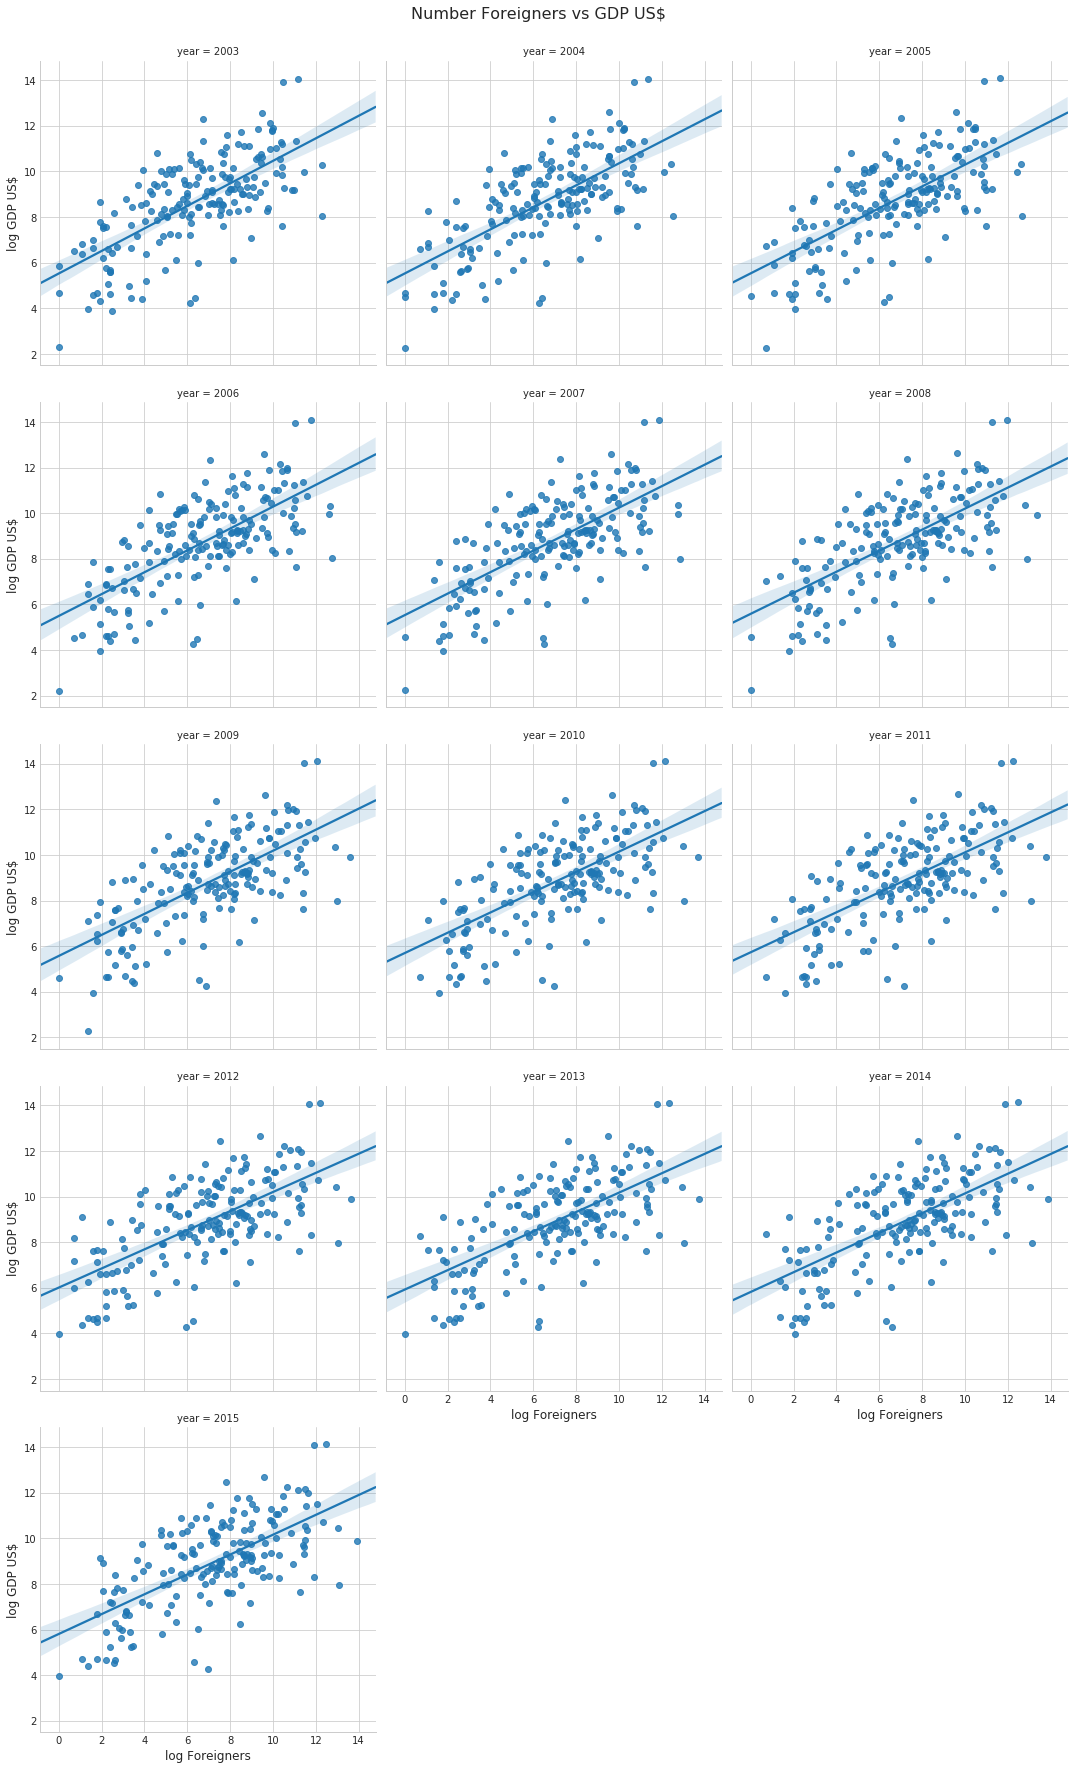

In [6]:
simple_regression(it_resident_foreigners, pop, list(range(2003, 2016)))

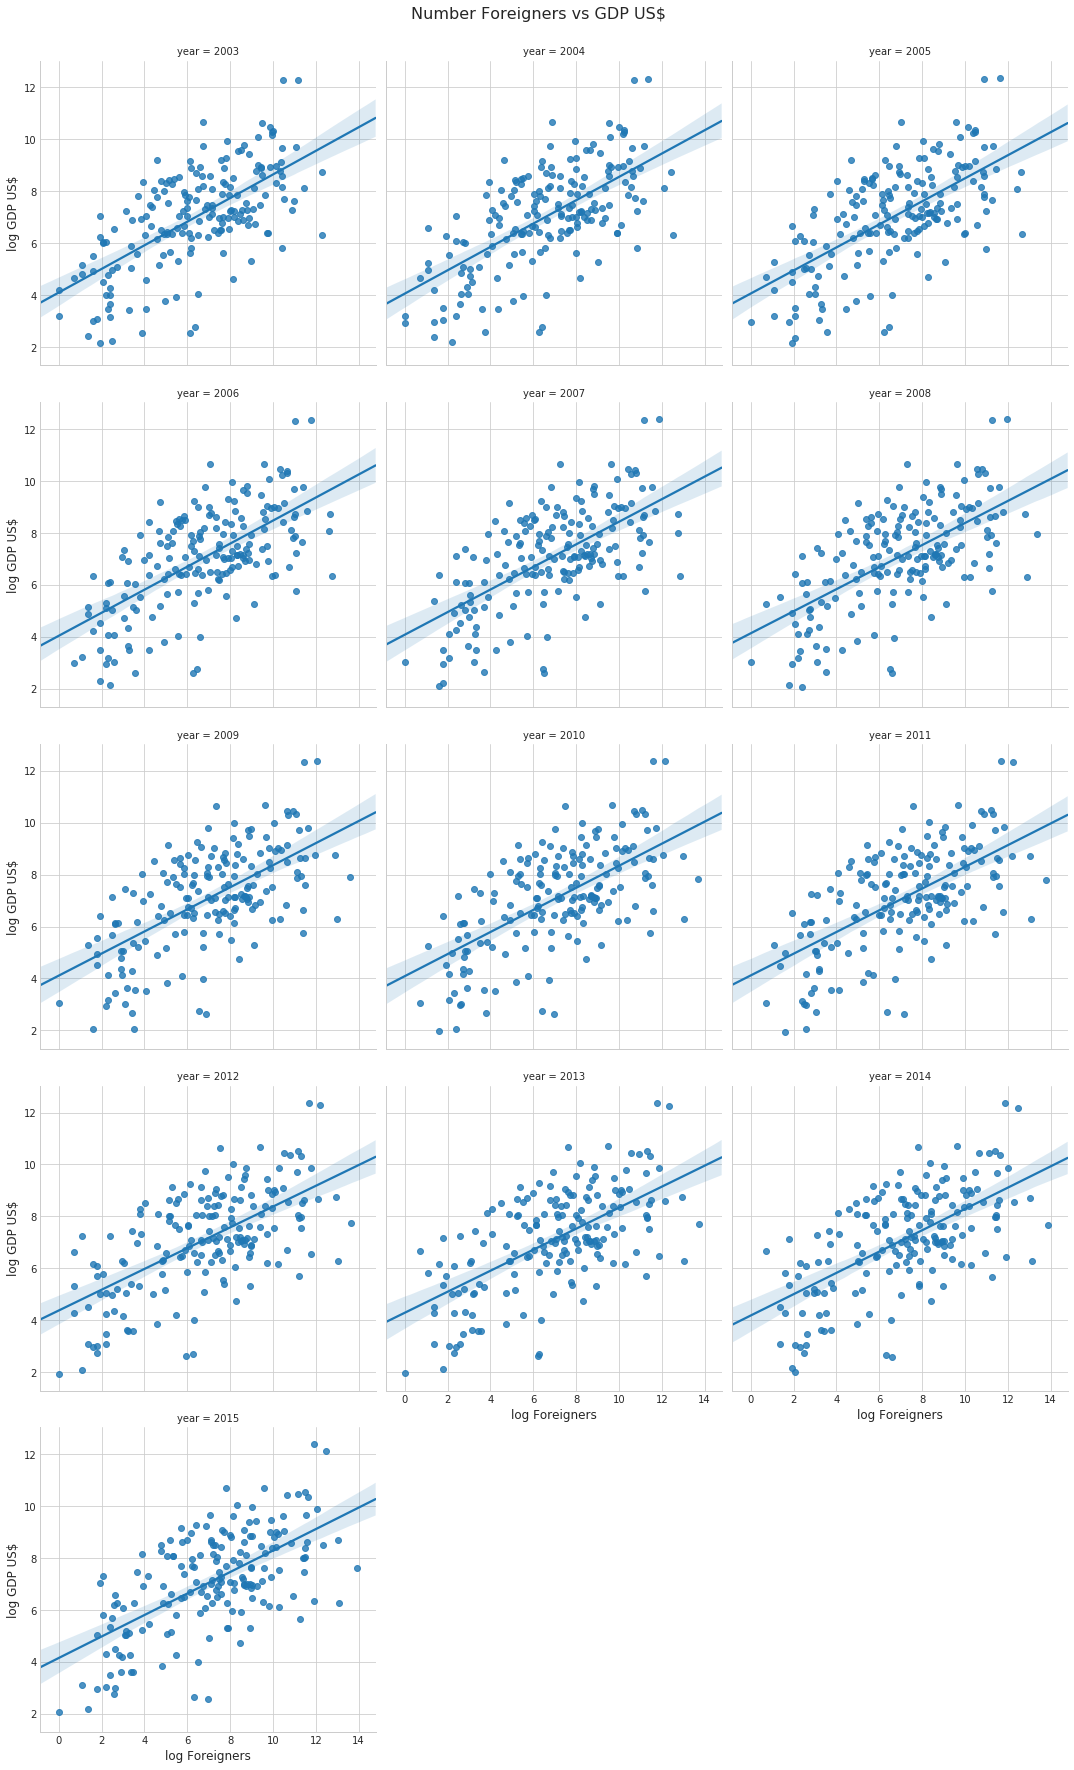

In [8]:
simple_regression(it_resident_foreigners, pop_15_64, list(range(2003, 2016)))

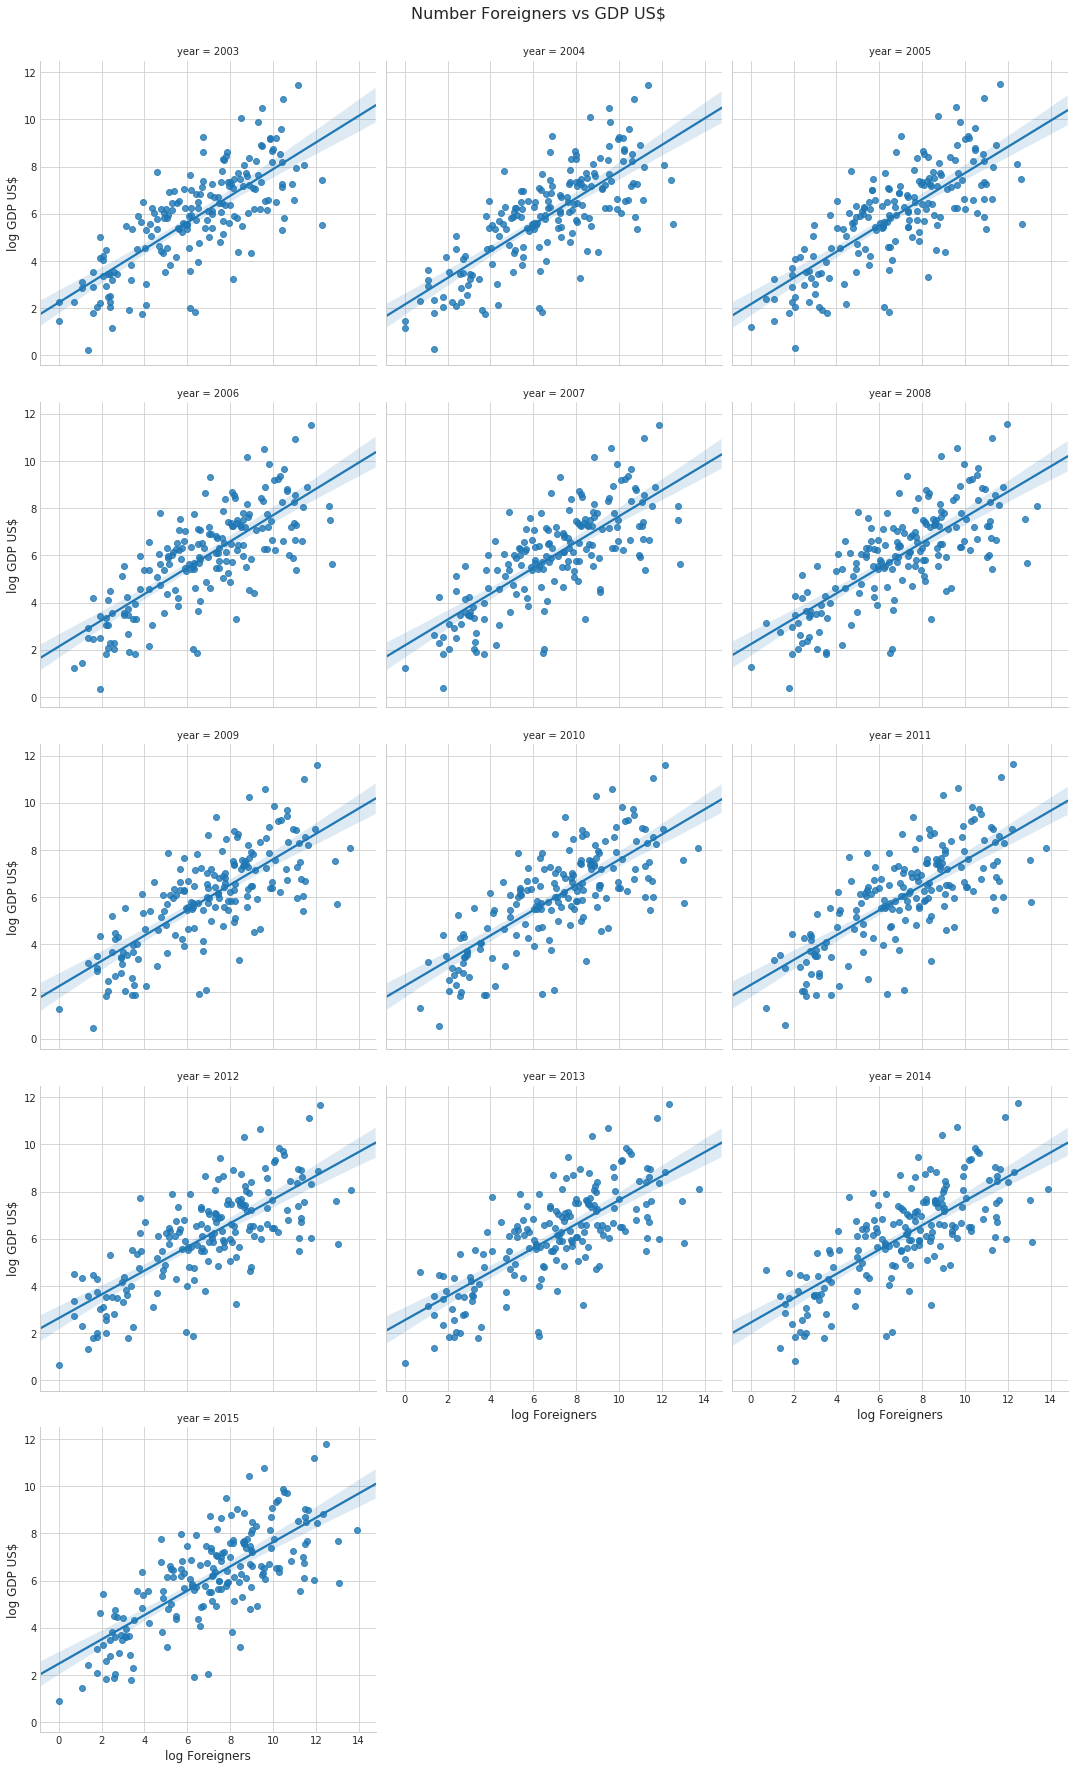

In [9]:
simple_regression(it_resident_foreigners, pop_65_over, list(range(2003, 2016)))

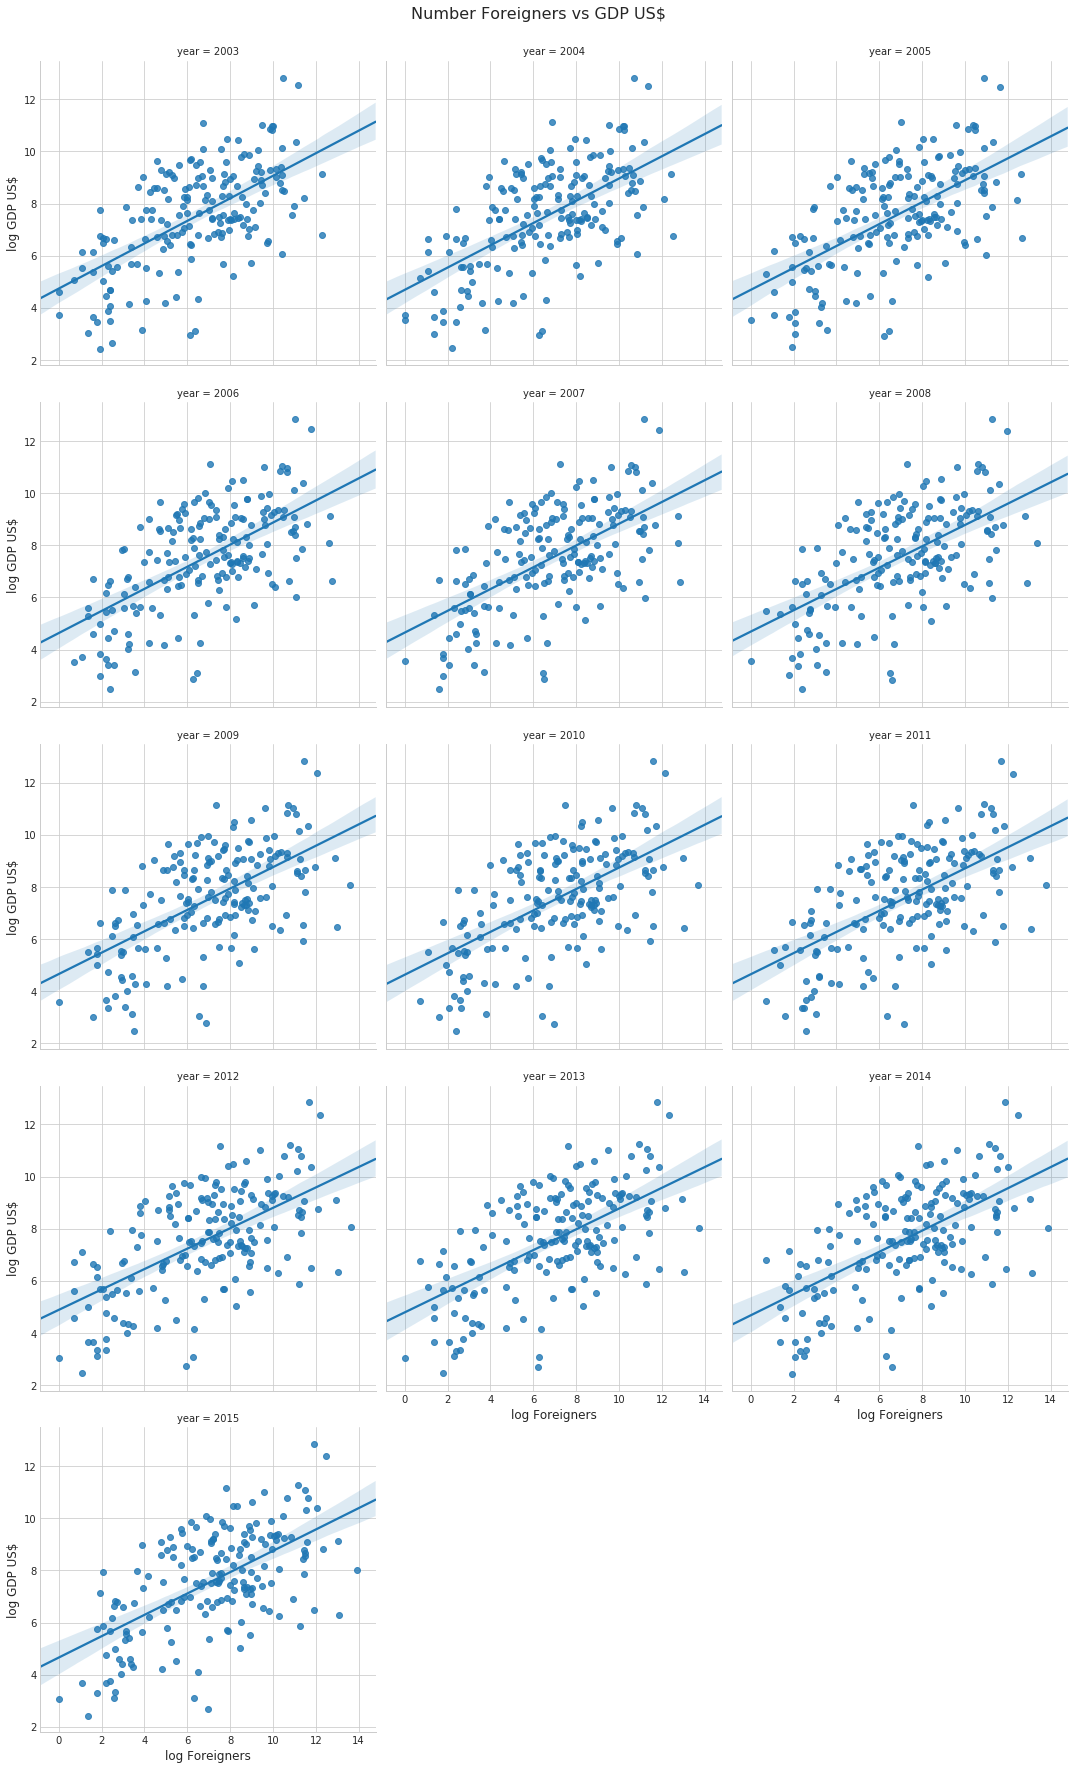

In [10]:
simple_regression(it_resident_foreigners, pop_15_under, list(range(2003, 2016)))

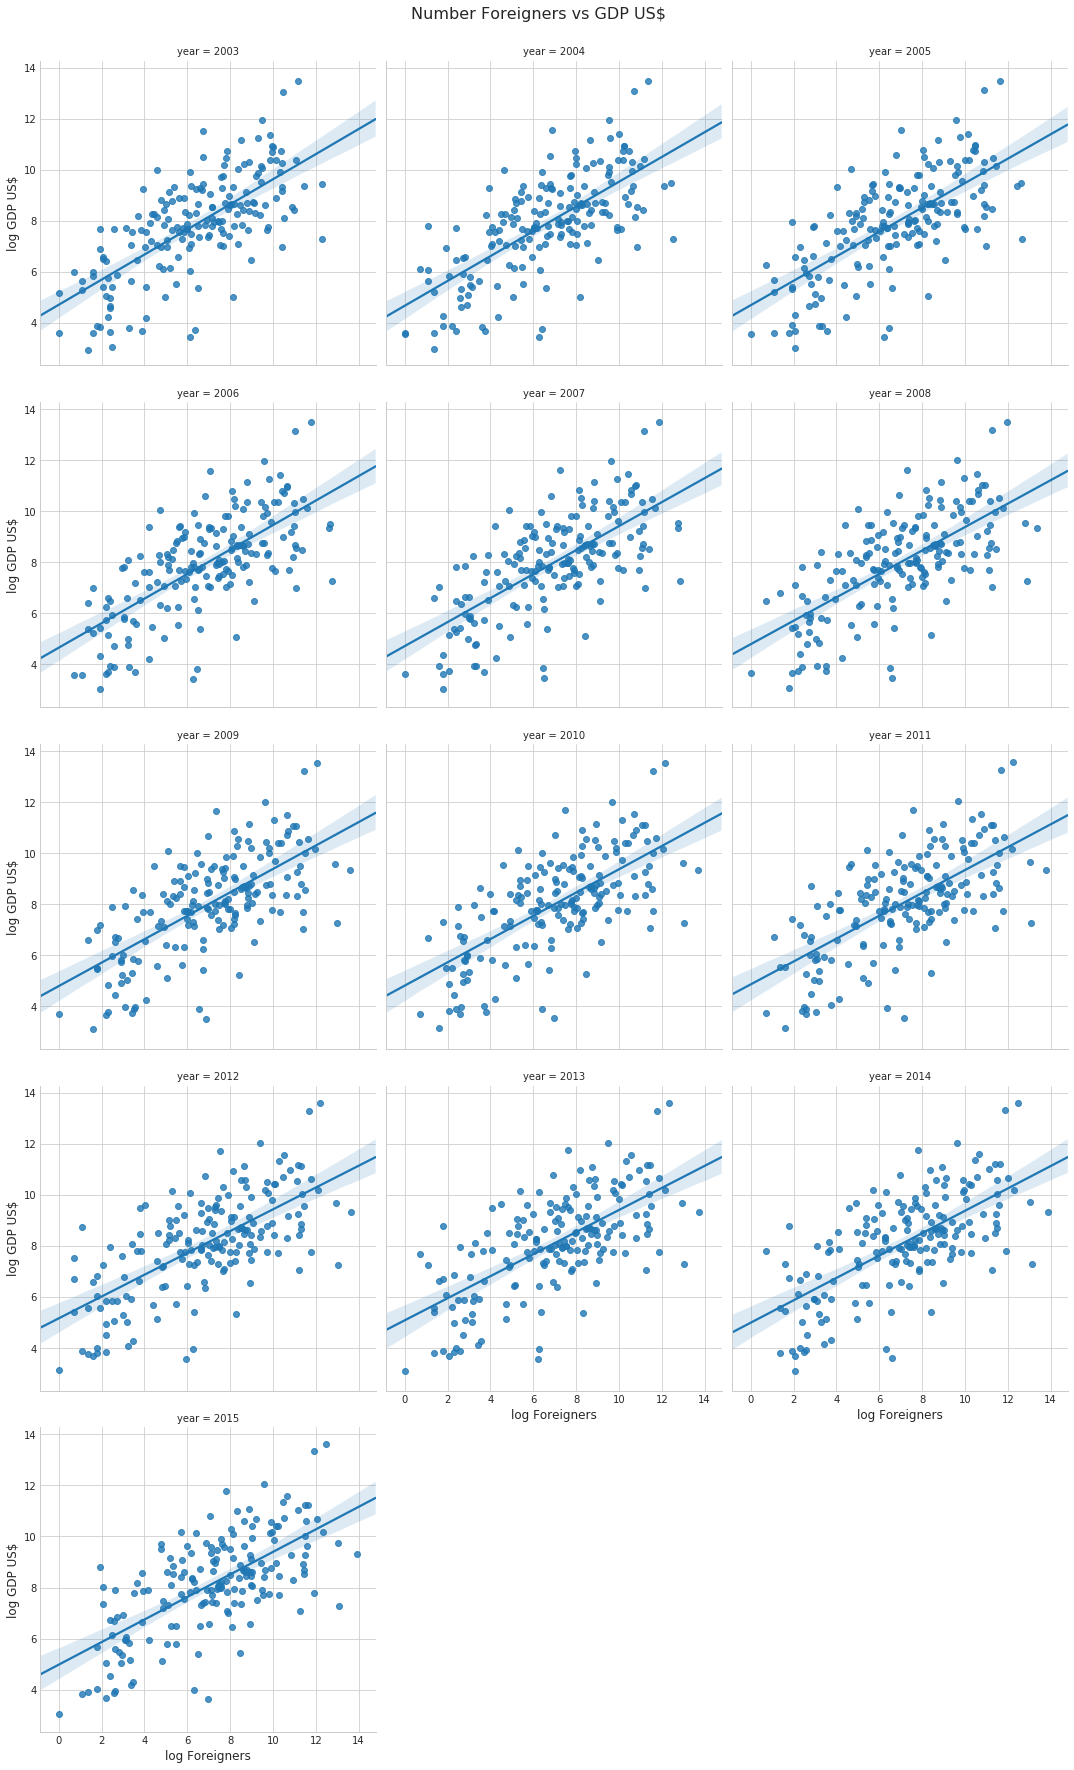

In [11]:
simple_regression(it_resident_foreigners, pop_25_64, list(range(2003, 2016)))

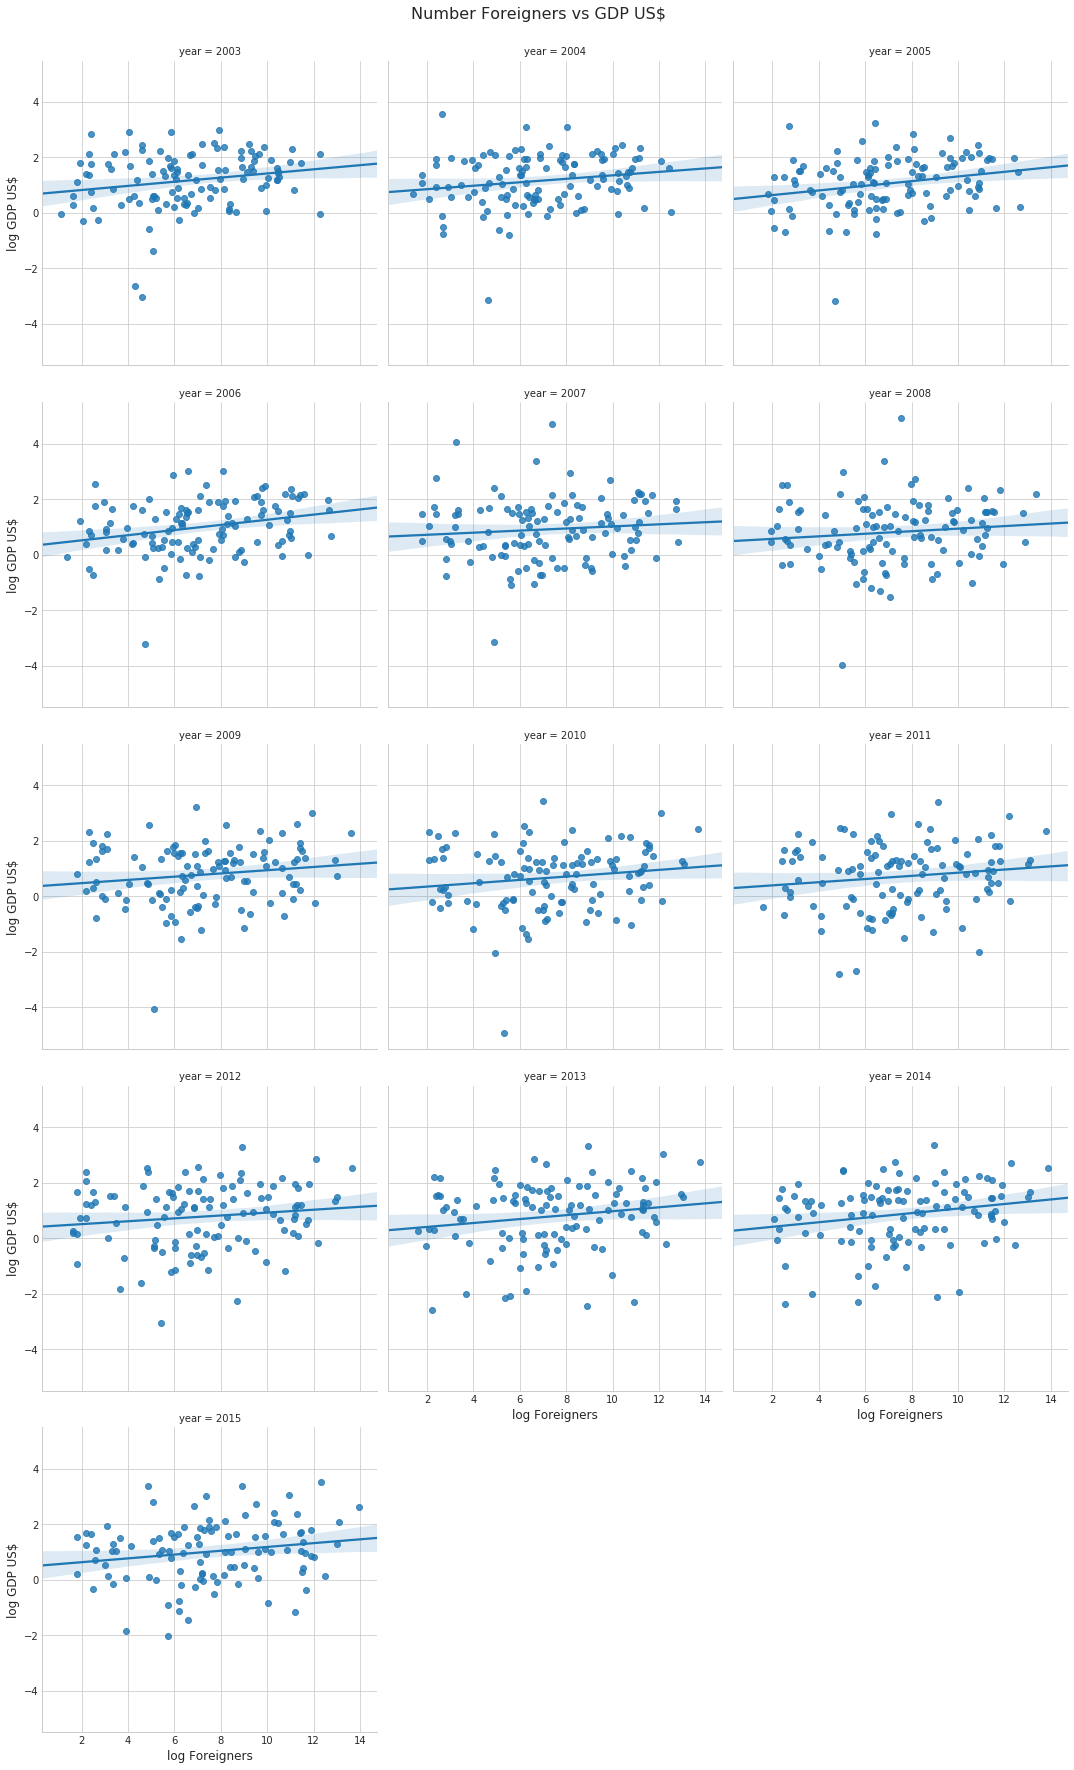

In [12]:
simple_regression(it_resident_foreigners, debt_serv, list(range(2003, 2016)))

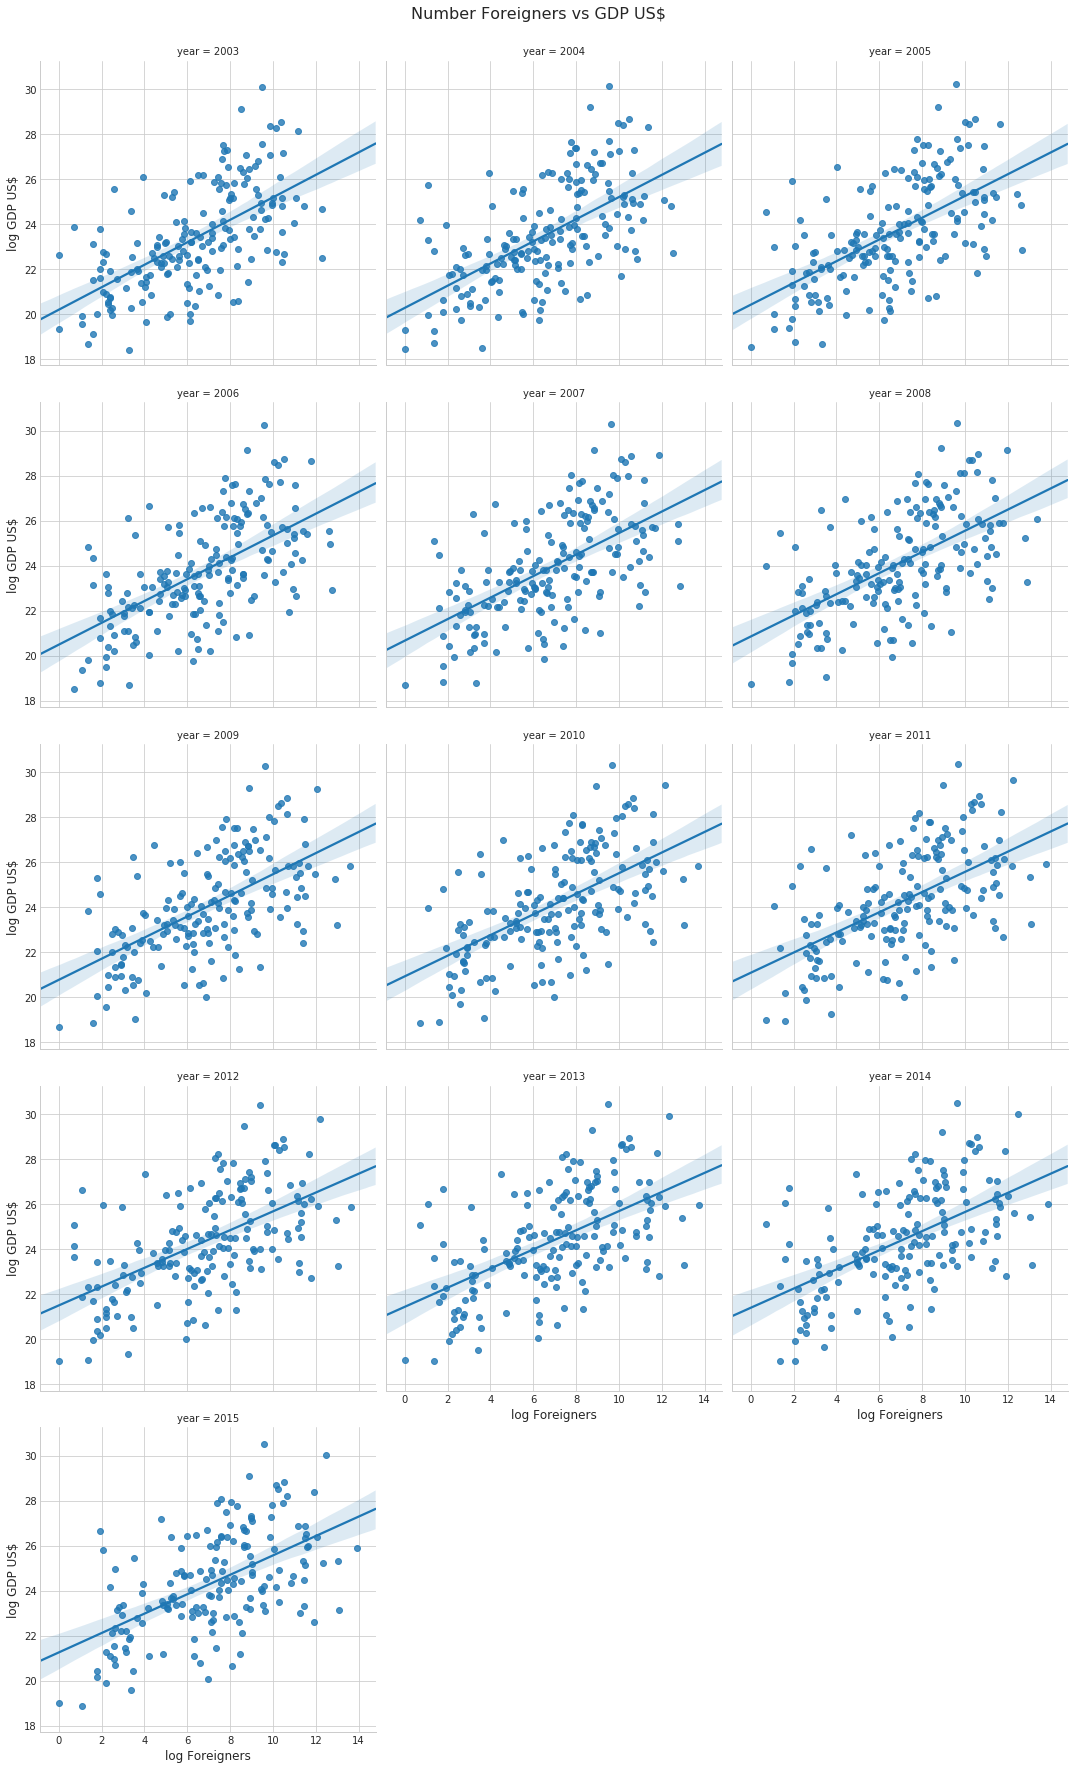

In [13]:
simple_regression(it_resident_foreigners, gdp_current_dollar, list(range(2003, 2016)))

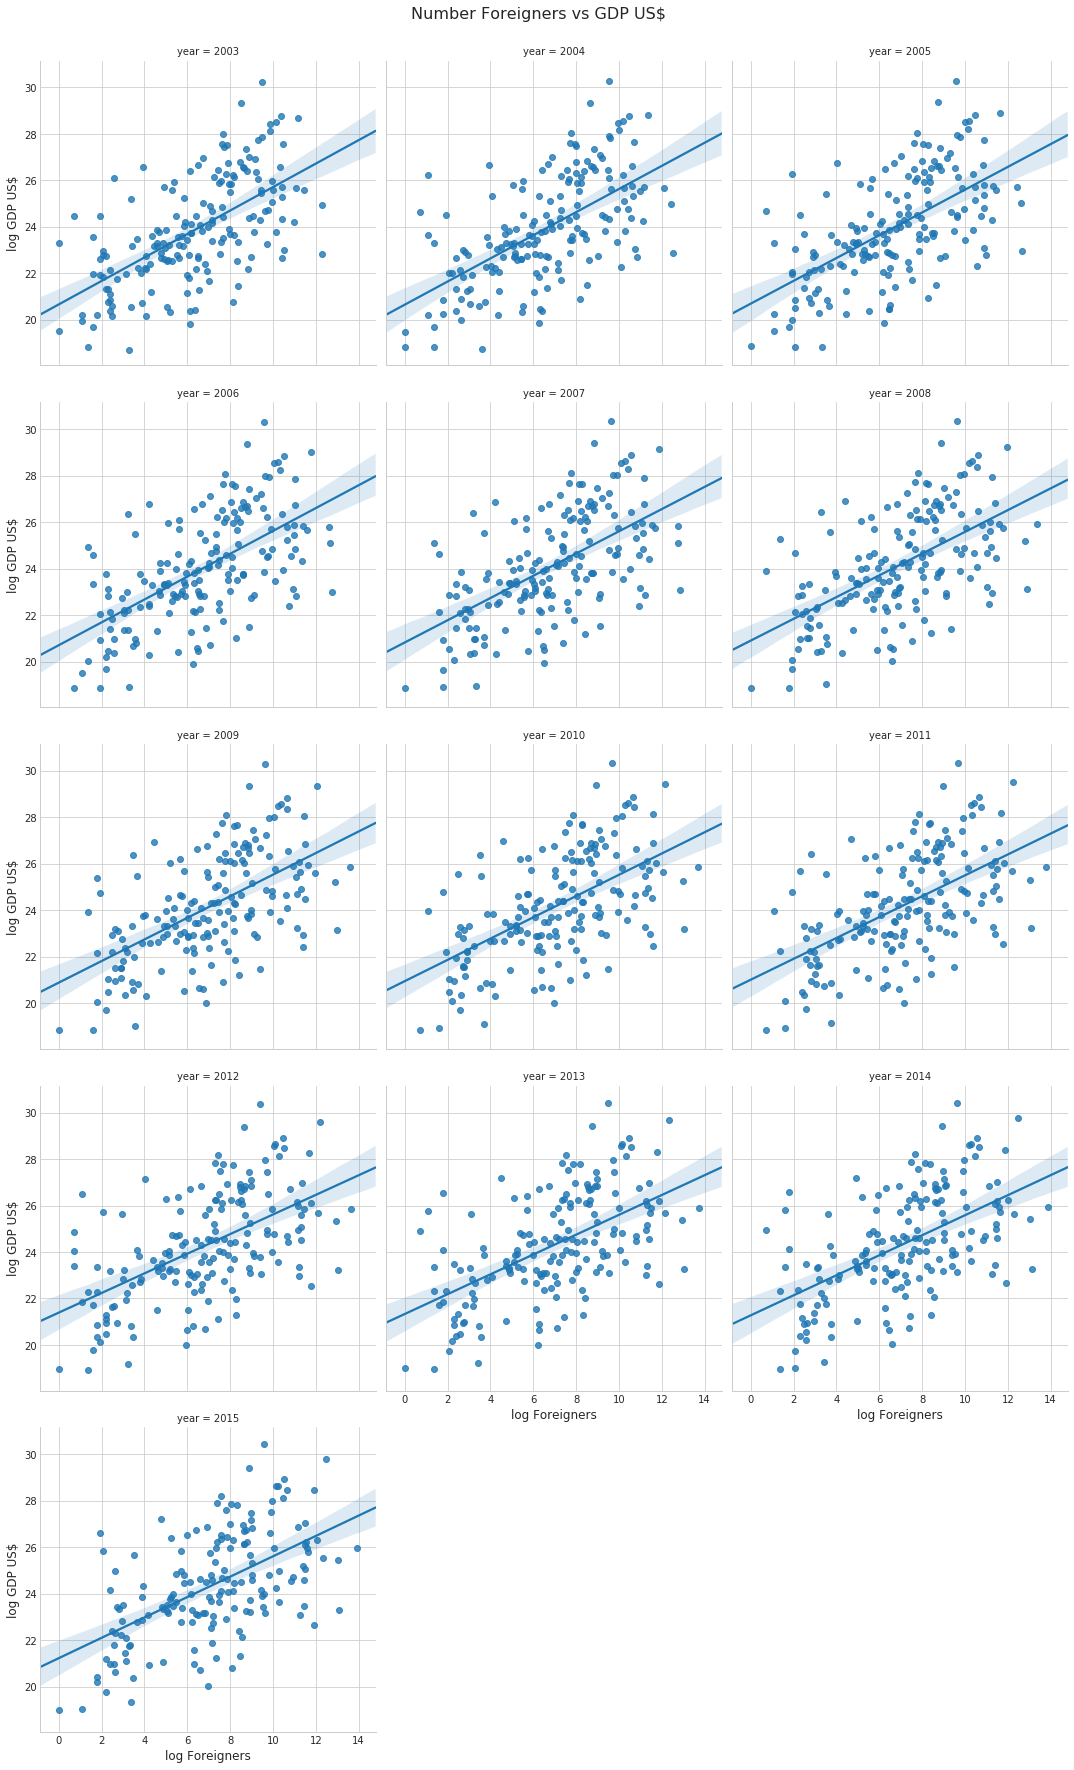

In [14]:
simple_regression(it_resident_foreigners, gdp_2010dollar, list(range(2003, 2016)))

/home/sara/myenv/lib64/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in log


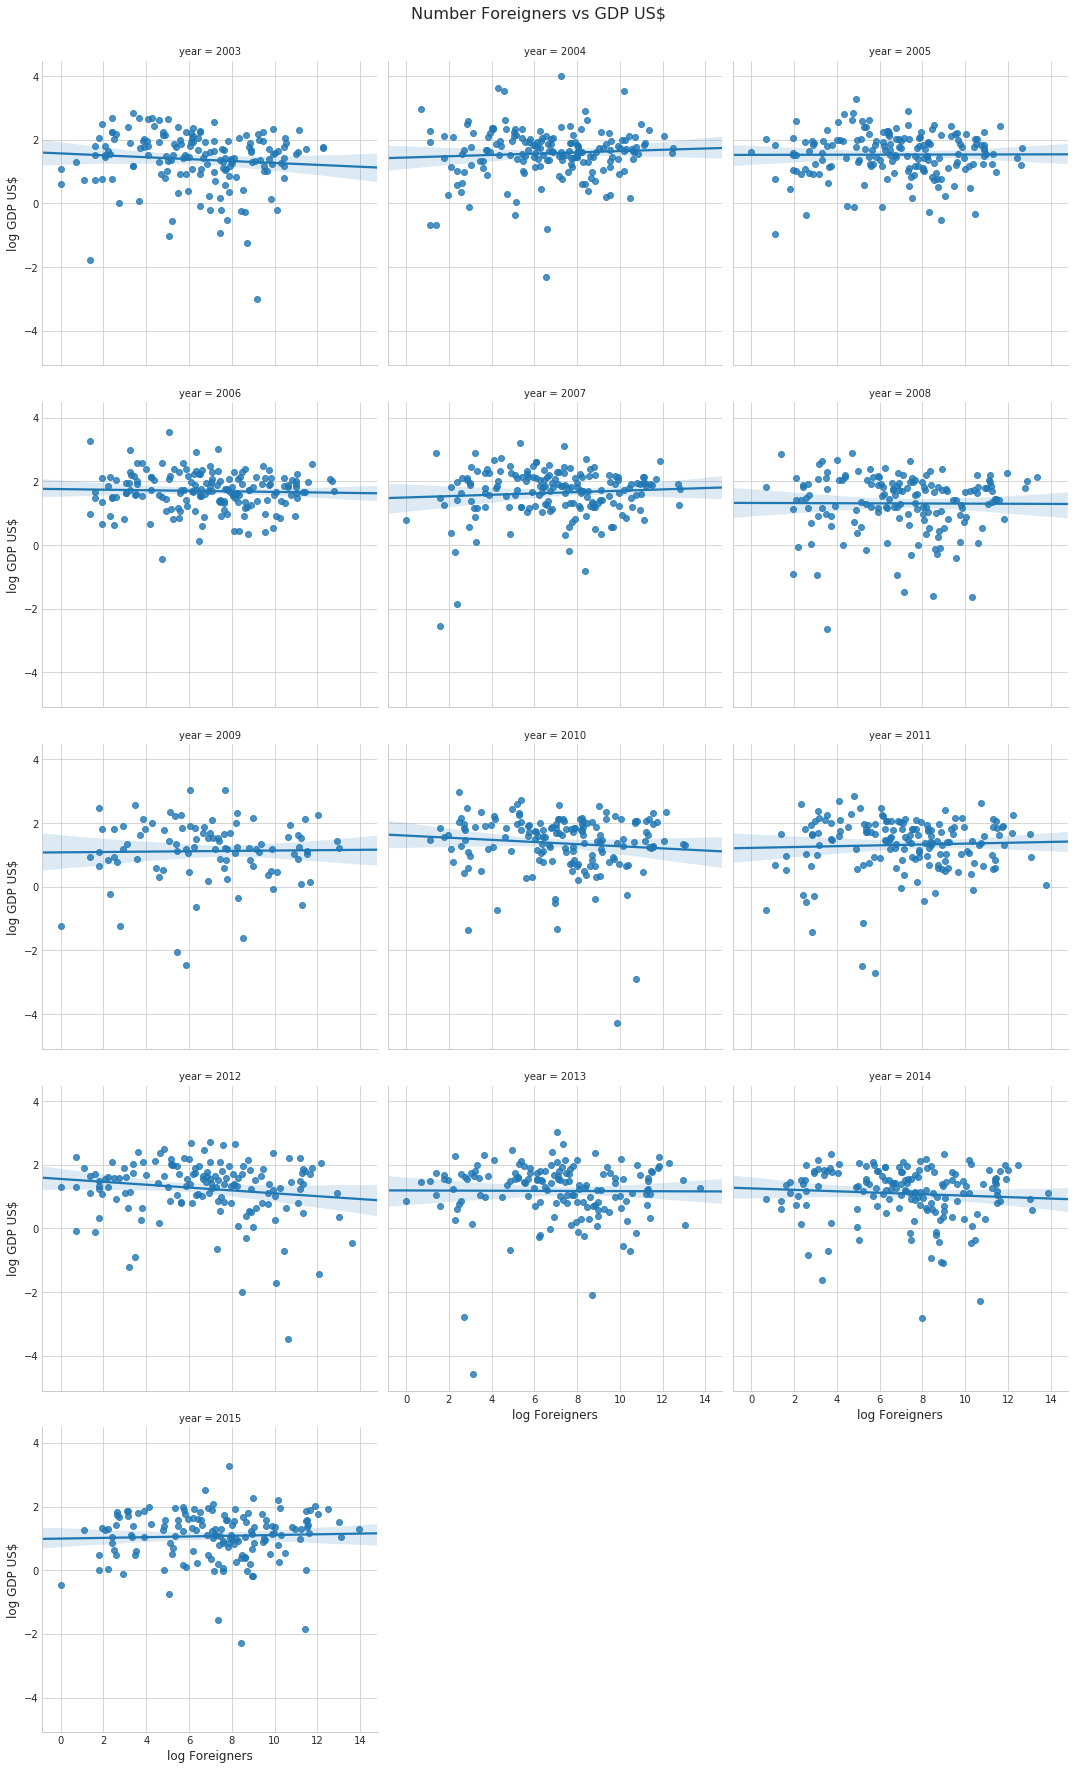

In [15]:
simple_regression(it_resident_foreigners, gdp_growth, list(range(2003, 2016)))

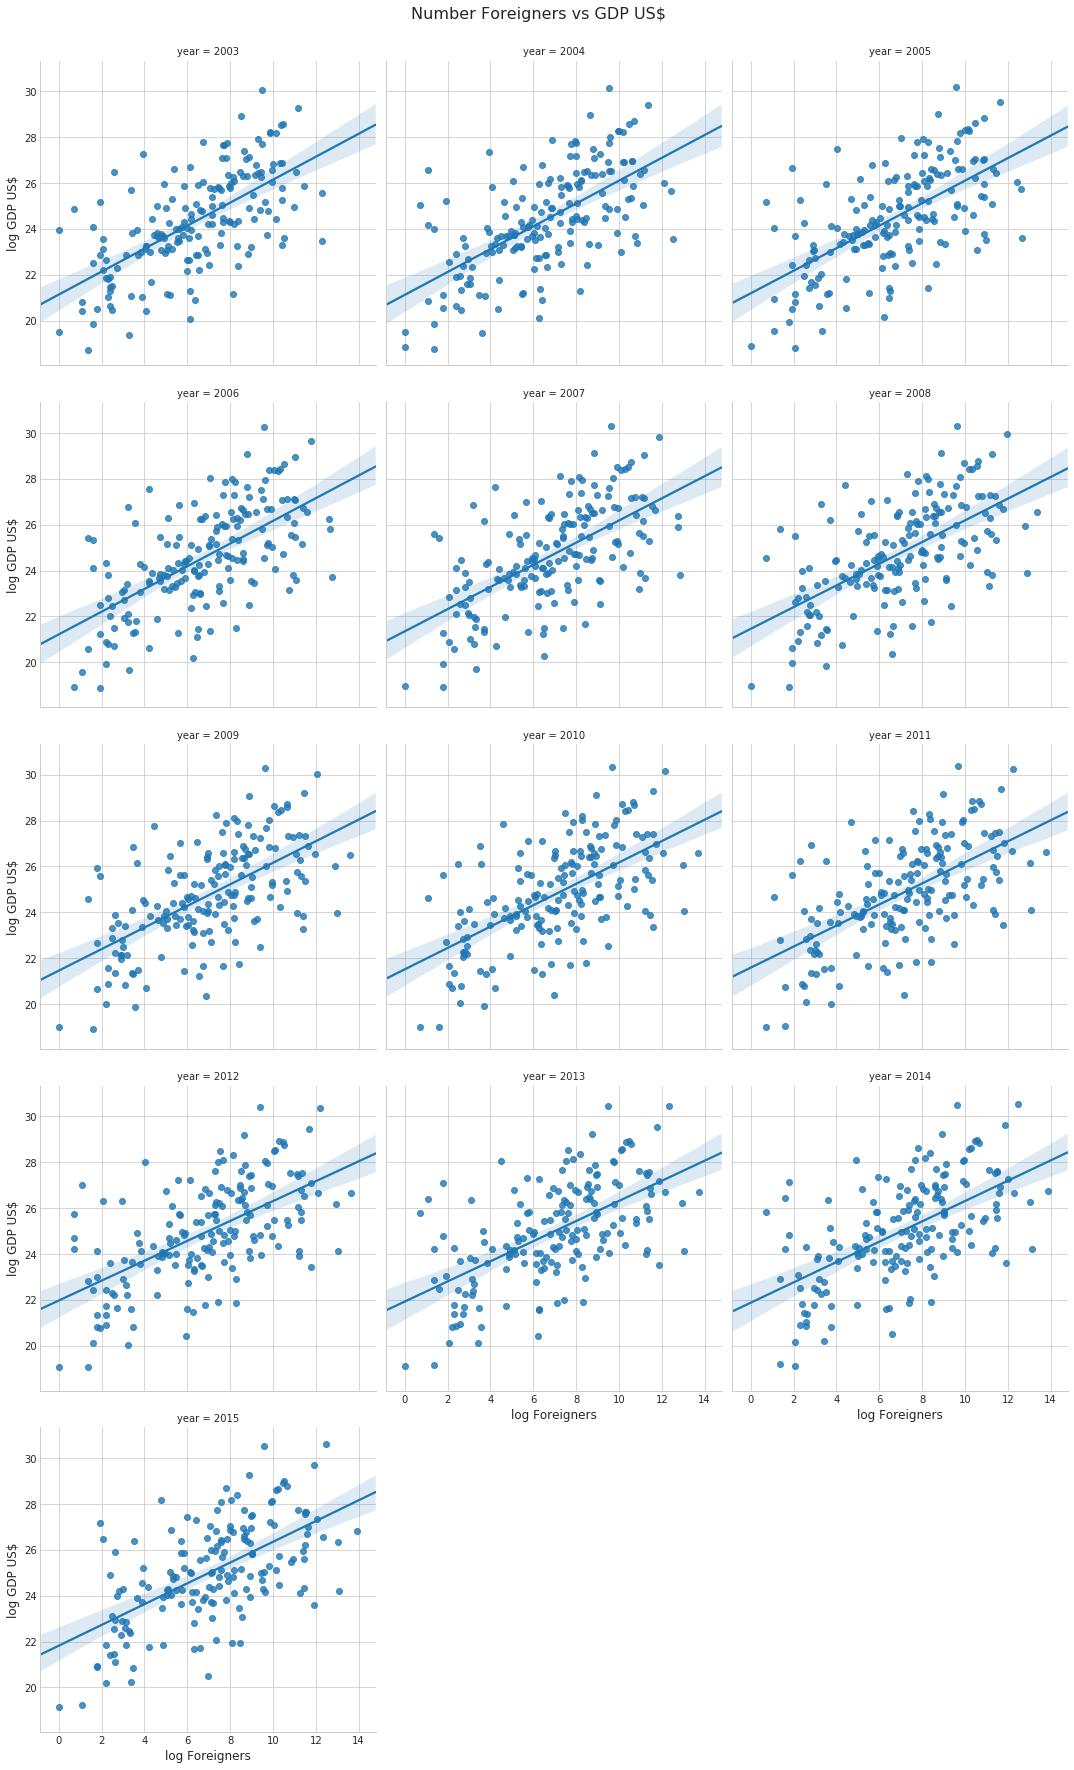

In [16]:
simple_regression(it_resident_foreigners, gdp_ppp_current_dollar, list(range(2003, 2016)))

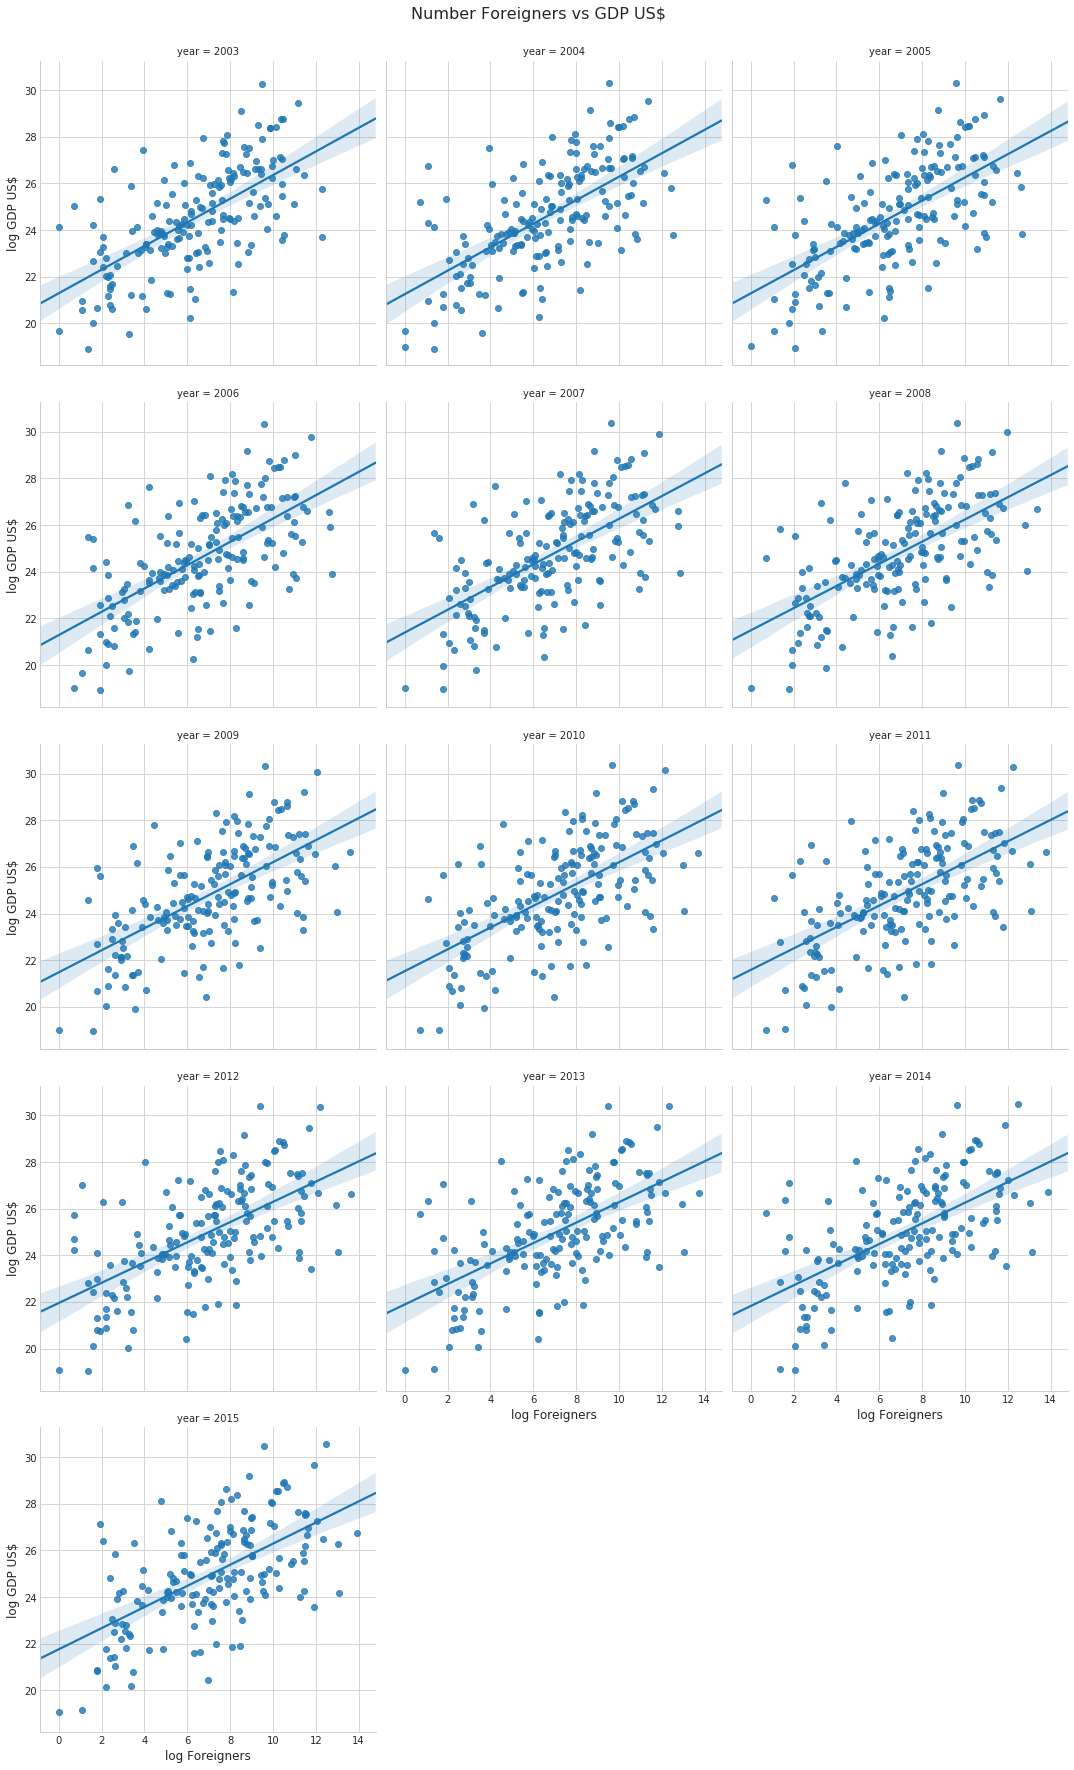

In [17]:
simple_regression(it_resident_foreigners, gdp_ppp_2011dollar, list(range(2003, 2016)))

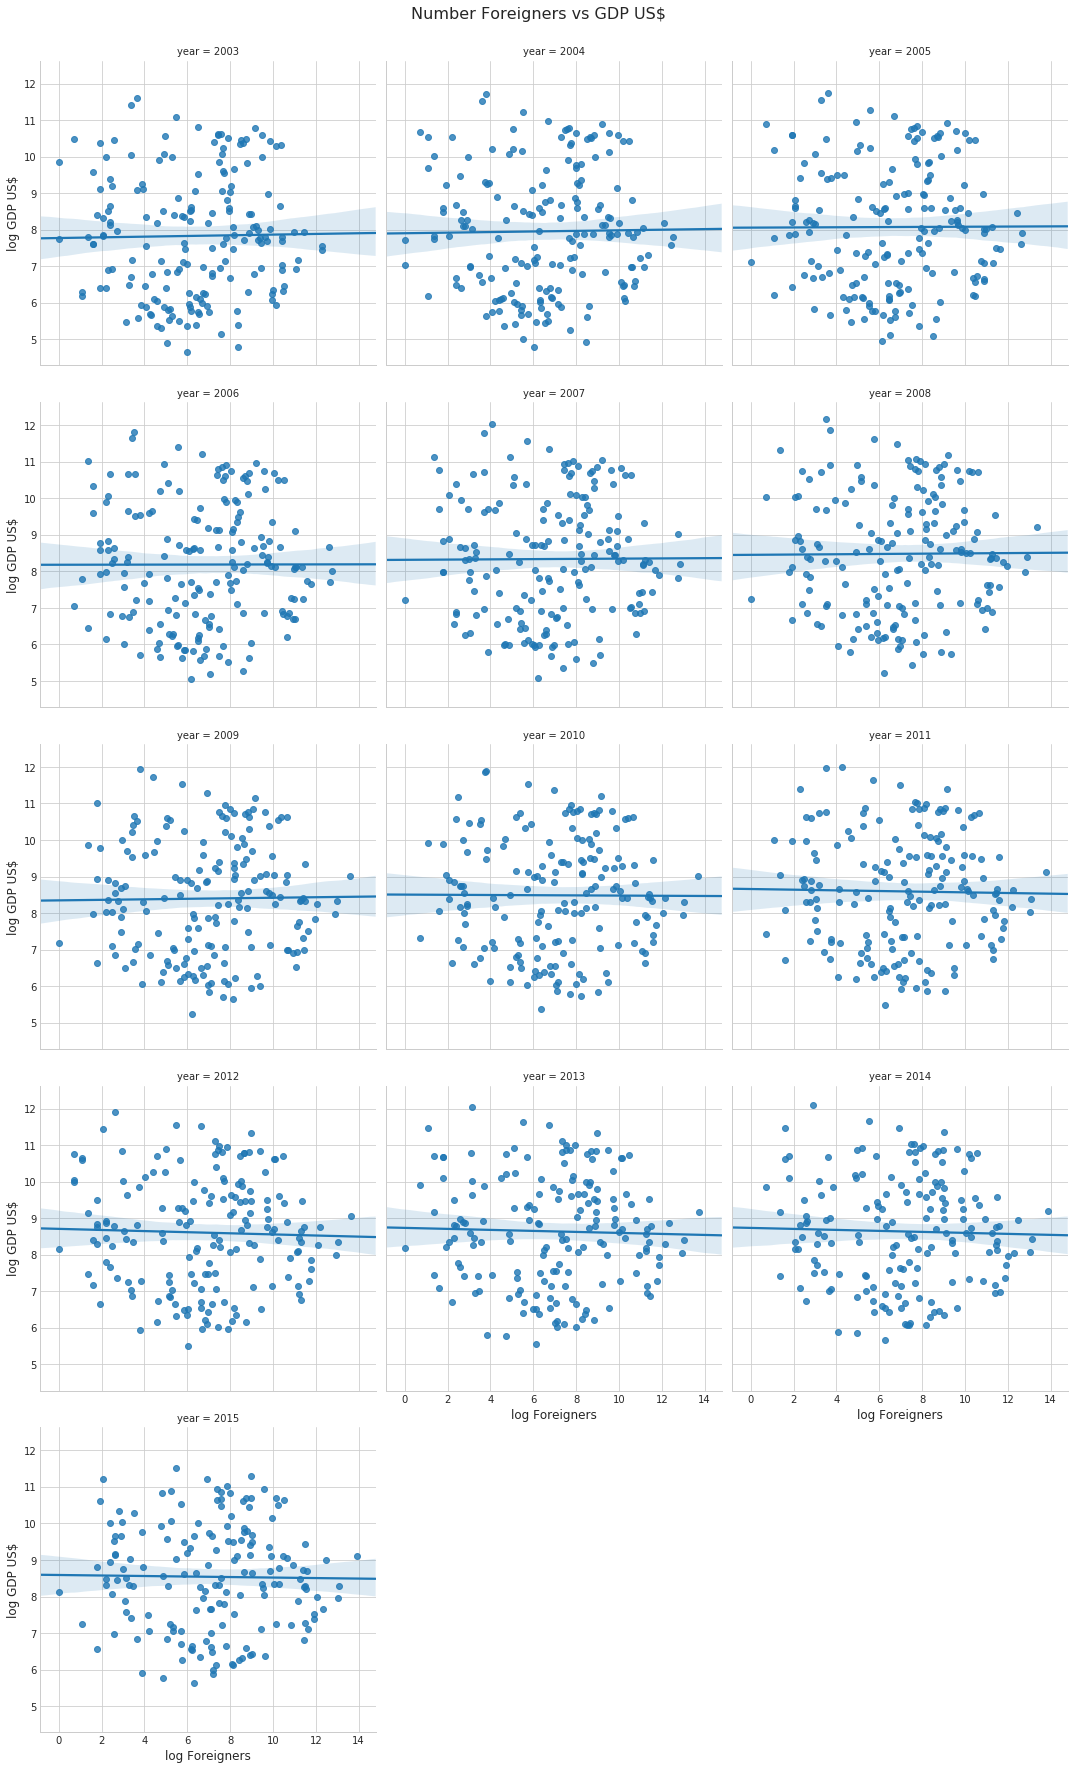

In [18]:
simple_regression(it_resident_foreigners, gdp_pc_current_dollar, list(range(2003, 2016)))

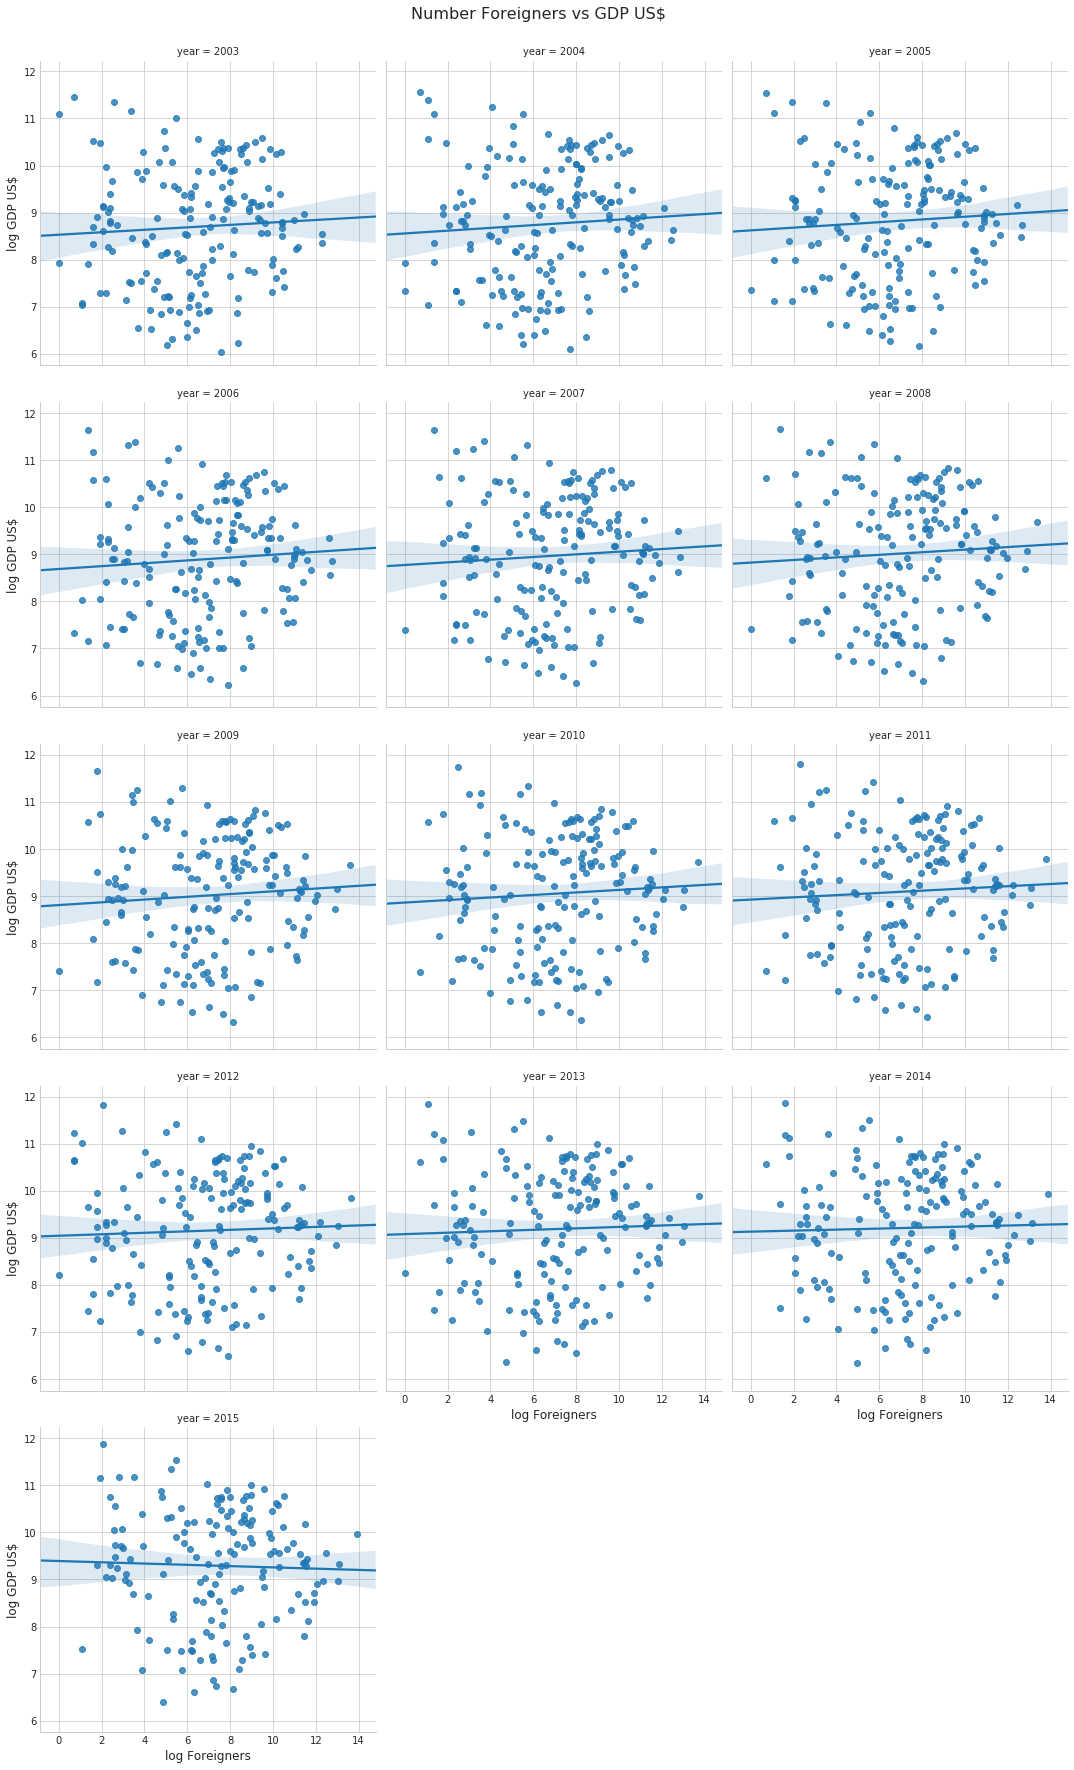

In [19]:
simple_regression(it_resident_foreigners, gdp_pc__ppp_current_dollar, list(range(2003, 2016)))

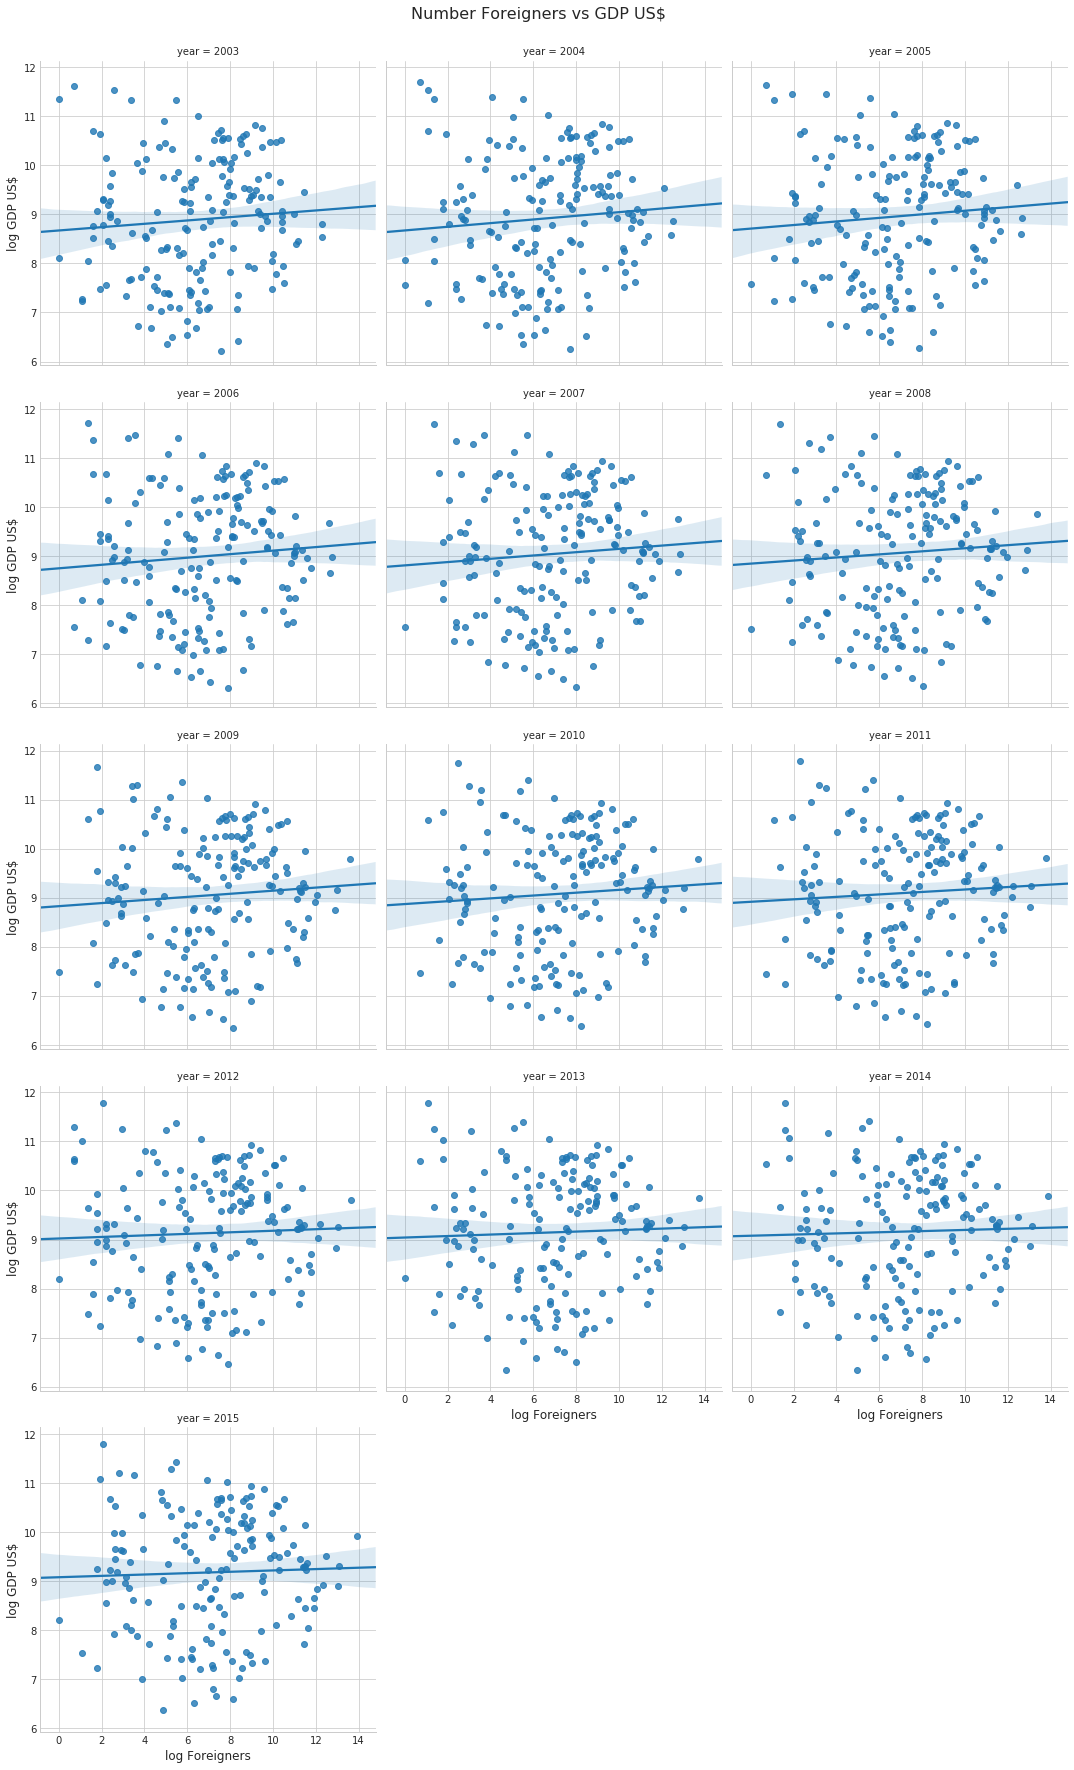

In [20]:
simple_regression(it_resident_foreigners, gdp_pc__ppp_2011dollar, list(range(2003, 2016)))

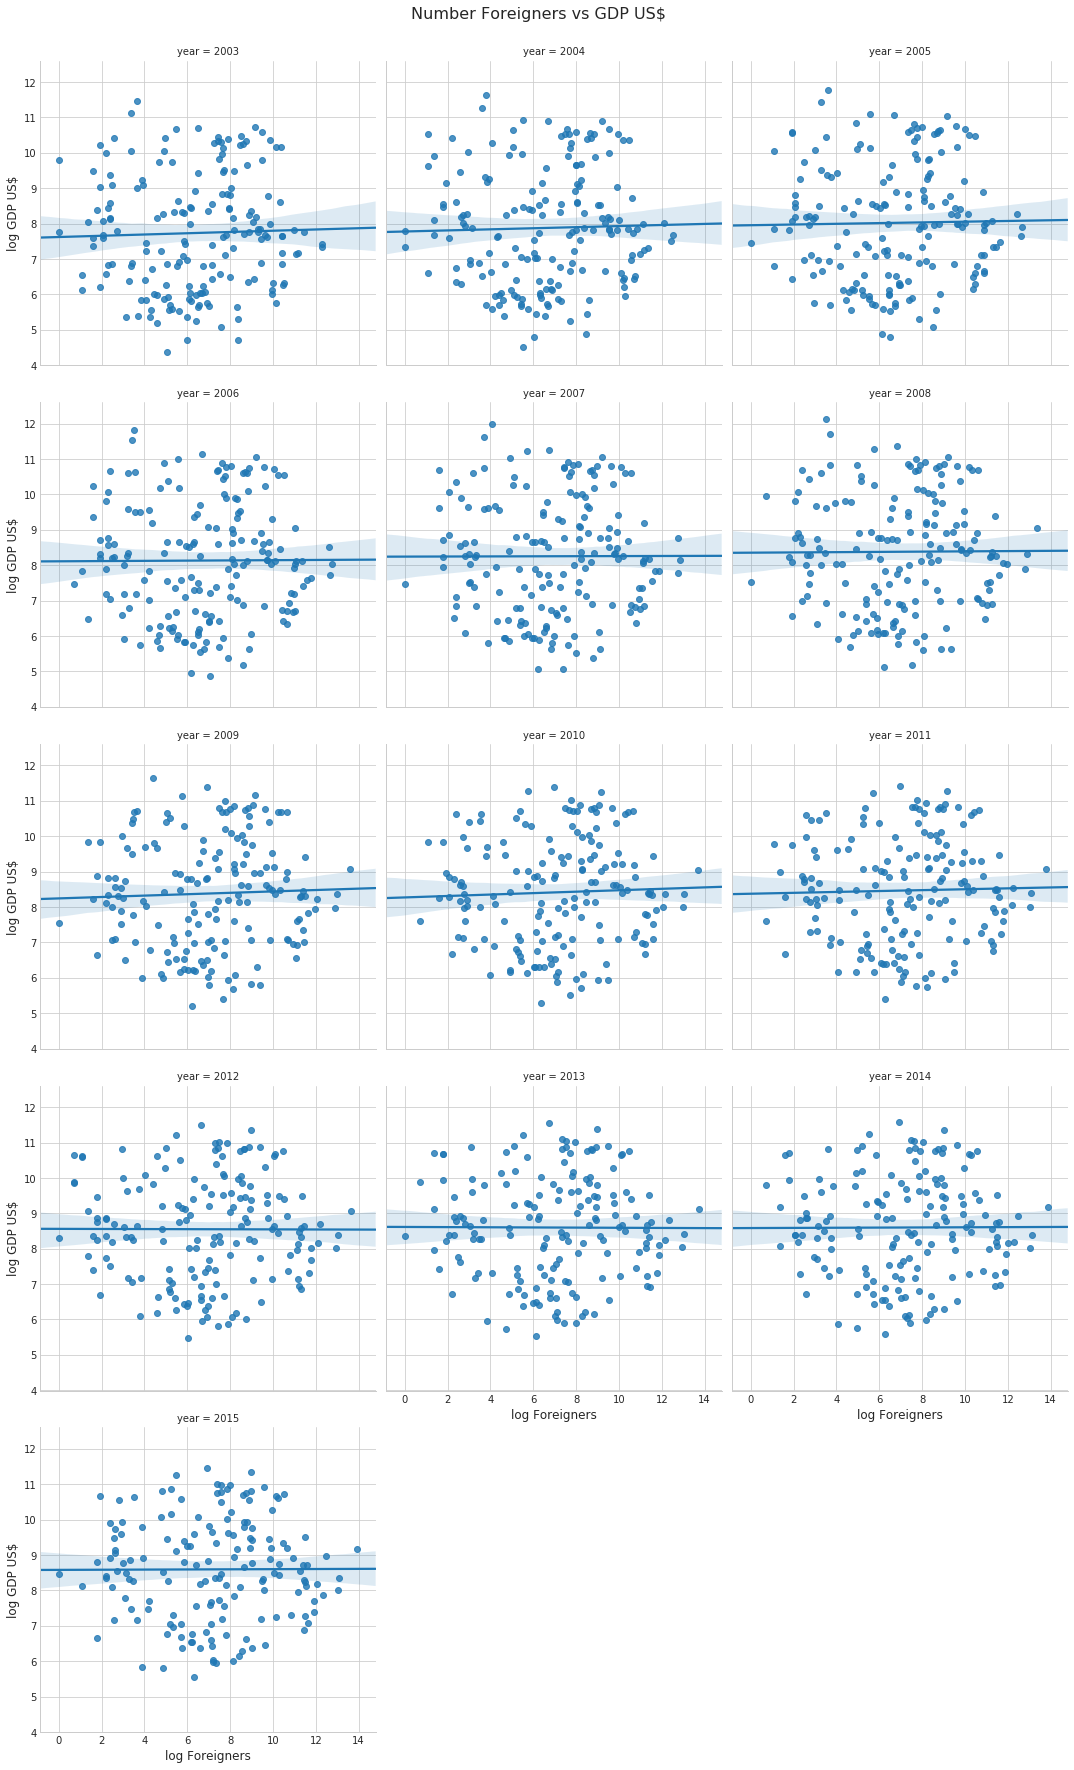

In [21]:
simple_regression(it_resident_foreigners, gni_pc_current_dollar, list(range(2003, 2016)))

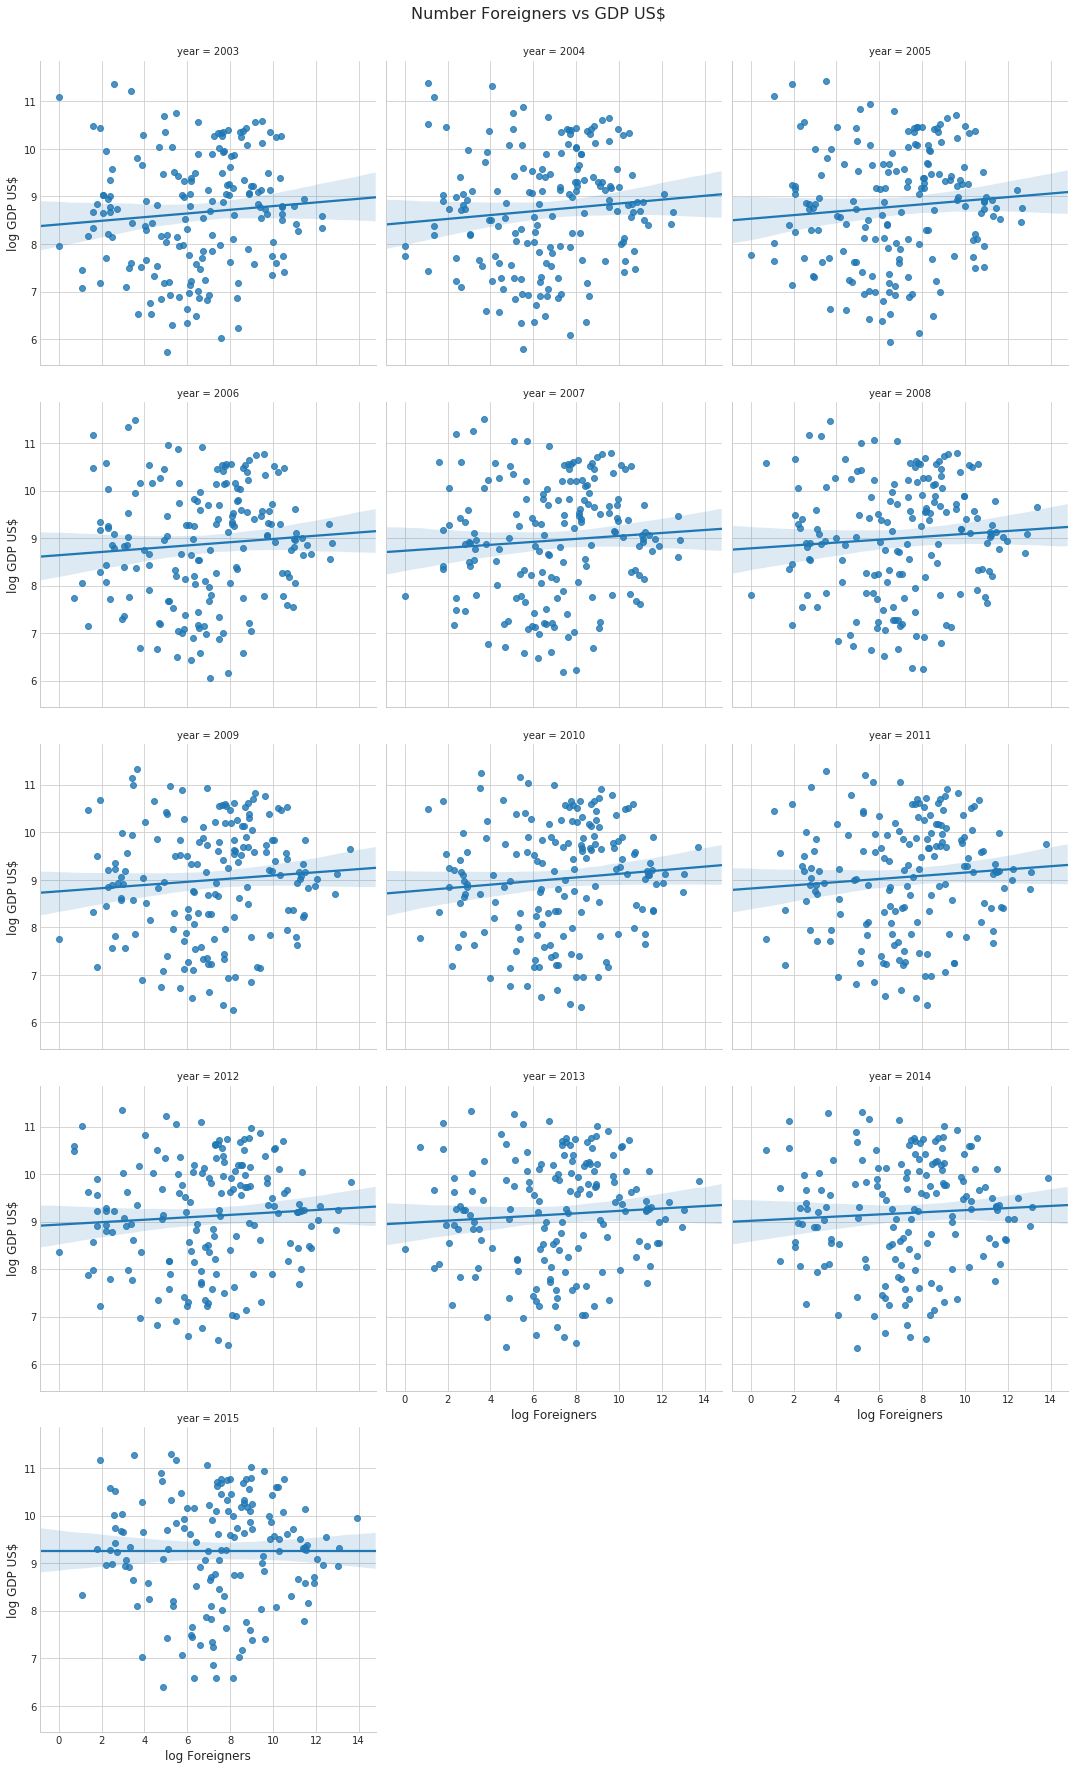

In [22]:
simple_regression(it_resident_foreigners, gni_pc_ppp_current_dollar, list(range(2003, 2016)))

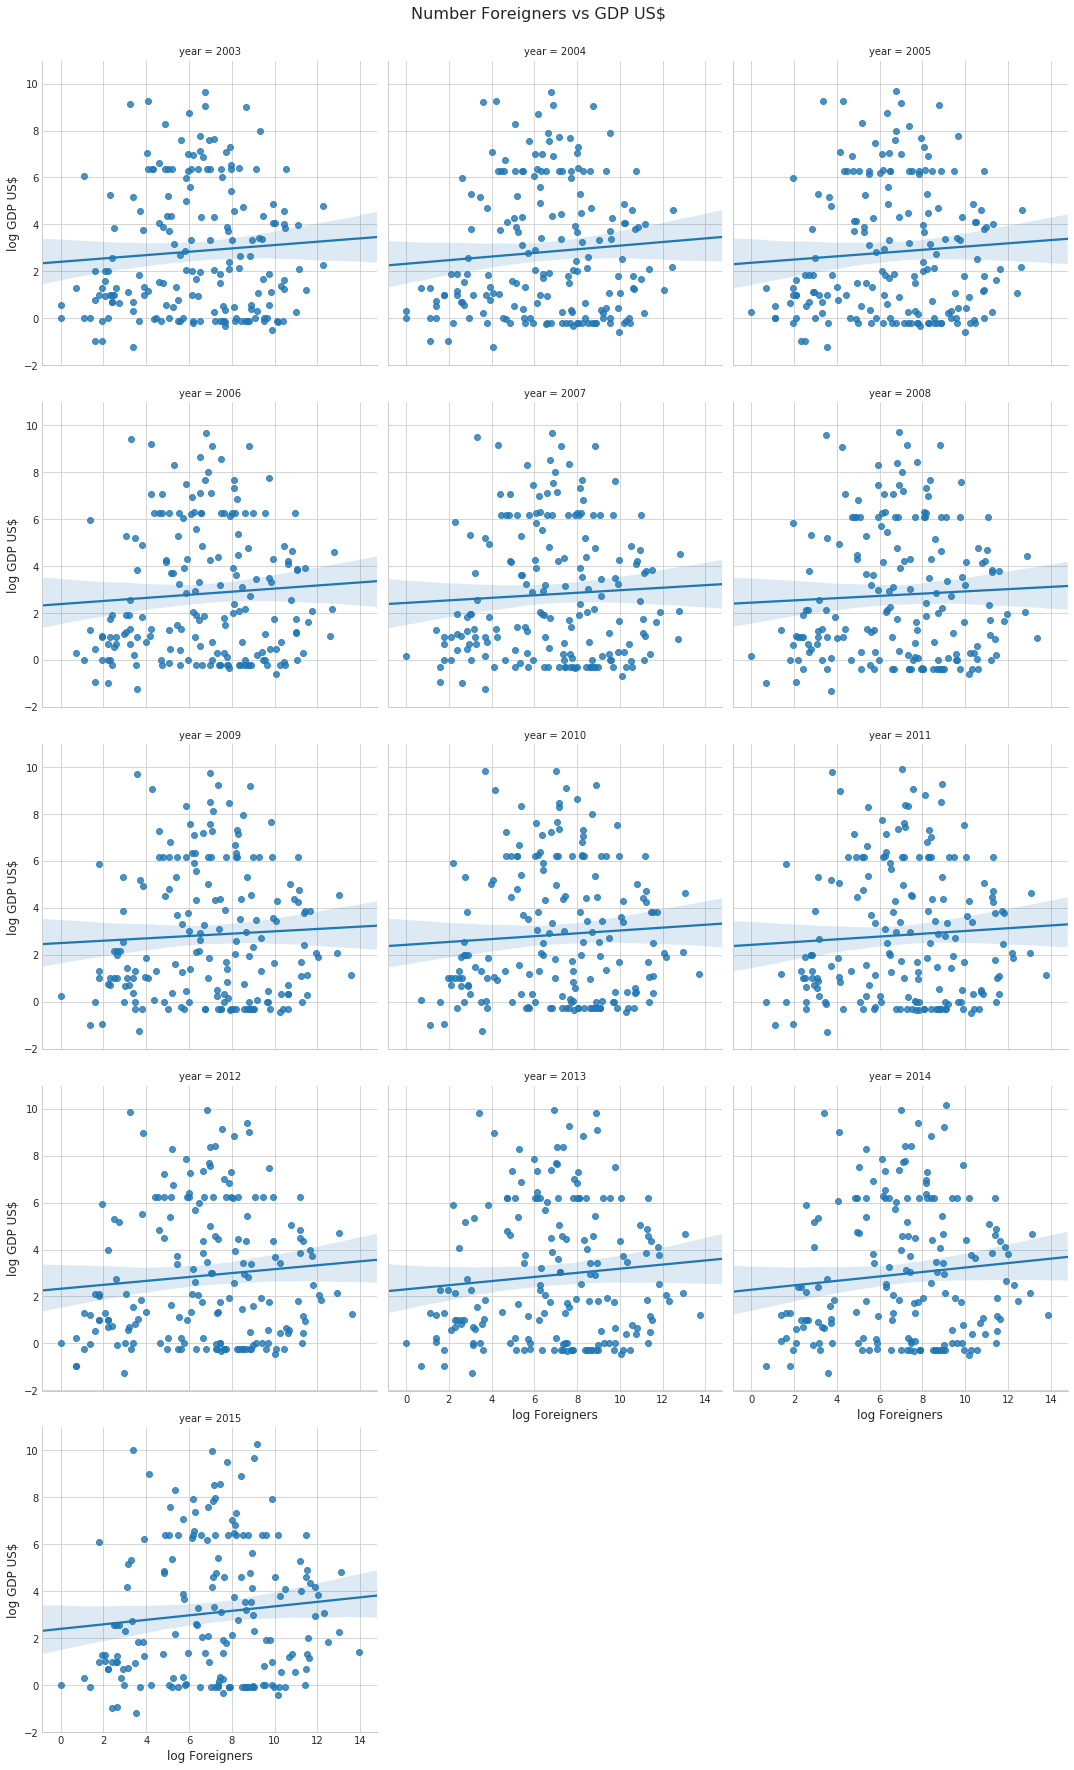

In [23]:
simple_regression(it_resident_foreigners, dec_conversion, list(range(2003, 2016)))

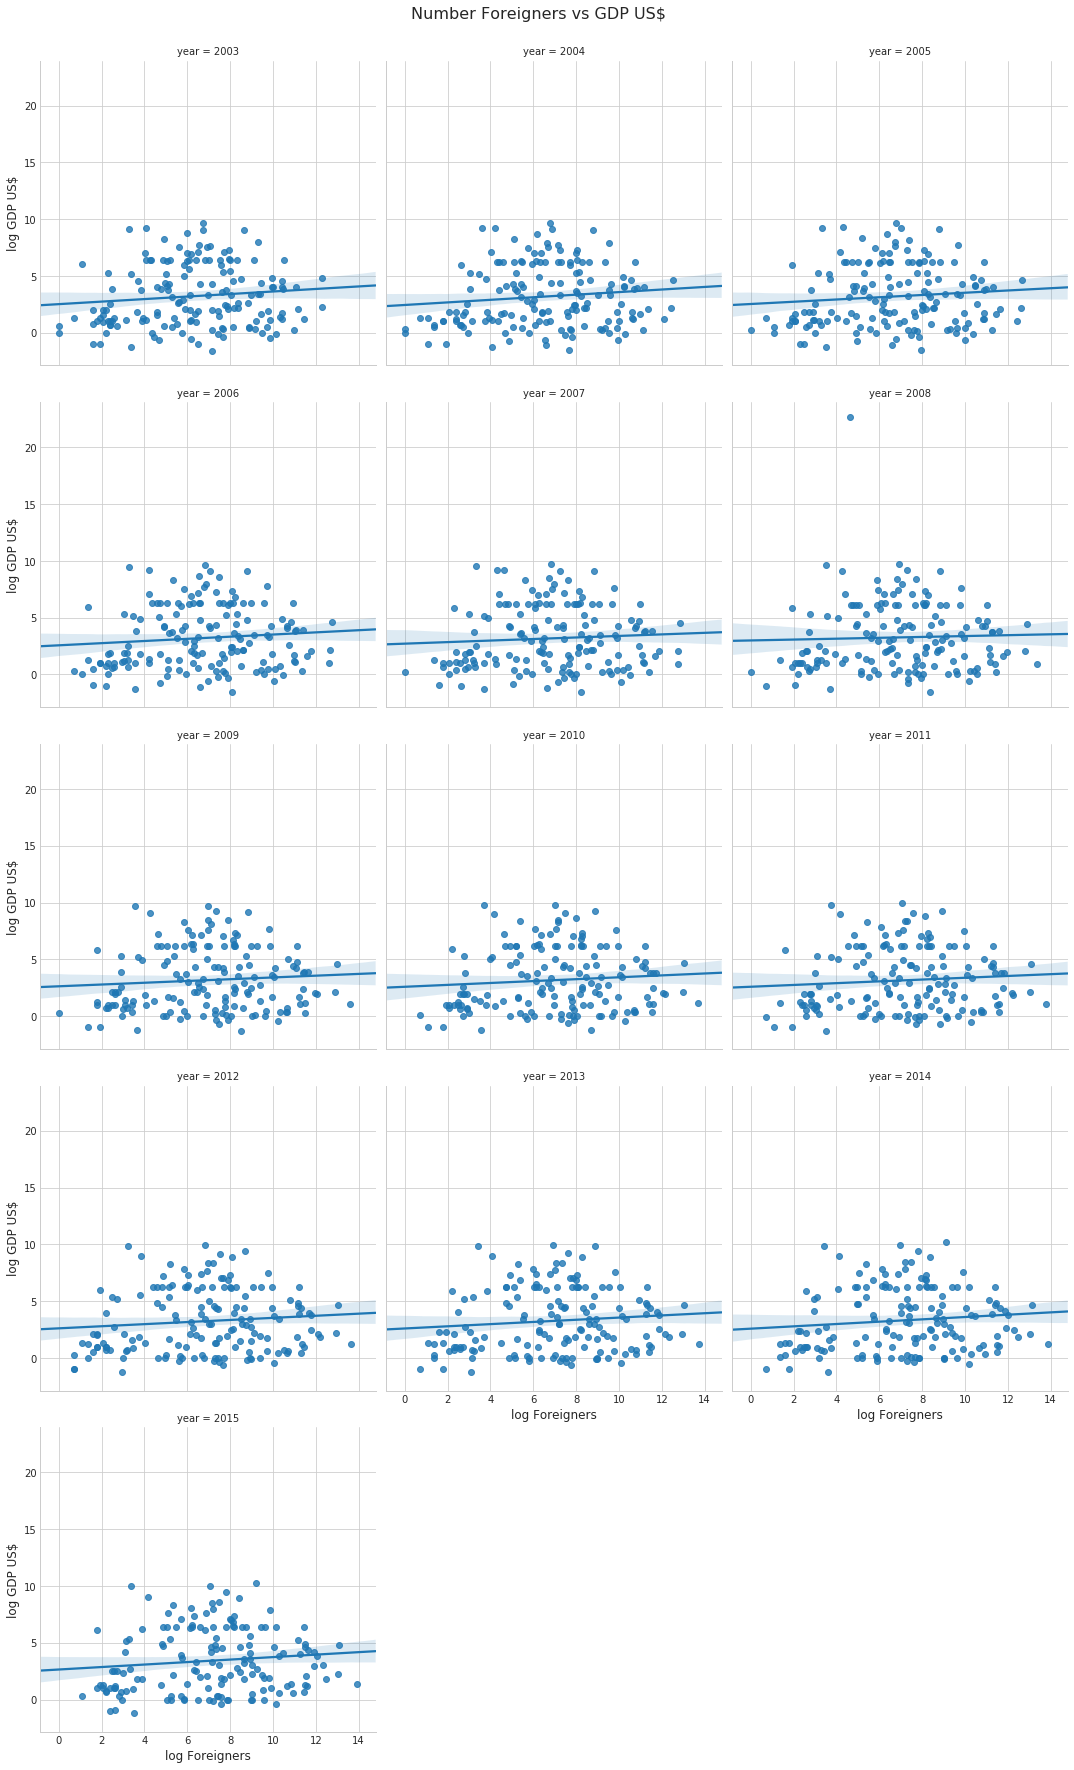

In [24]:
simple_regression(it_resident_foreigners, exchange_rate, list(range(2003, 2016)))

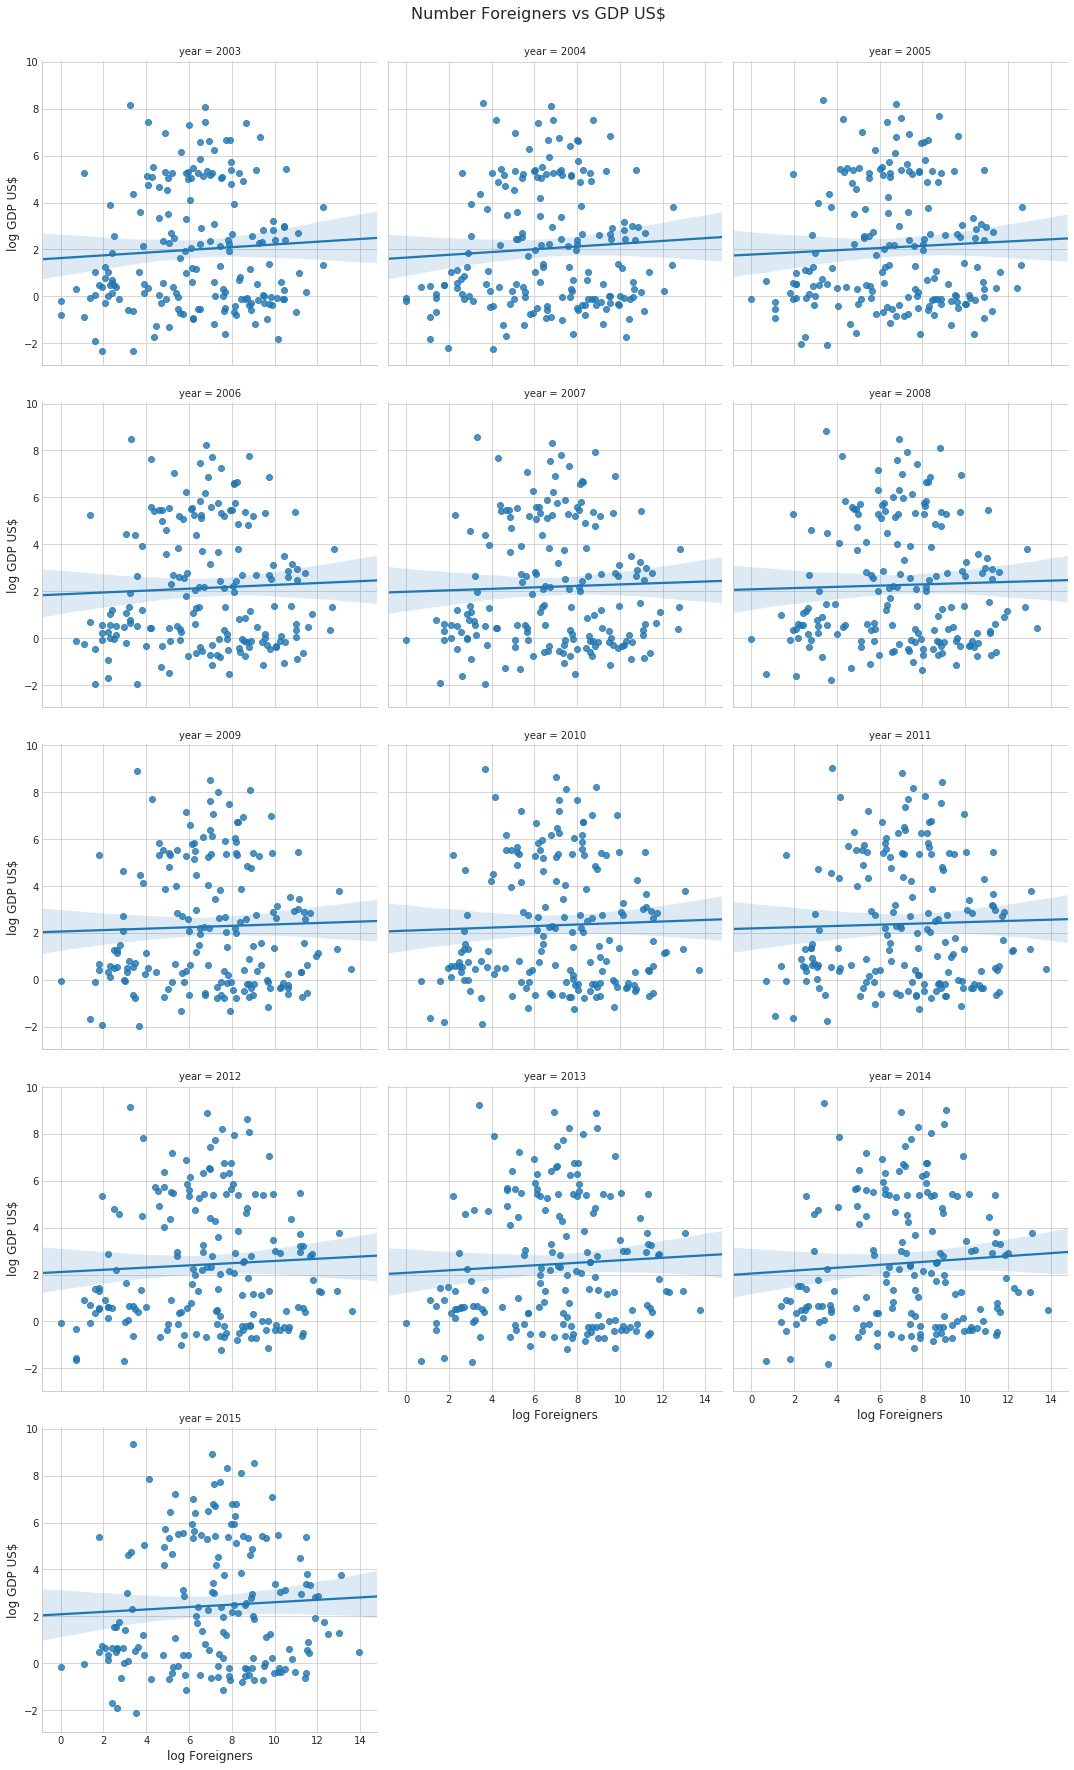

In [25]:
simple_regression(it_resident_foreigners, ppp_coversion, list(range(2003, 2016)))

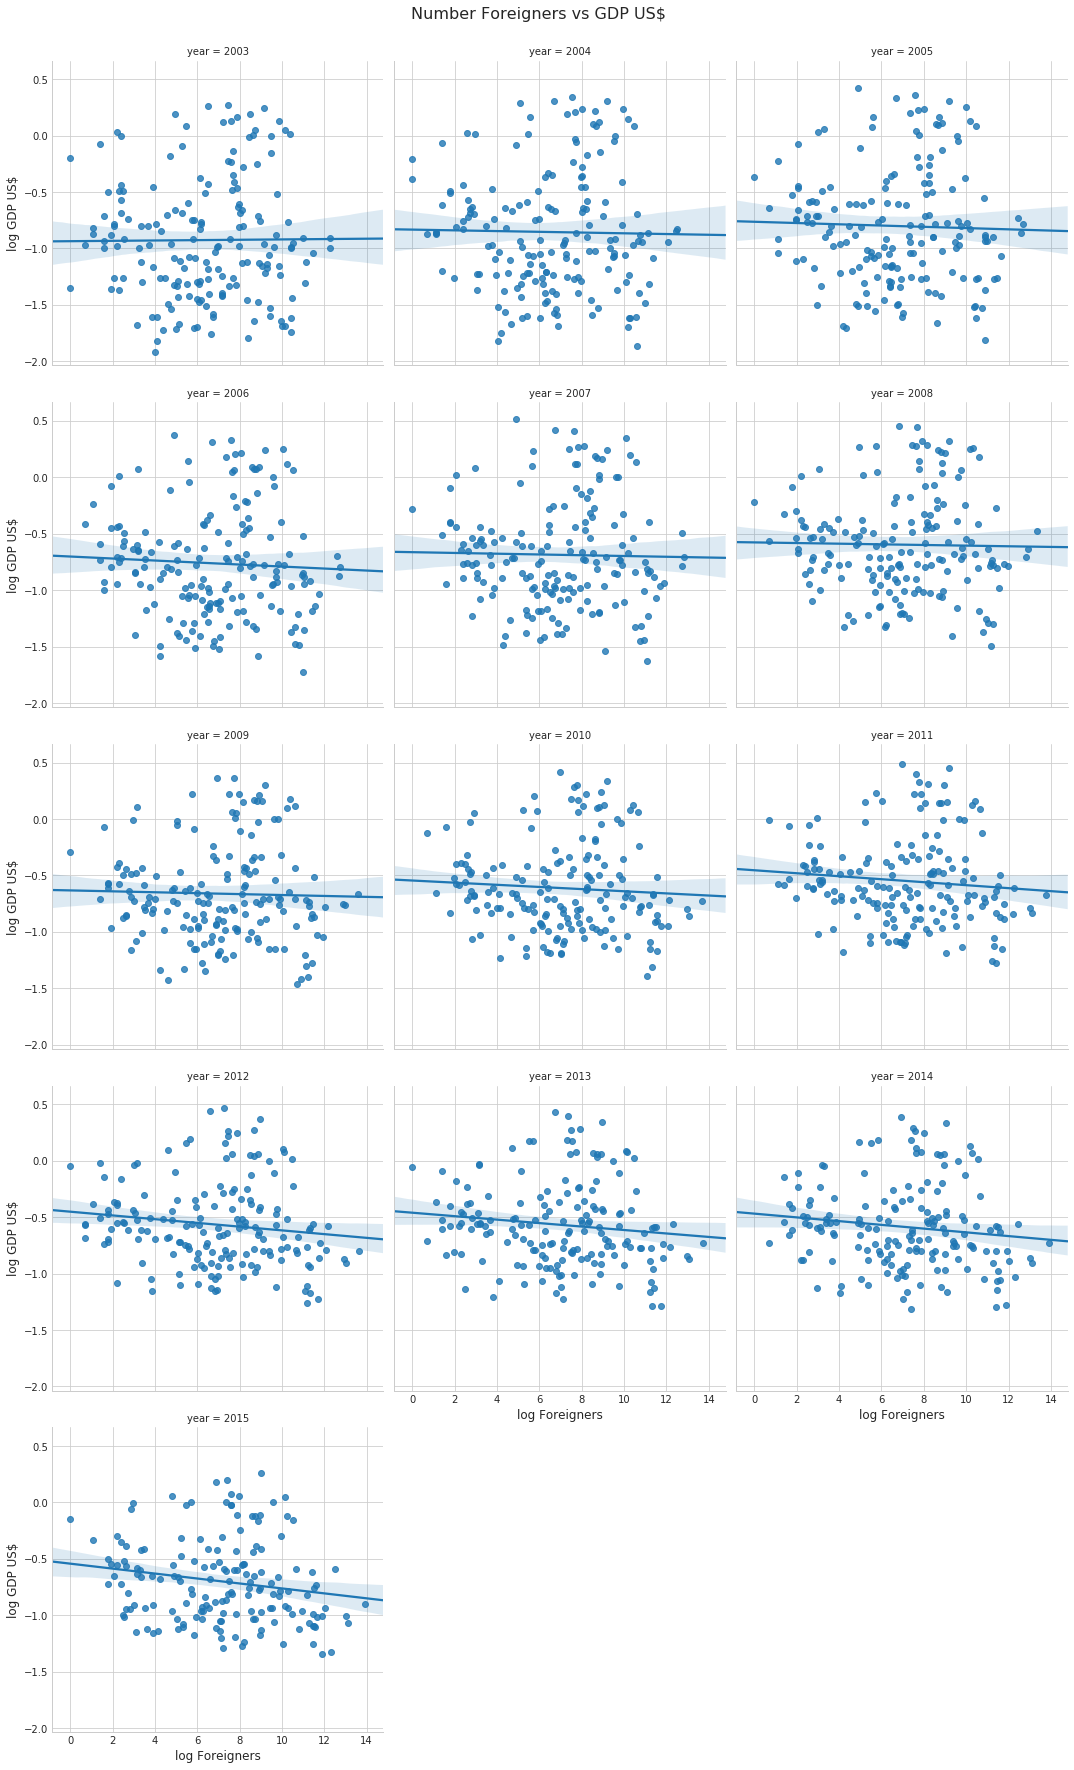

In [26]:
simple_regression(it_resident_foreigners, price_ratio_ppp, list(range(2003, 2016)))

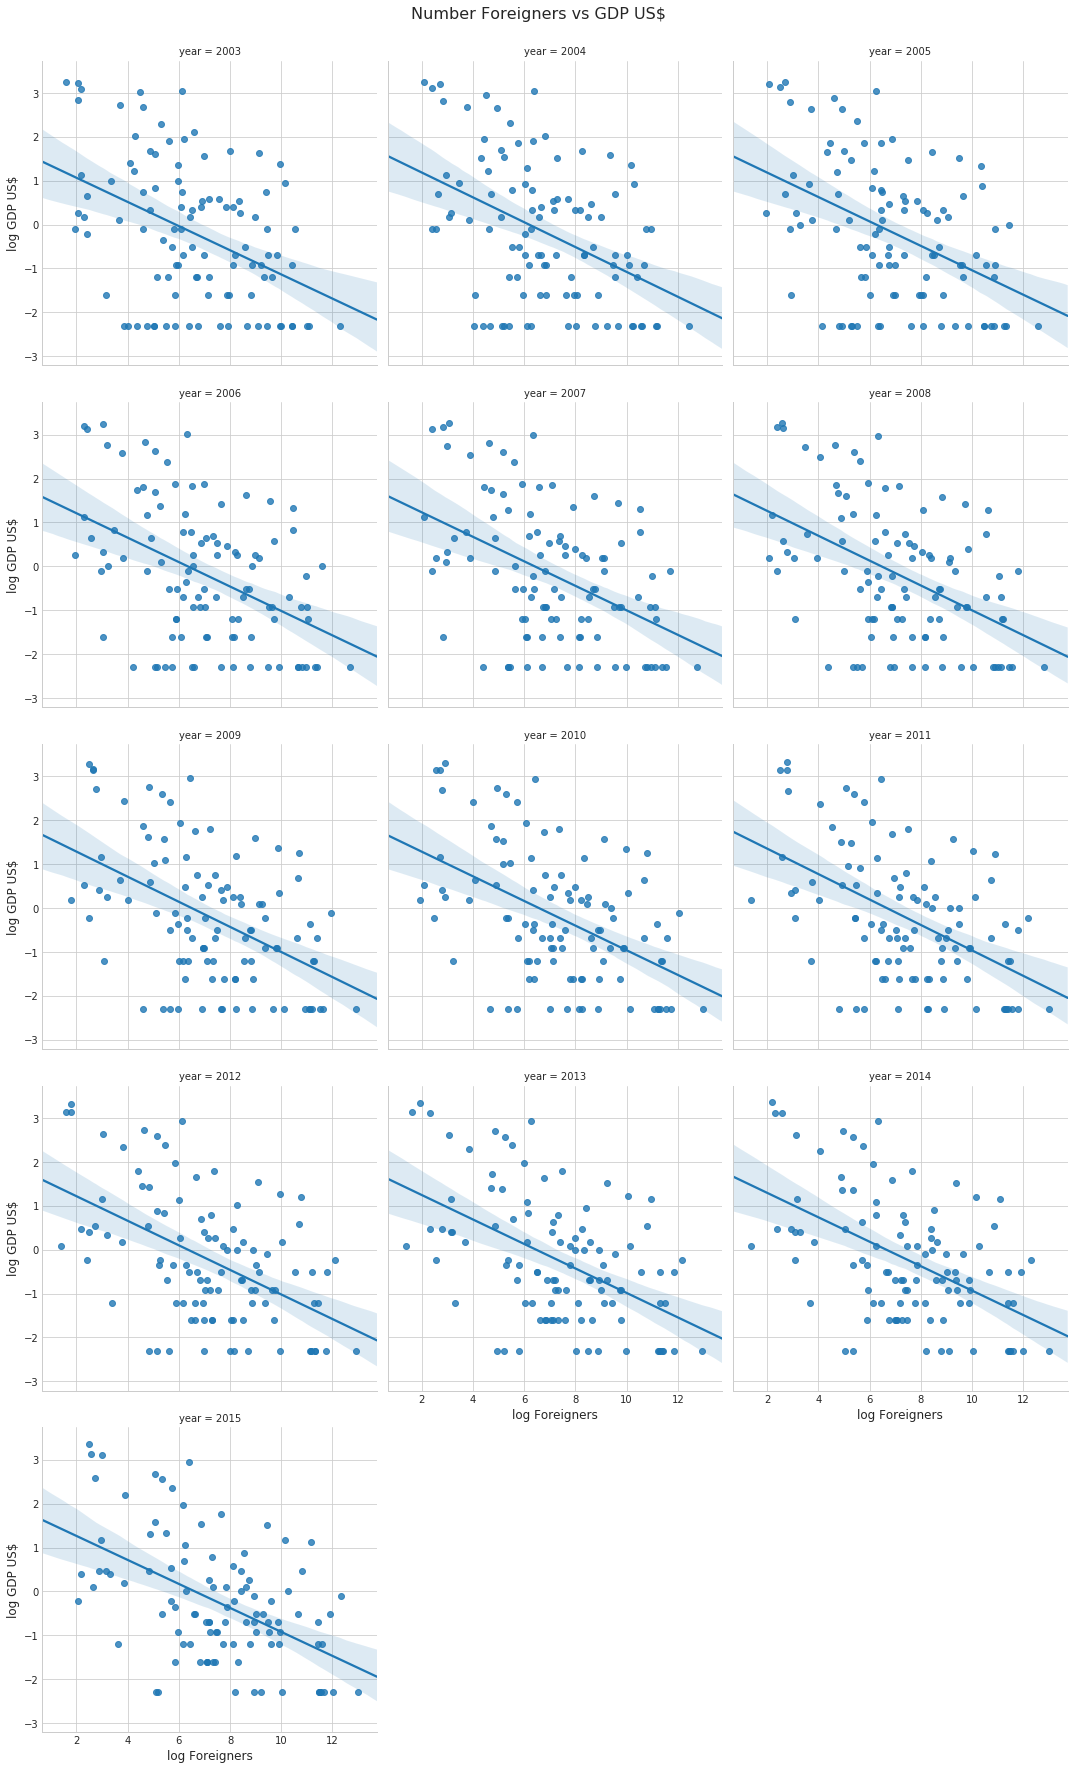

In [27]:
simple_regression(it_resident_foreigners, hiv, list(range(2003, 2016)))

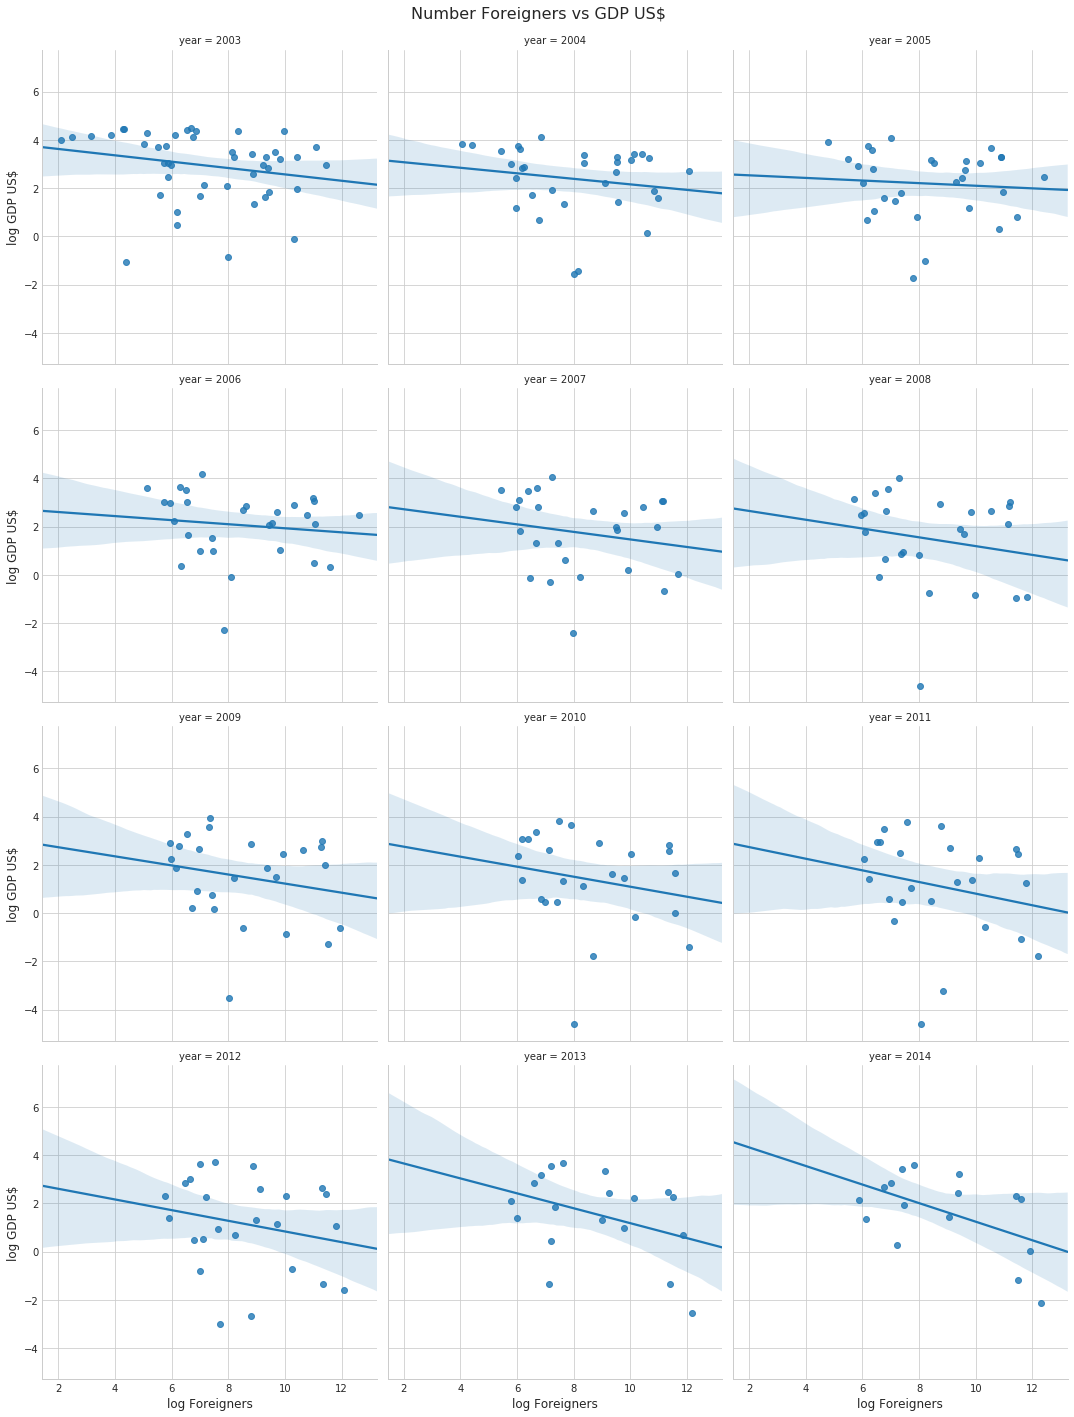

In [28]:
simple_regression(it_resident_foreigners, poverty1, list(range(2003, 2016)))

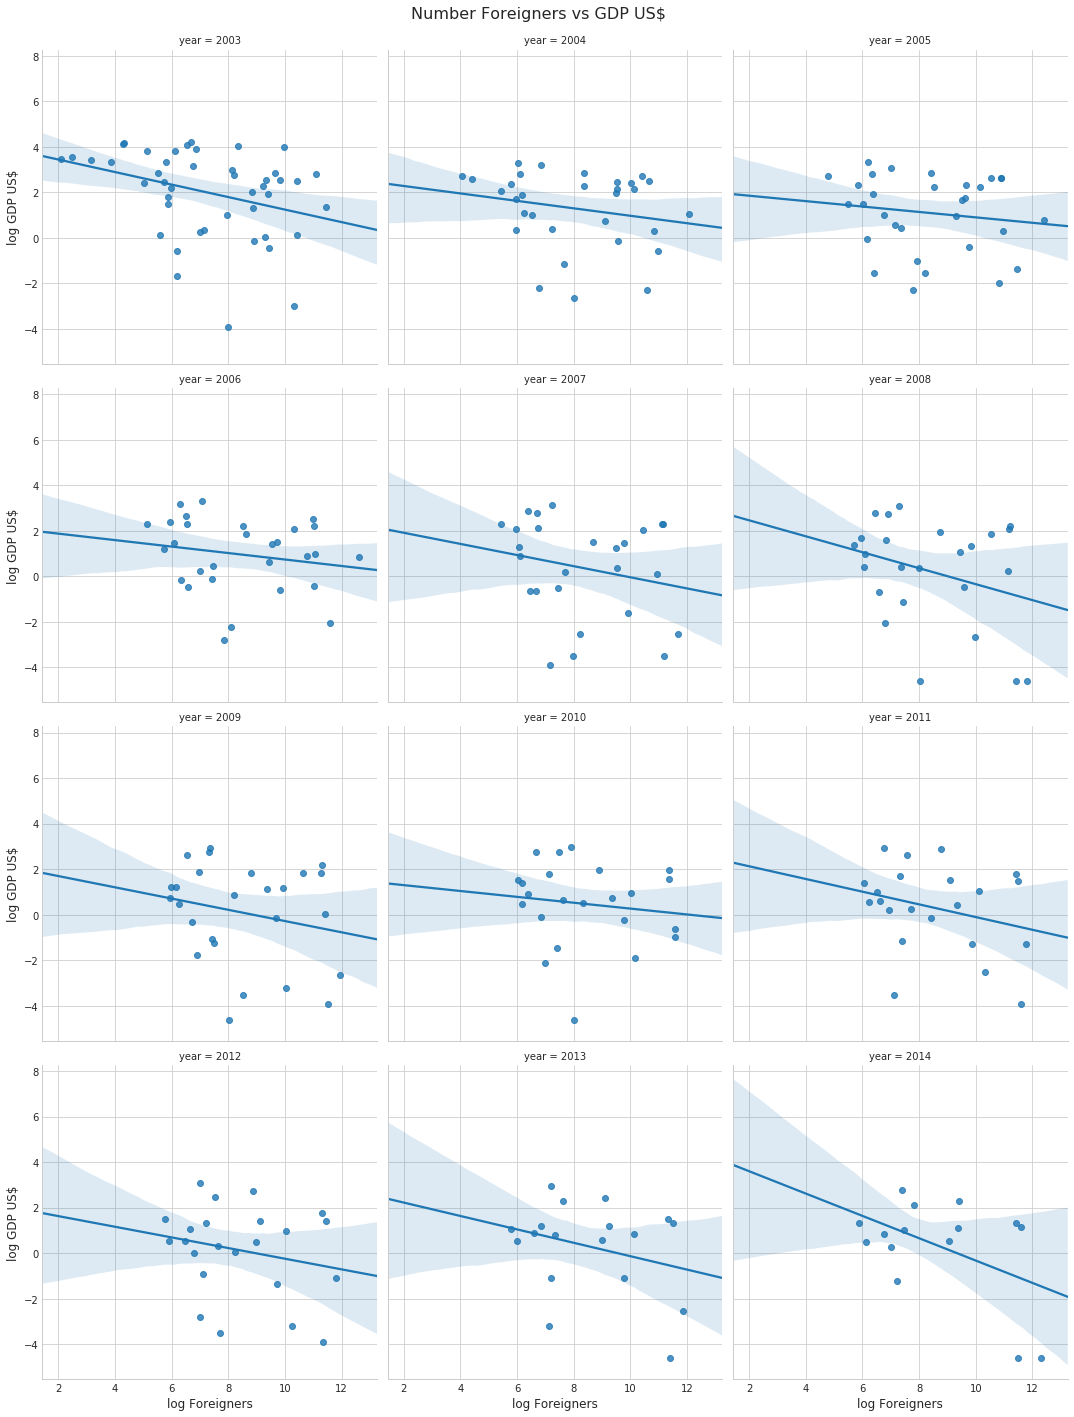

In [29]:
simple_regression(it_resident_foreigners, poverty2, list(range(2003, 2016)))

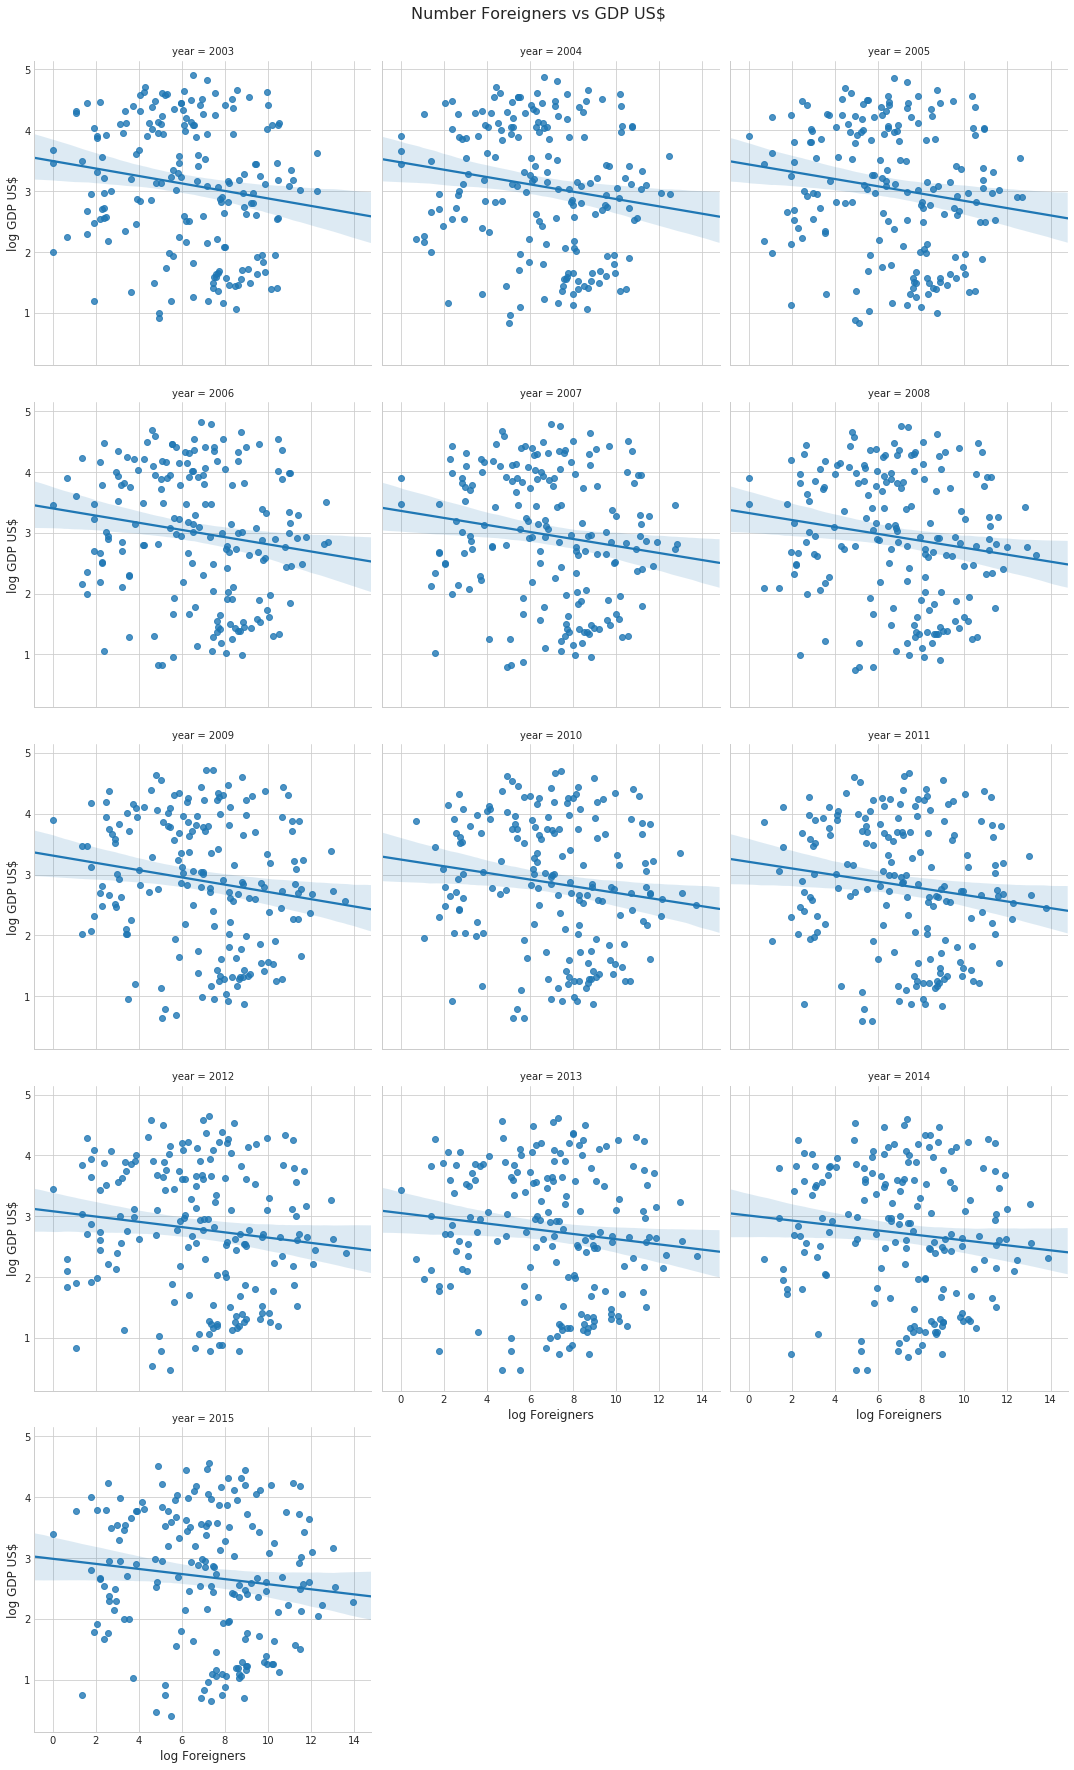

In [30]:
simple_regression(it_resident_foreigners, infant_mortality_rate, list(range(2003, 2016)))

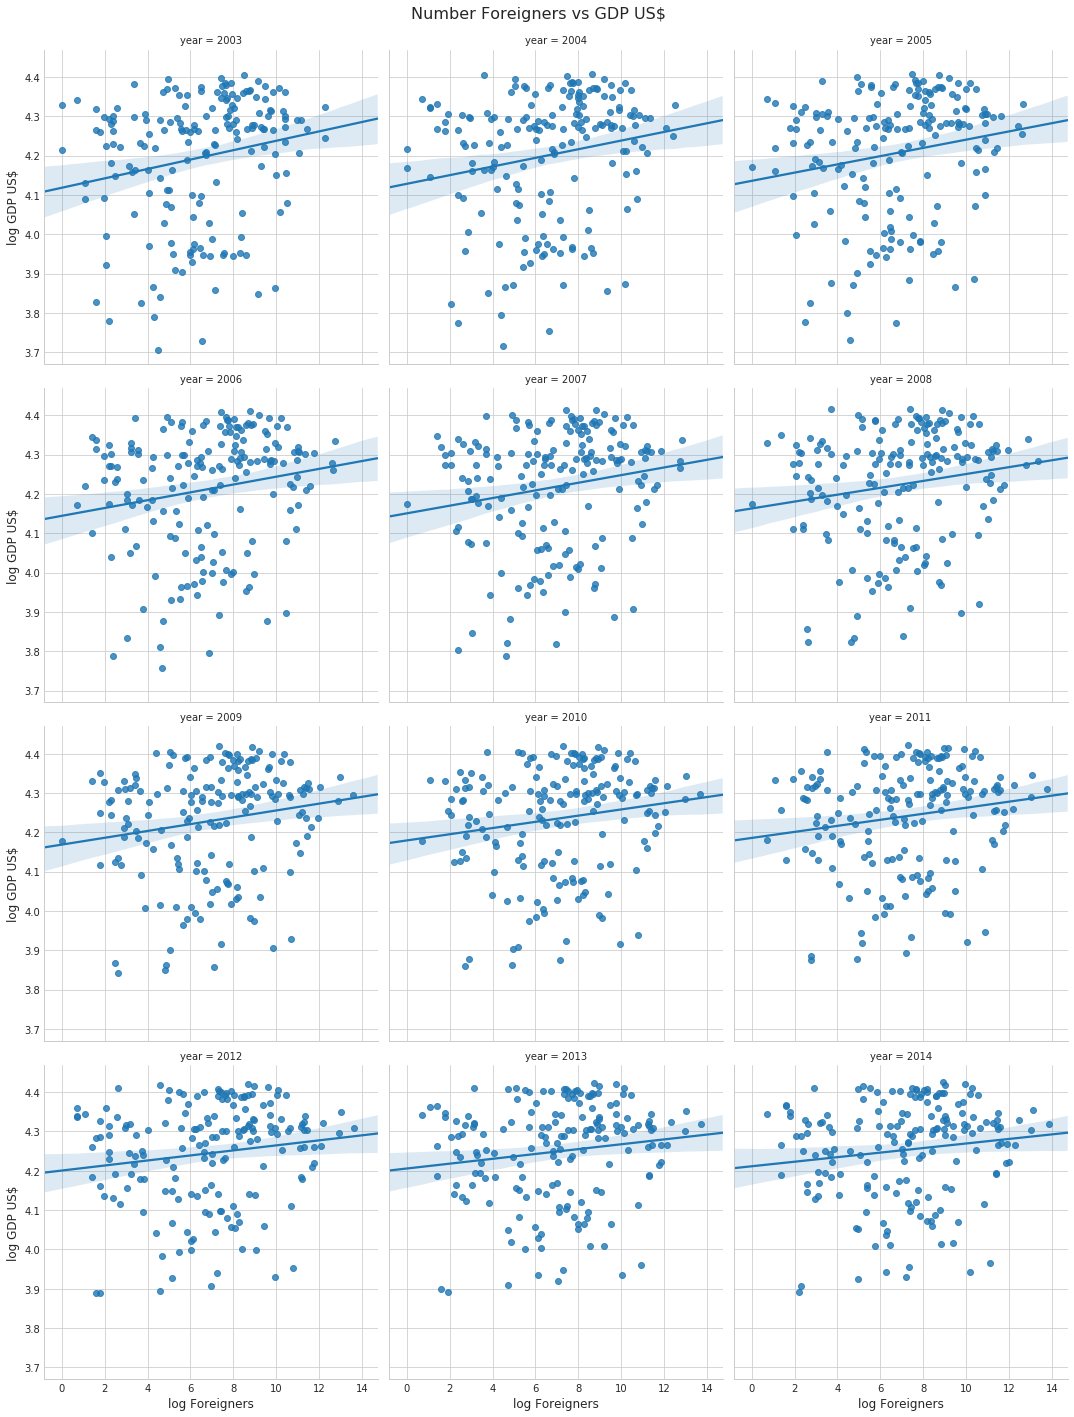

In [31]:
simple_regression(it_resident_foreigners, birth_life_exp, list(range(2003, 2016)))

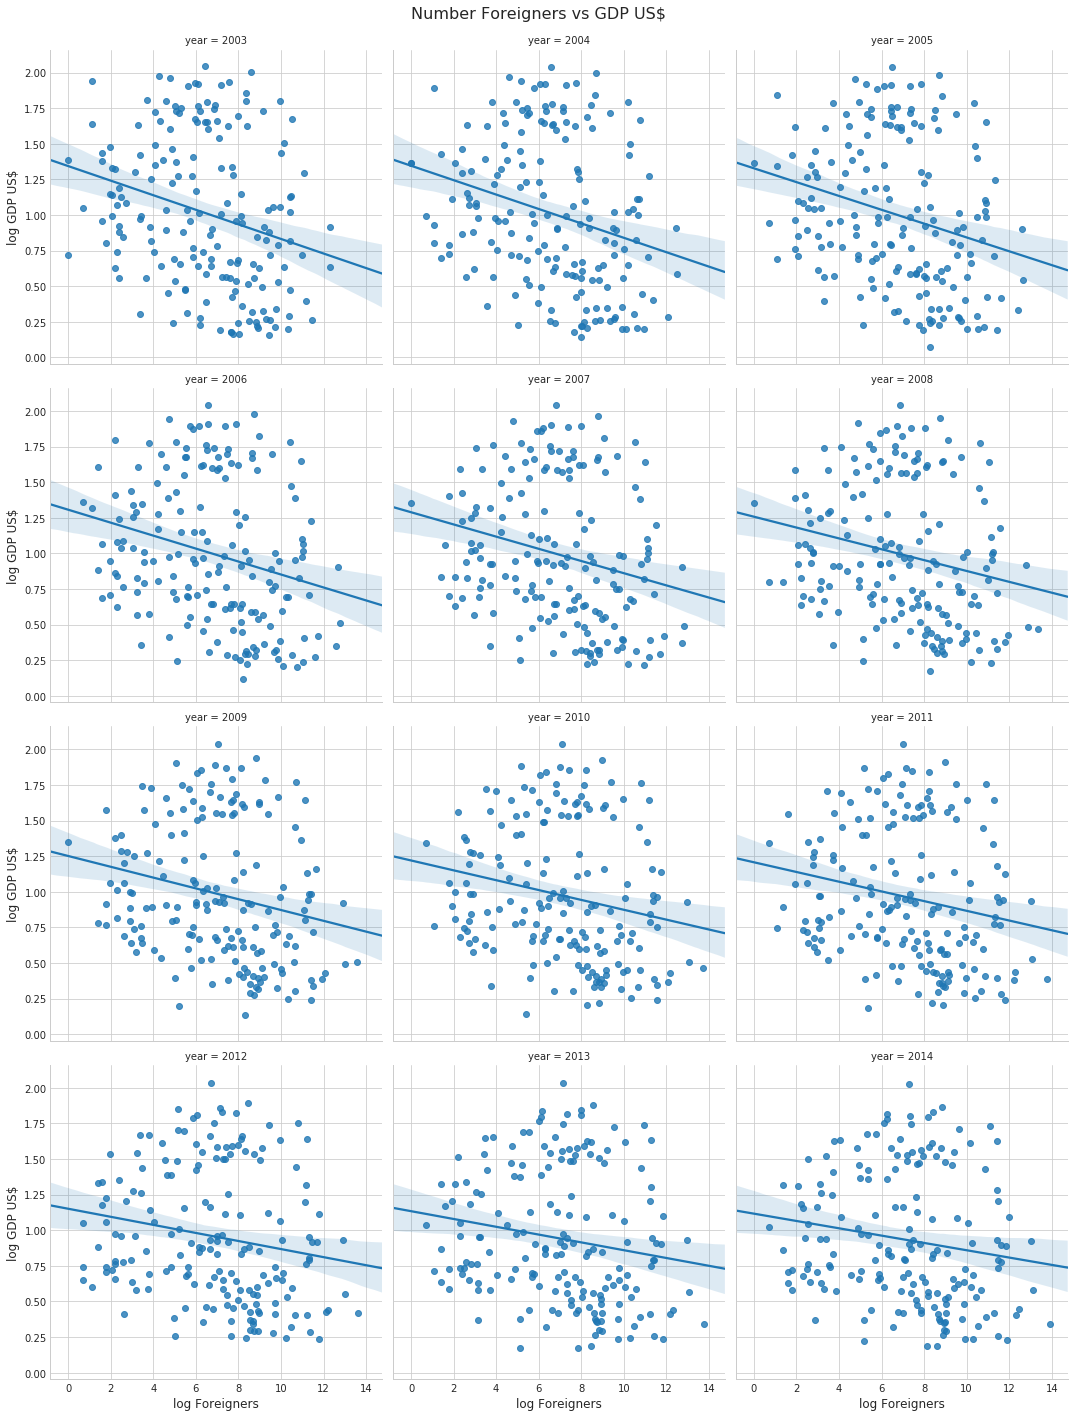

In [32]:
simple_regression(it_resident_foreigners, fertility_rate, list(range(2003, 2016)))

/home/sara/myenv/lib64/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in log


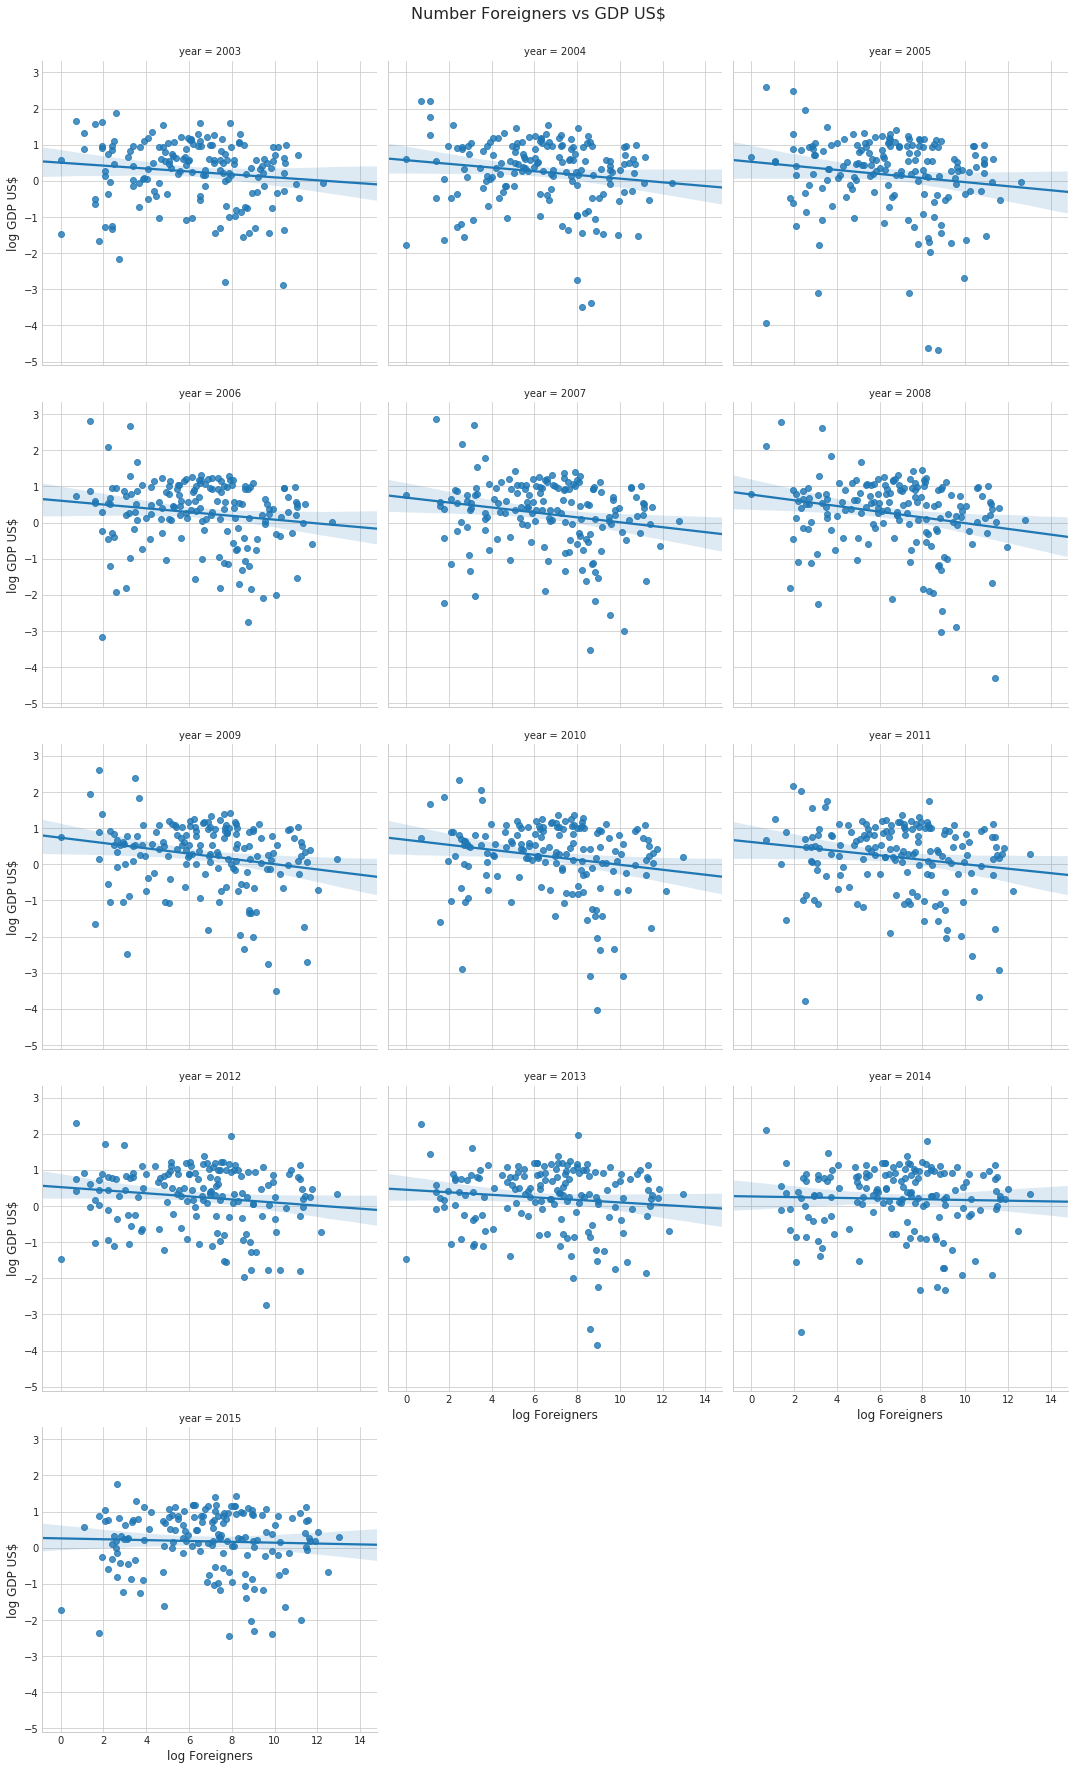

In [33]:
simple_regression(it_resident_foreigners, pop_growth, list(range(2003, 2016)))

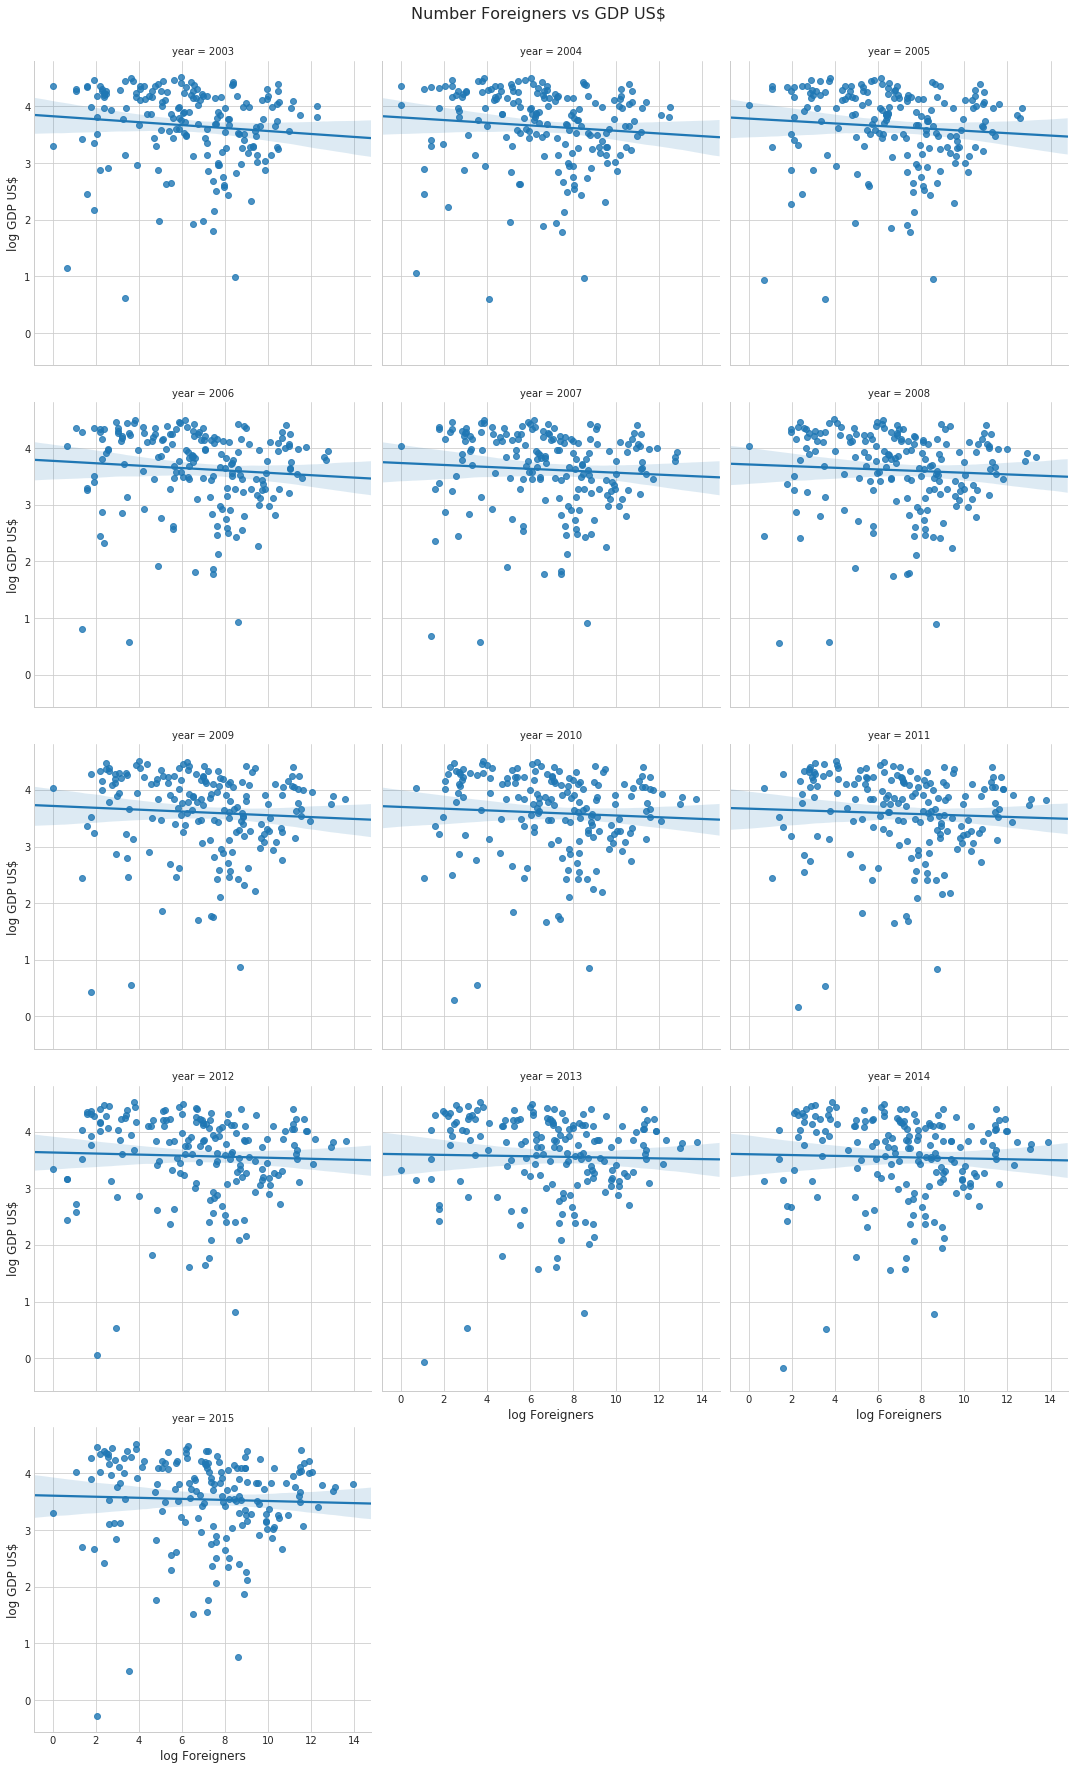

In [34]:
simple_regression(it_resident_foreigners, rural_pop, list(range(2003, 2016)))

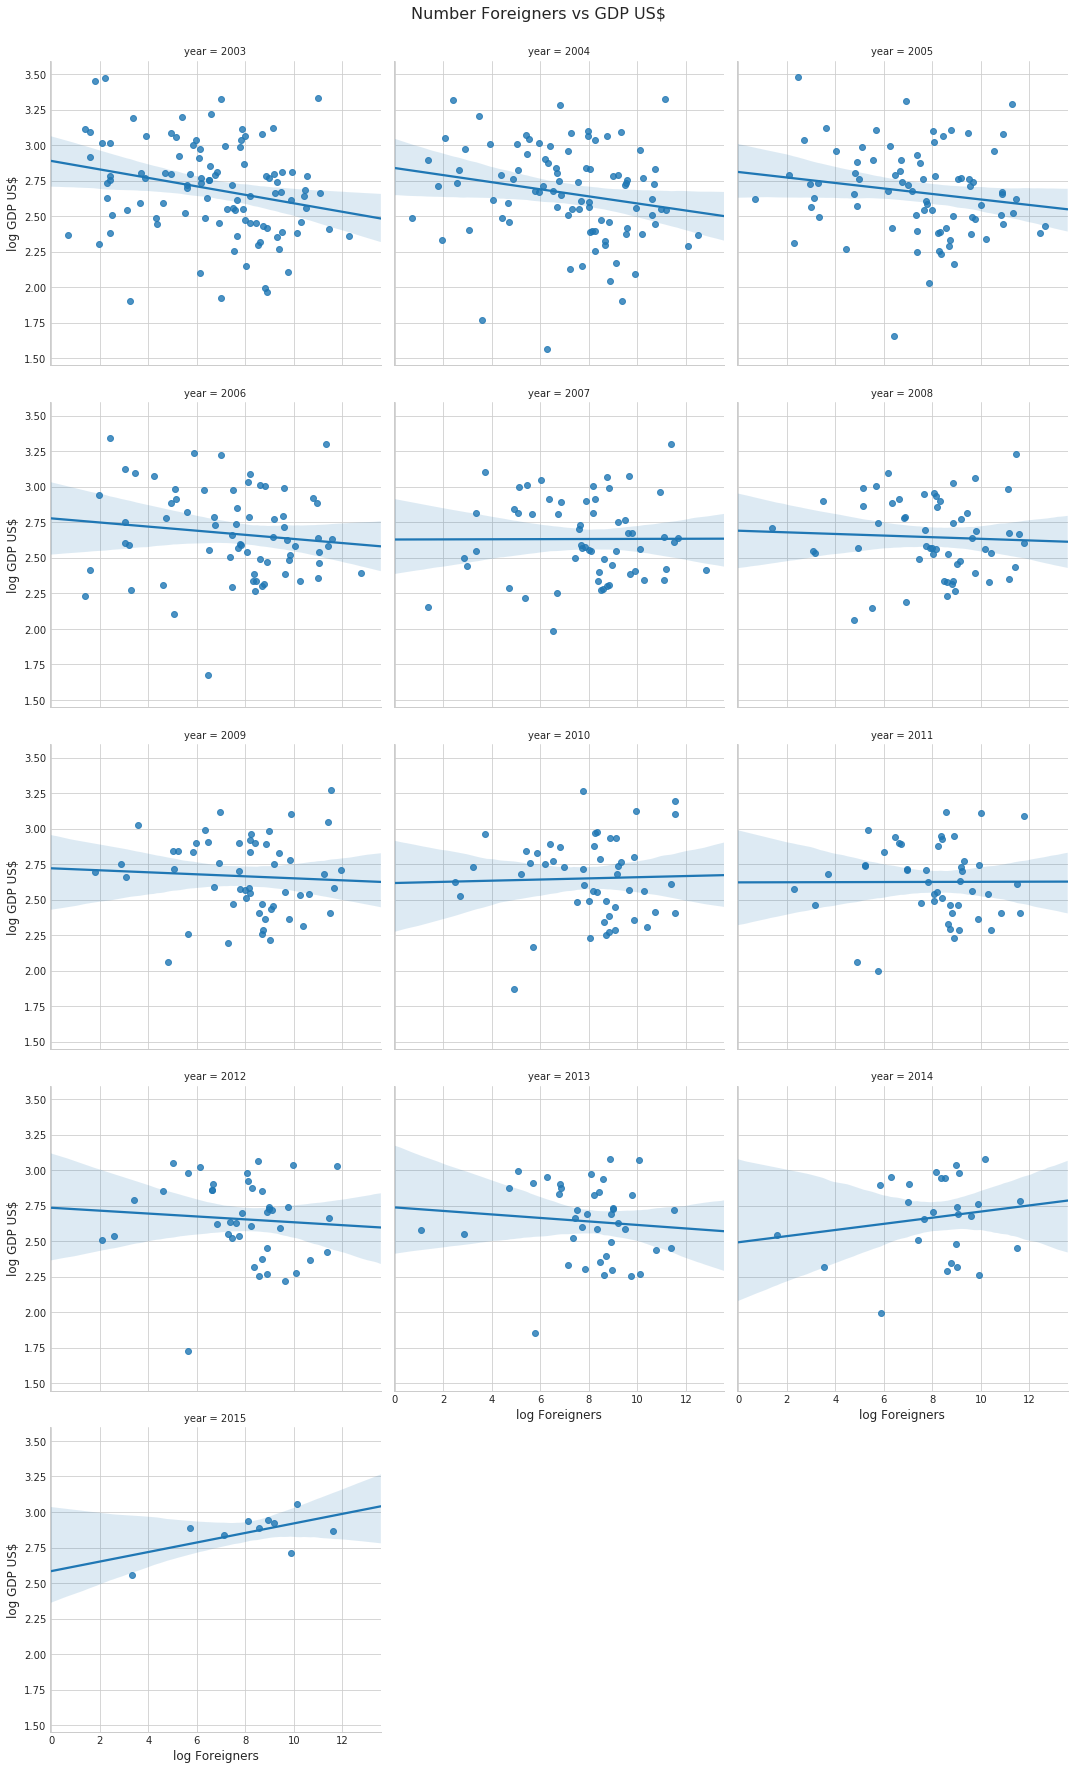

In [47]:
simple_regression(it_resident_foreigners, edu_gov_exp, list(range(2003, 2016)))

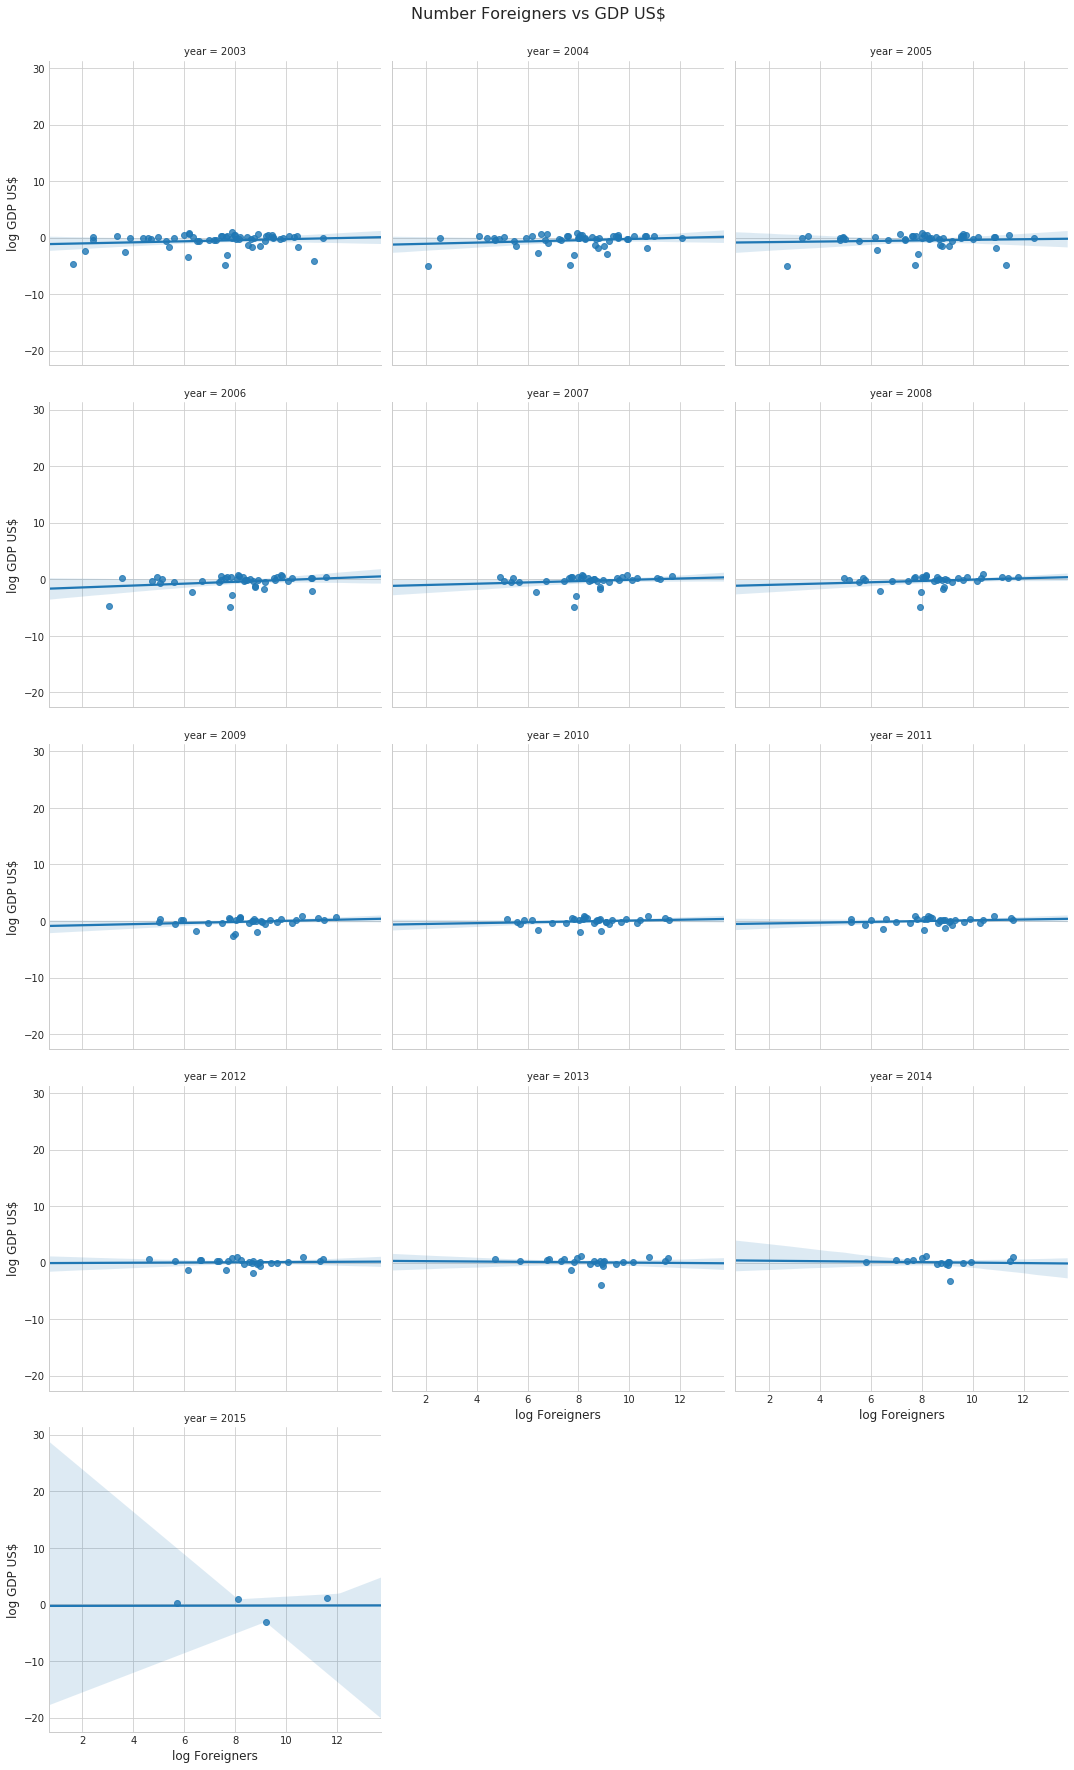

In [48]:
simple_regression(it_resident_foreigners, pre_prim_gov_exp, list(range(2003, 2016)))

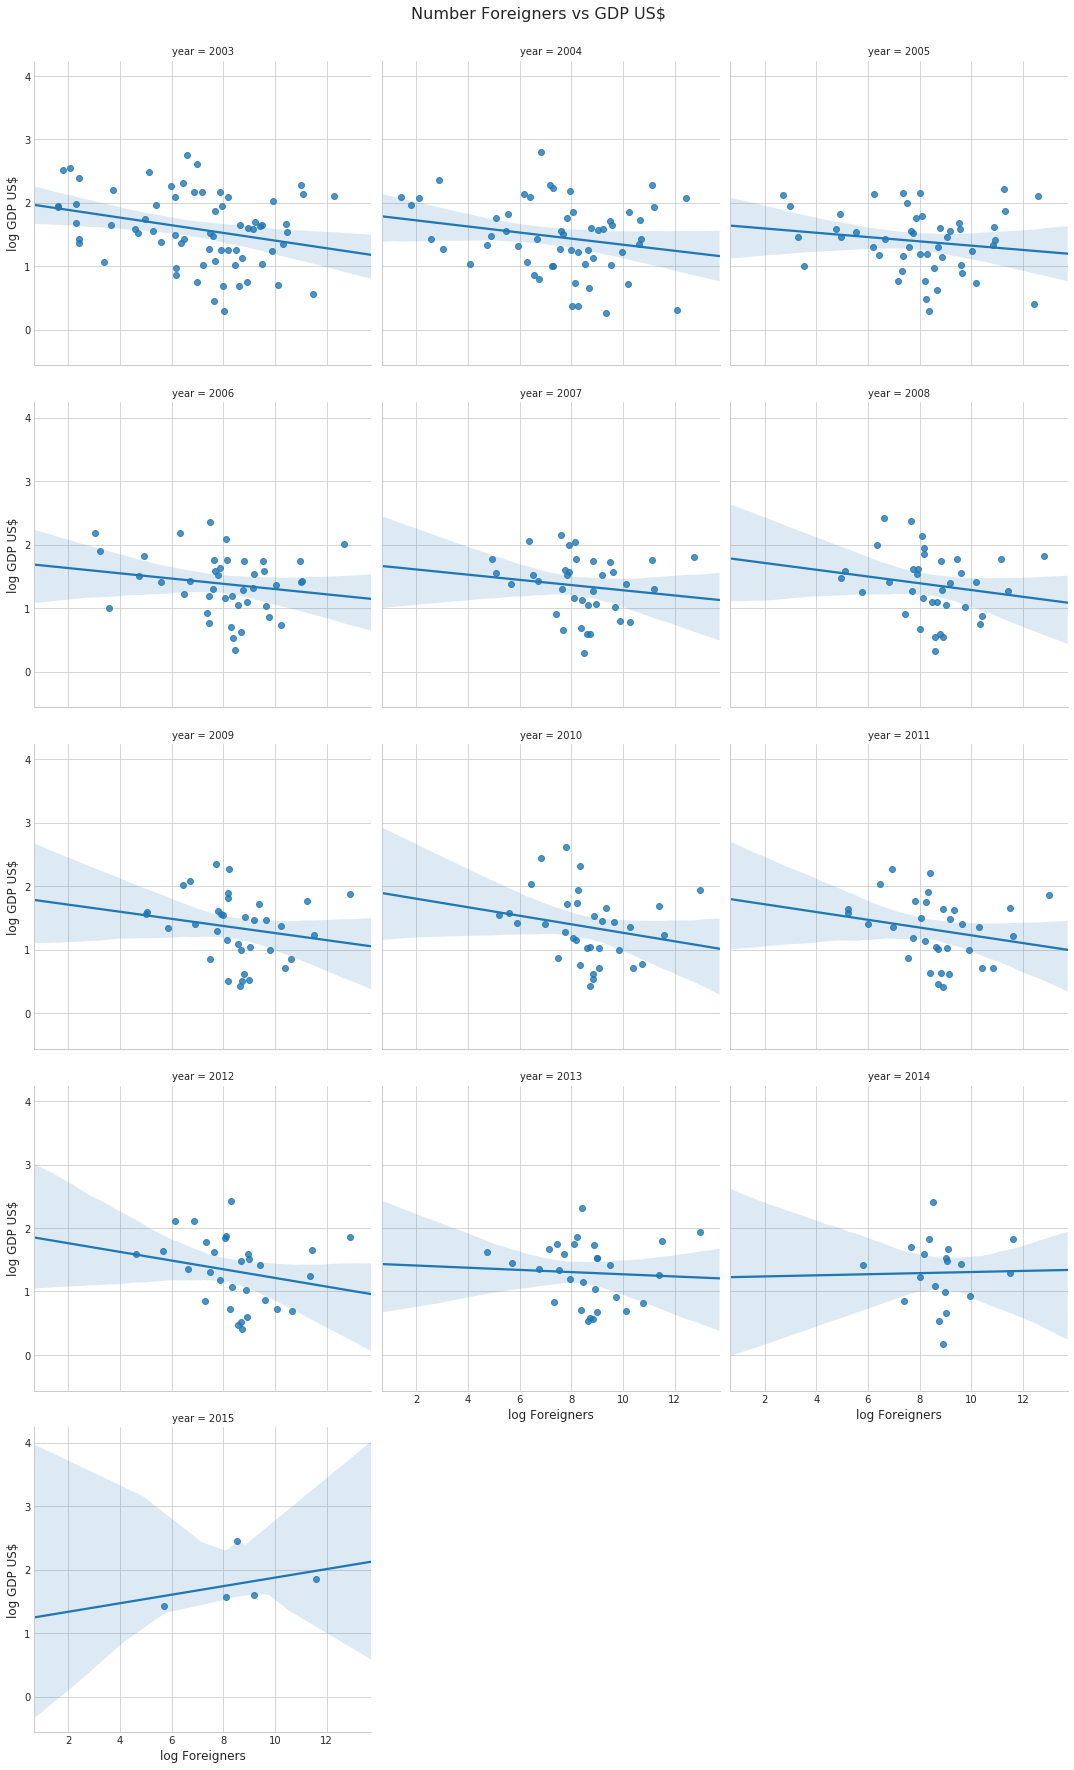

In [49]:
simple_regression(it_resident_foreigners, prim_gov_exp, list(range(2003, 2016)))

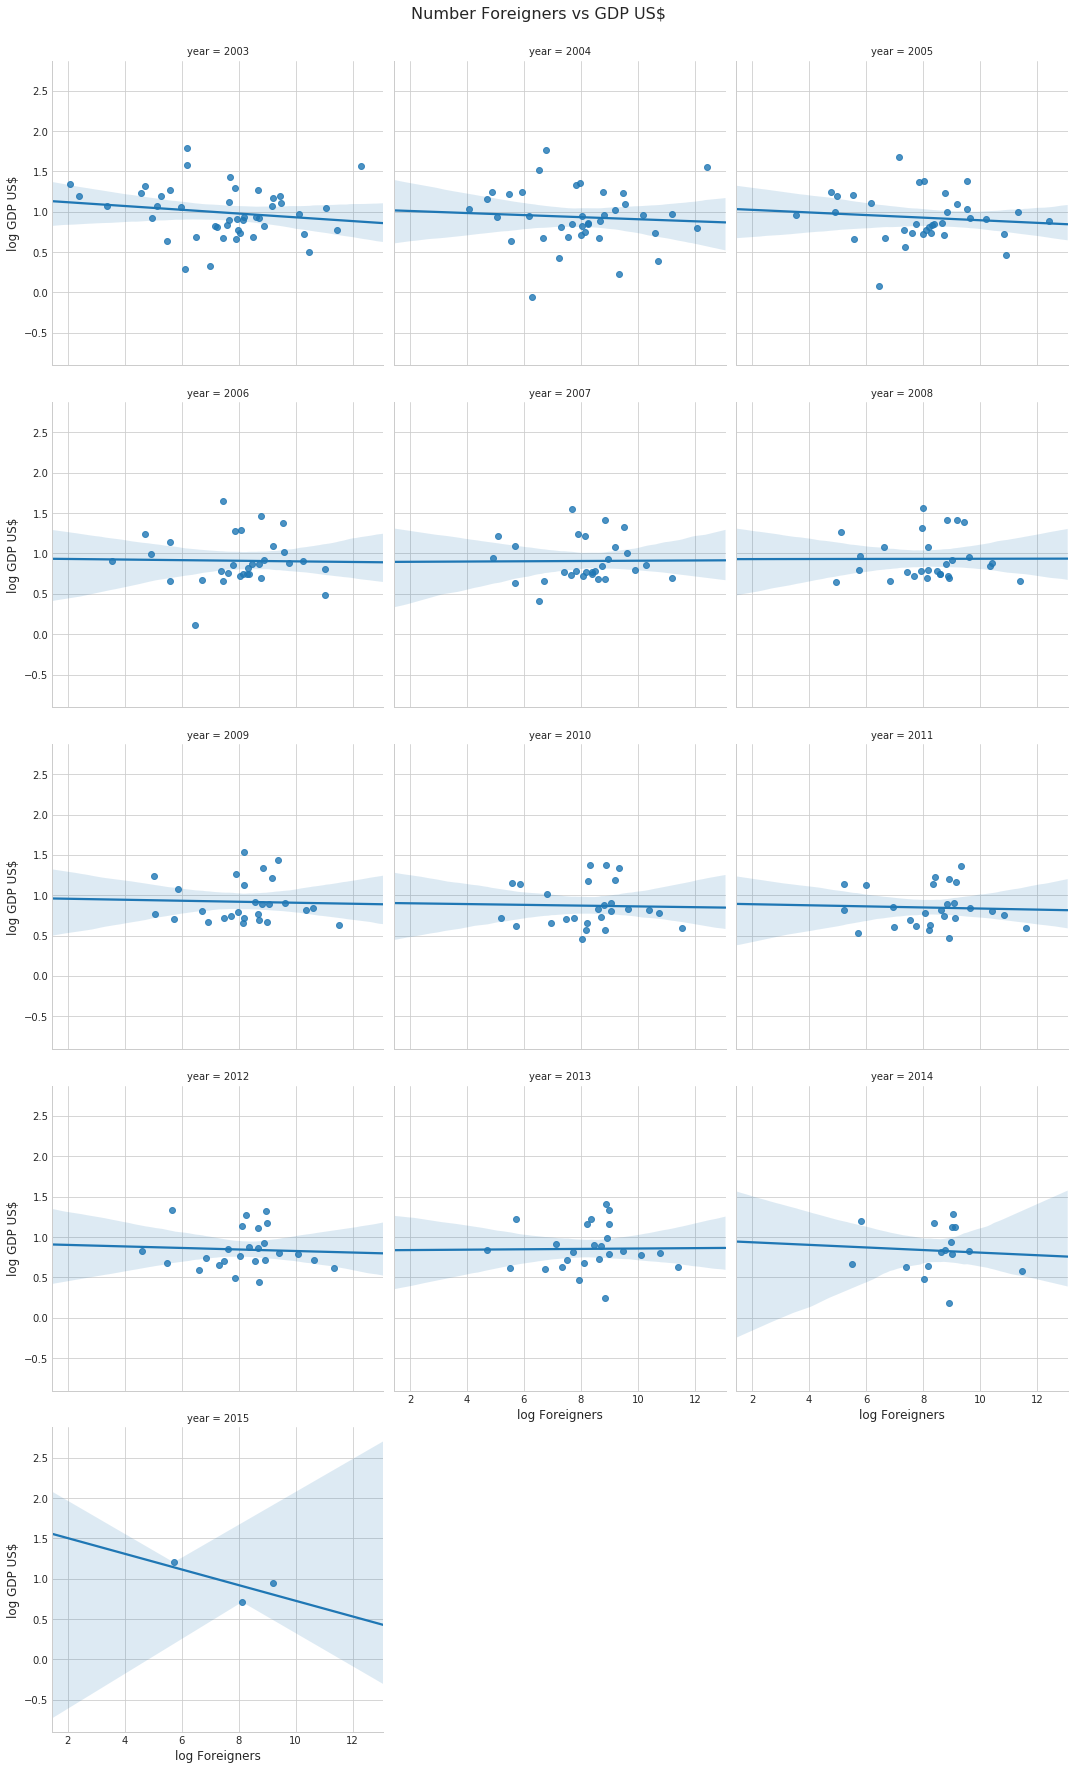

In [50]:
simple_regression(it_resident_foreigners, lower_sec_gov_exp, list(range(2003, 2016)))

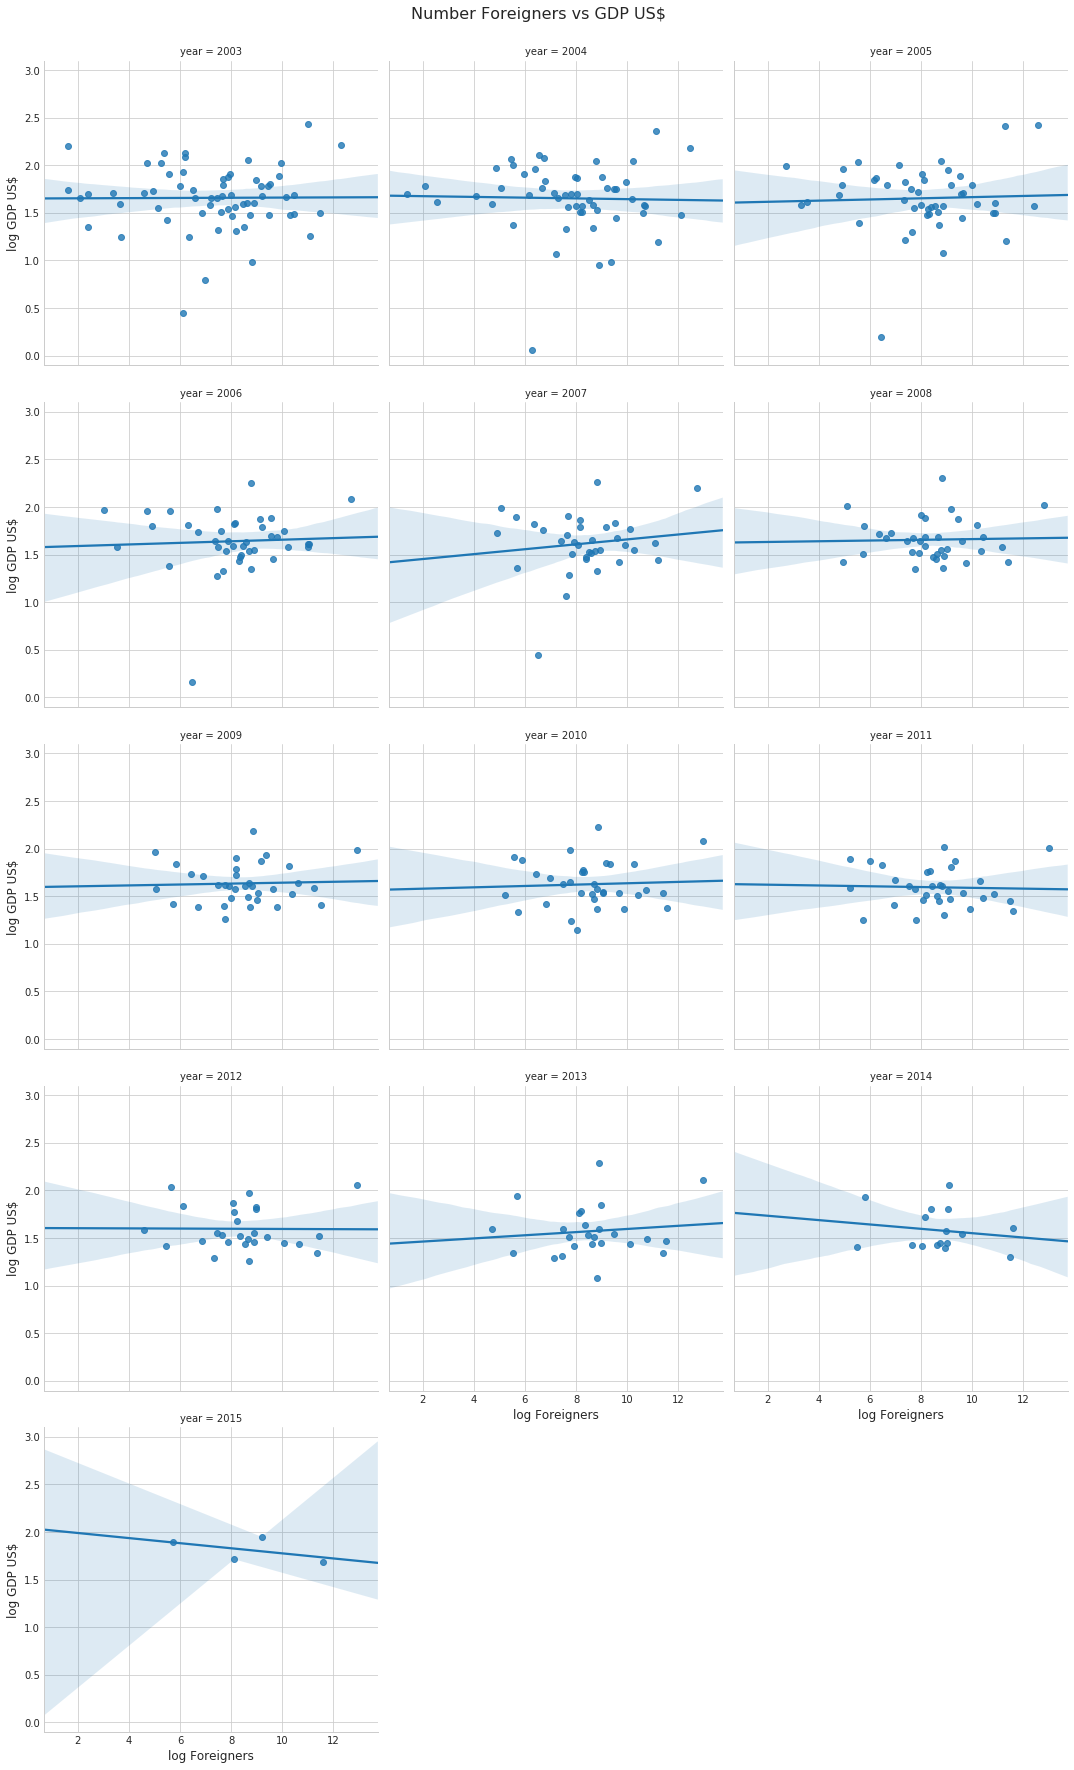

In [51]:
simple_regression(it_resident_foreigners, sec_gov_exp, list(range(2003, 2016)))

In [53]:
#simple_regression(it_resident_foreigners, non_ter_gov_exp1, list(range(2003, 2016)))

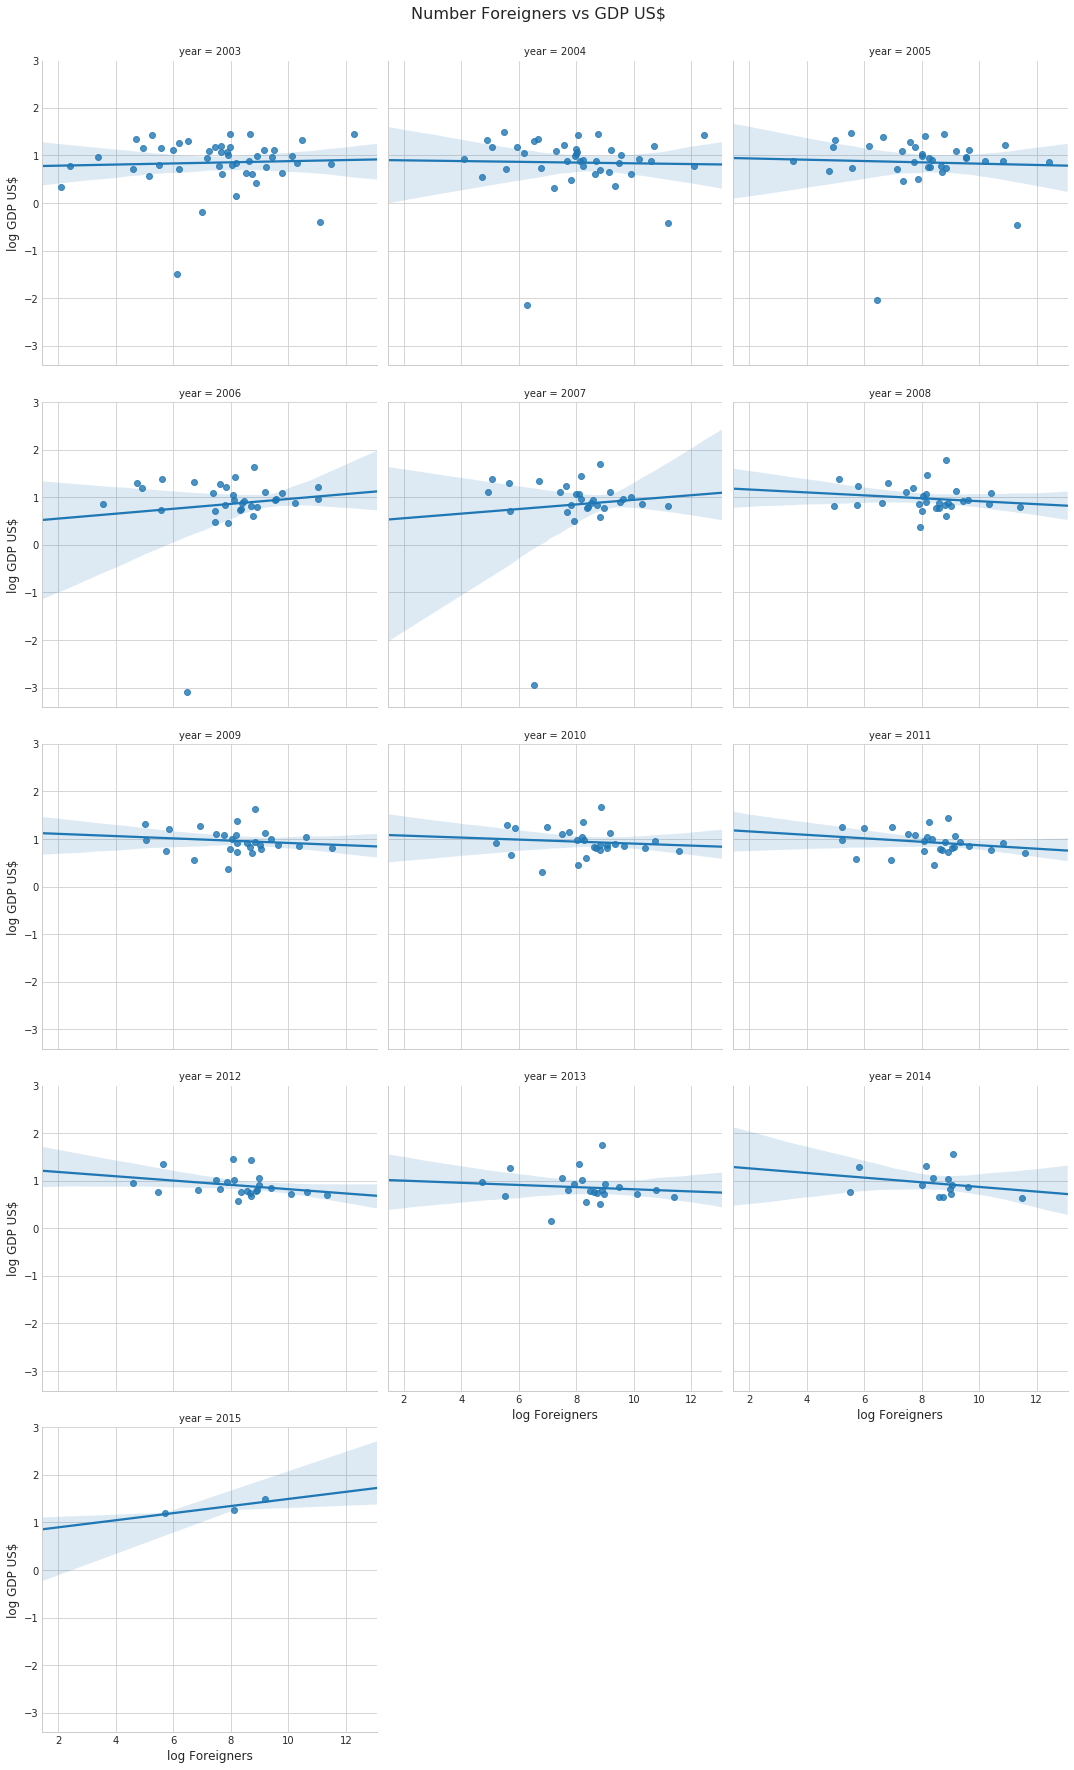

In [54]:
simple_regression(it_resident_foreigners, upper_sec_gov_exp, list(range(2003, 2016)))

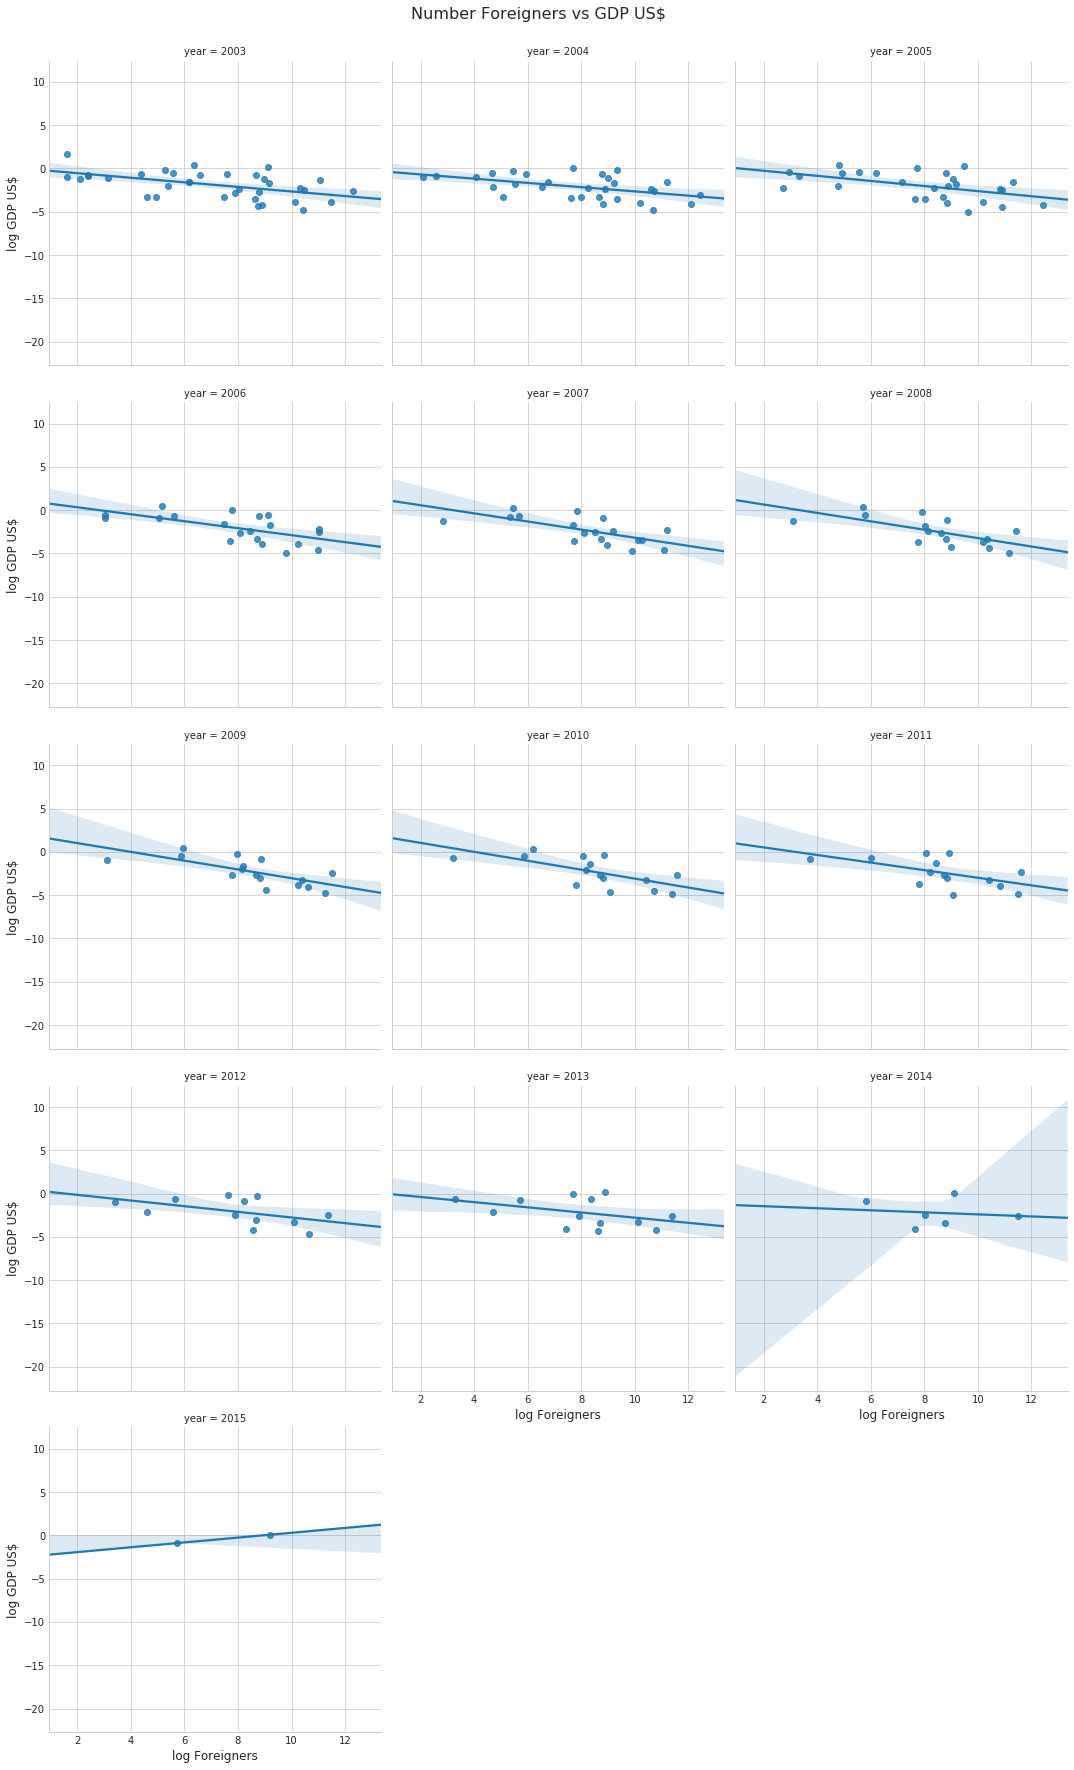

In [55]:
simple_regression(it_resident_foreigners, non_ter_gov_exp2, list(range(2003, 2016)))

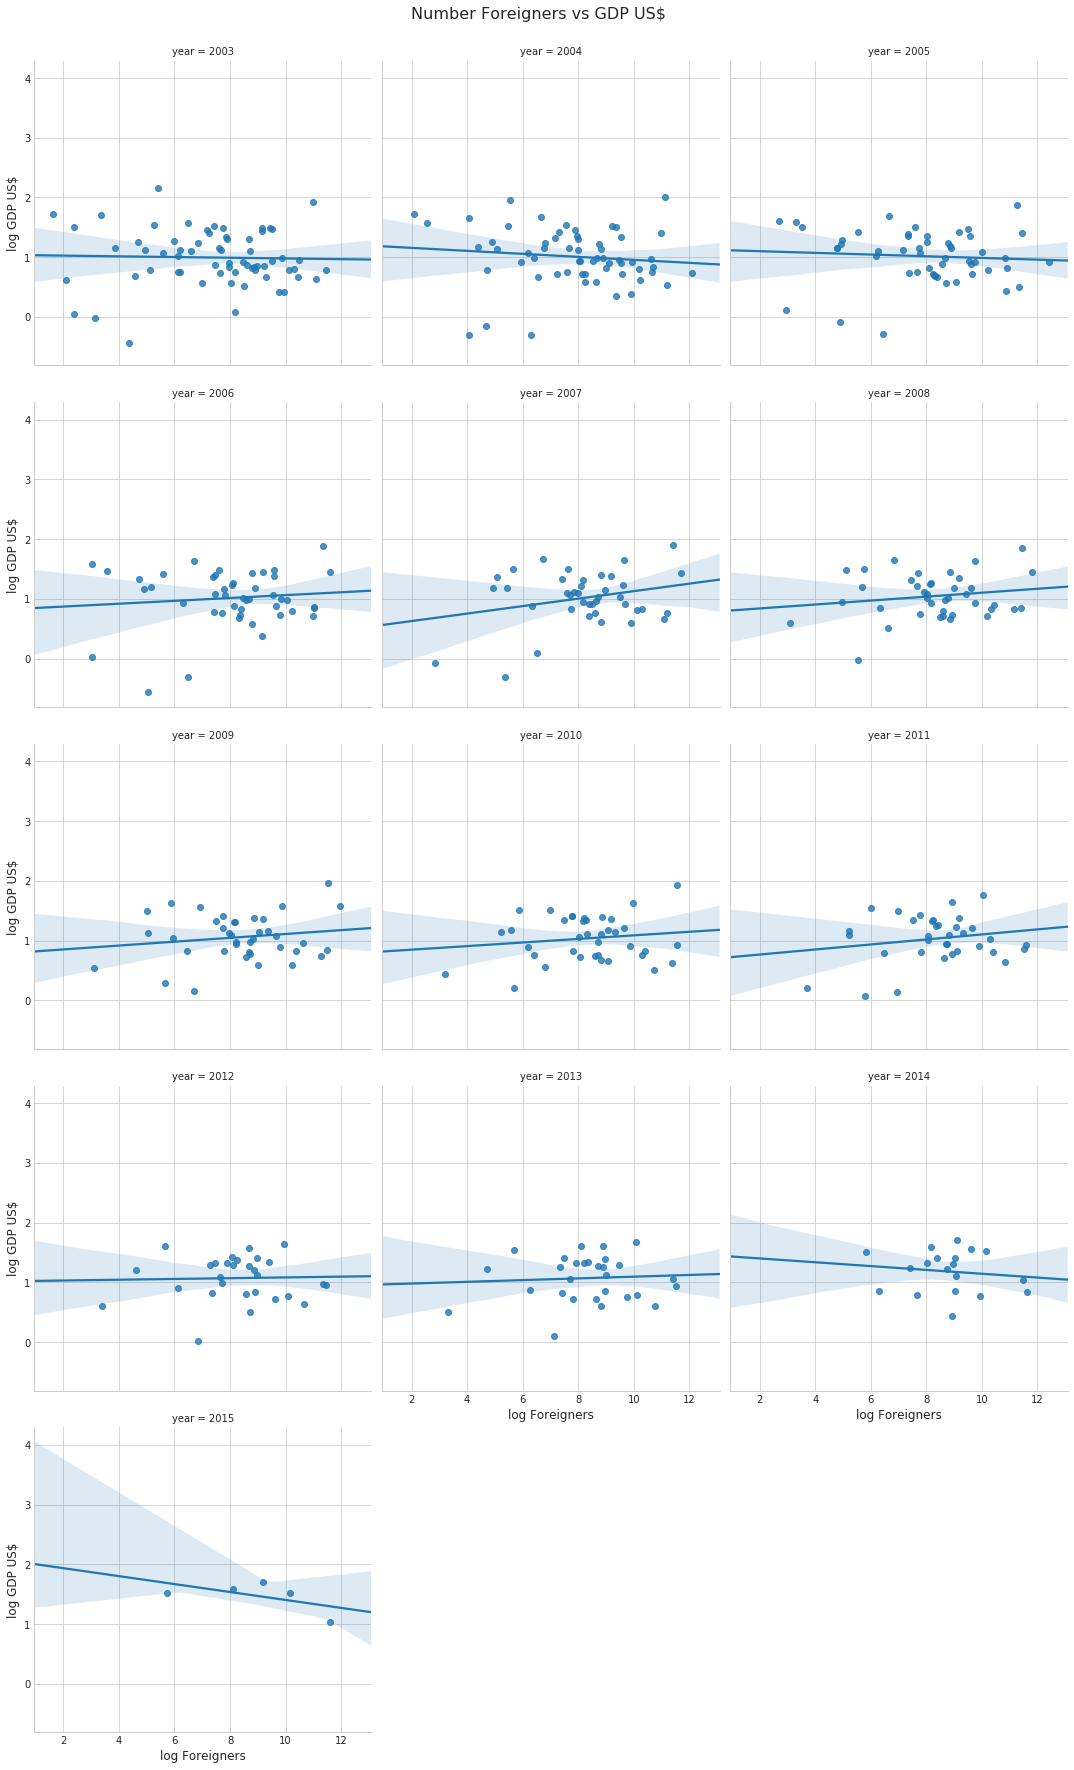

In [56]:
simple_regression(it_resident_foreigners, ter_gov_exp, list(range(2003, 2016)))